In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

drive.mount('/content/drive')

# Configurações de visualização
sns.set_theme(style="whitegrid")
print("Ambiente pronto.")

Mounted at /content/drive
Ambiente pronto.


In [2]:
# --- ATUALIZE O CAMINHO DA PASTA ABAIXO ---

# Caminho para a PASTA que contém todos os seus arquivos CSV
path_pasta_csv = '/content/drive/MyDrive/EMIT_Signatures_AllClasses/'

# --- FIM DA SEÇÃO DE ATUALIZAÇÃO ---

print(f"O código irá procurar por arquivos .csv em: {path_pasta_csv}")

O código irá procurar por arquivos .csv em: /content/drive/MyDrive/EMIT_Signatures_AllClasses/


In [4]:
lista_de_dataframes = []

try:
    # Lista todos os arquivos na pasta especificada
    arquivos_na_pasta = os.listdir(path_pasta_csv)
    arquivos_csv = [f for f in arquivos_na_pasta if f.endswith('.csv')]

    if not arquivos_csv:
        print("ALERTA: Nenhum arquivo .csv encontrado na pasta especificada.")
    else:
        print(f"Arquivos encontrados: {arquivos_csv}")

        for nome_arquivo in arquivos_csv:
            # Caminho completo para o arquivo
            path_completo = os.path.join(path_pasta_csv, nome_arquivo)

            # Lê o arquivo CSV
            try:
                df_temp = pd.read_csv(path_completo)

                # Check if the DataFrame is empty before processing
                if df_temp.empty:
                    print(f"ALERTA: O arquivo '{nome_arquivo}' está vazio e será ignorado.")
                    continue # Skip to the next file
                else:
                    # Extrai o nome da classe a partir do nome do arquivo (removendo a extensão .csv)
                    nome_da_classe = os.path.splitext(nome_arquivo)[0]
                    # Adiciona a coluna com o rótulo da classe
                    df_temp['classe'] = nome_da_classe
                    lista_de_dataframes.append(df_temp)

            except pd.errors.EmptyDataError:
                print(f"ALERTA: O arquivo '{nome_arquivo}' está vazio ou não contém dados. Pulando este arquivo.")
                continue # Skip to the next file

        # Funde todos os DataFrames em um só
        if lista_de_dataframes:
            biblioteca_espectral_df = pd.concat(lista_de_dataframes, ignore_index=True)

            print("\n--- Biblioteca Espectral Consolidada ---")
            print(biblioteca_espectral_df.head())
            print("\nClasses carregadas:")
            print(biblioteca_espectral_df['classe'].unique())
            print(f"\nTotal de amostras carregadas: {len(biblioteca_espectral_df)}")
        else:
            print("\nALERTA: Nenhum DataFrame válido foi carregado.")


except FileNotFoundError:
    print(f"ERRO: A pasta '{path_pasta_csv}' não foi encontrada. Verifique o caminho na Célula 2.")

Arquivos encontrados: ['EMIT_RAW_Caju_20240629.csv', 'EMIT_RAW_Caju_20240423.csv', 'EMIT_STATS_Caju_20231230.csv', 'EMIT_STATS_Caju_20240423.csv', 'EMIT_STATS_Caju_20240629.csv', 'EMIT_RAW_Caju_20240703.csv', 'EMIT_STATS_Caju_20240703.csv', 'EMIT_STATS_Carrasco_20241102.csv', 'EMIT_RAW_Caju_20241026.csv', 'EMIT_RAW_Carrasco_20240430.csv', 'EMIT_STATS_Carrasco_20240430.csv', 'EMIT_STATS_Carrasco_20241217.csv', 'EMIT_RAW_Canaubal_20241026.csv', 'EMIT_STATS_Canaubal_20241225.csv', 'EMIT_RAW_Brejos_altitude_20241026.csv', 'EMIT_RAW_Brejos_altitude_20241217.csv', 'EMIT_RAW_Canaubal_20240629.csv', 'EMIT_STATS_Brejos_altitude_20241022.csv', 'EMIT_STATS_Brejos_altitude_20241217.csv', 'EMIT_STATS_Canaubal_20240423.csv', 'EMIT_RAW_Canaubal_20240423.csv', 'EMIT_RAW_Canaubal_20231230.csv', 'EMIT_RAW_Brejos_altitude_20241221.csv', 'EMIT_RAW_Brejos_altitude_20240430.csv', 'EMIT_STATS_Brejos_altitude_20241221.csv', 'EMIT_RAW_Solo_20241225.csv', 'EMIT_RAW_Brejos_altitude_20240617.csv', 'EMIT_RAW_Brejo

**Reasoning**:
The subtask requires modifying the data loading cell to handle empty files and potential parsing errors. I will modify the existing code in cell `GC_RMlOD7_gu` to include checks for empty dataframes after reading each CSV, handle `EmptyDataError`, and ensure the concatenation and subsequent steps only proceed if valid dataframes are loaded.



In [19]:
lista_de_dataframes = []

try:
    # Lista todos os arquivos na pasta especificada
    arquivos_na_pasta = os.listdir(path_pasta_csv)
    arquivos_csv = [f for f in arquivos_na_pasta if f.endswith('.csv')]

    if not arquivos_csv:
        print("ALERTA: Nenhum arquivo .csv encontrado na pasta especificada.")
    else:
        print(f"Arquivos encontrados: {arquivos_csv}")

        for nome_arquivo in arquivos_csv:
            # Caminho completo para o arquivo
            path_completo = os.path.join(path_pasta_csv, nome_arquivo)

            # Lê o arquivo CSV
            try:
                df_temp = pd.read_csv(path_completo)

                # Check if the DataFrame is empty before processing
                if df_temp.empty:
                    print(f"ALERTA: O arquivo '{nome_arquivo}' está vazio e será ignorado.")
                    continue # Skip to the next file
                else:
                    # Extrai o nome da classe a partir do nome do arquivo (removendo a extensão .csv)
                    nome_da_classe = os.path.splitext(nome_arquivo)[0]
                    # Adiciona a coluna com o rótulo da classe
                    df_temp['classe'] = nome_da_classe
                    lista_de_dataframes.append(df_temp)

            except pd.errors.EmptyDataError:
                print(f"ALERTA: O arquivo '{nome_arquivo}' está vazio ou não contém dados. Pulando este arquivo.")
                continue # Skip to the next file

        # Funde todos os DataFrames em um só
        if lista_de_dataframes:
            biblioteca_espectral_df = pd.concat(lista_de_dataframes, ignore_index=True)

            print("\n--- Biblioteca Espectral Consolidada ---")
            print(biblioteca_espectral_df.head())
            print("\nClasses carregadas:")
            print(biblioteca_espectral_df['classe'].unique())
            print(f"\nTotal de amostras carregadas: {len(biblioteca_espectral_df)}")
        else:
            print("\nALERTA: Nenhum DataFrame válido foi carregado.")


except FileNotFoundError:
    print(f"ERRO: A pasta '{path_pasta_csv}' não foi encontrada. Verifique o caminho na Célula 2.")

Arquivos encontrados: ['EMIT_RAW_Caju_20240629.csv', 'EMIT_RAW_Caju_20240423.csv', 'EMIT_STATS_Caju_20231230.csv', 'EMIT_STATS_Caju_20240423.csv', 'EMIT_STATS_Caju_20240629.csv', 'EMIT_RAW_Caju_20240703.csv', 'EMIT_STATS_Caju_20240703.csv', 'EMIT_STATS_Carrasco_20241102.csv', 'EMIT_RAW_Caju_20241026.csv', 'EMIT_RAW_Carrasco_20240430.csv', 'EMIT_STATS_Carrasco_20240430.csv', 'EMIT_STATS_Carrasco_20241217.csv', 'EMIT_RAW_Canaubal_20241026.csv', 'EMIT_STATS_Canaubal_20241225.csv', 'EMIT_RAW_Brejos_altitude_20241026.csv', 'EMIT_RAW_Brejos_altitude_20241217.csv', 'EMIT_RAW_Canaubal_20240629.csv', 'EMIT_STATS_Brejos_altitude_20241022.csv', 'EMIT_STATS_Brejos_altitude_20241217.csv', 'EMIT_STATS_Canaubal_20240423.csv', 'EMIT_RAW_Canaubal_20240423.csv', 'EMIT_RAW_Canaubal_20231230.csv', 'EMIT_RAW_Brejos_altitude_20241221.csv', 'EMIT_RAW_Brejos_altitude_20240430.csv', 'EMIT_STATS_Brejos_altitude_20241221.csv', 'EMIT_RAW_Solo_20241225.csv', 'EMIT_RAW_Brejos_altitude_20240617.csv', 'EMIT_RAW_Brejo

## Implement robust data cleaning

### Subtask:
Refactor the diagnostic cell (`RqomMBa3a_x0`) to include more sophisticated data cleaning steps, such as identifying columns with a high percentage of NaNs and potentially imputing missing values if removing all rows with NaNs is not feasible or desirable. Clearly document the cleaning steps and their impact on the data.


**Reasoning**:
Refactor the diagnostic cell to include more sophisticated data cleaning steps based on the subtask instructions. This involves identifying spectral columns, calculating missing value percentages, dropping columns with high NaN percentages, and imputing remaining NaNs.



In [20]:
# --- CÉLULA DE DIAGNÓSTICO REVISADA COM LIMPEZA ---

# Verifica se a biblioteca foi criada antes de tentar inspecioná-la
if 'biblioteca_espectral_df' in locals() and not biblioteca_espectral_df.empty:
    print("--- 1. Informações Gerais do DataFrame (Antes da Limpeza) ---")
    # O .info() é o melhor comando para ver nomes de colunas, contagem de nulos e tipos de dados.
    biblioteca_espectral_df.info()

    print("\n\n--- 2. Visualização das 5 Primeiras Linhas (Antes da Limpeza) ---")
    # O .head() nos mostra como os dados realmente se parecem.
    display(biblioteca_espectral_df.head())

    # --- 3. Análise de Colunas e Dados e Limpeza ---
    print("\n\n--- 3. Análise de Colunas e Dados e Limpeza ---")

    # Identifica colunas de refletância e incerteza
    # Ensure columns are strings before checking for startswith
    all_cols = biblioteca_espectral_df.columns
    spectral_cols = [col for col in all_cols if isinstance(col, str) and col.startswith('reflectance_')]
    uncertainty_cols = [col for col in all_cols if isinstance(col, str) and col.startswith('reflectance_uncertainity_')]

    # Identify other columns to potentially ignore for spectral analysis/PCA
    other_cols_to_ignore_base = ['system:index', 'aggregate_flag', 'buffer_metros', 'classe', 'data_exportacao', 'data_imagem', 'normalizacao', '.geo', 'periodo_mosaico', 'first']
    # Also include the STATS columns in the ignore list for RAW data processing if necessary
    stats_cols = ['mediana', 'media', 'desvio_padrao', 'n_amostras', 'q1', 'q3', 'variancia', 'cv_percent', 'wavelength_nm'] # wavelength_nm might be useful later, but not for direct spectral PCA/plotting as features
    all_cols_to_ignore = list(set(other_cols_to_ignore_base + stats_cols))

    # Filter out columns that are in the ignore list from the spectral columns if they were incorrectly included
    # Keep only columns that start with 'reflectance_' AND are not in the ignore list
    spectral_cols_for_analysis = [col for col in spectral_cols if col not in all_cols_to_ignore]


    print(f"Total de colunas de refletância identificadas (incluindo incerteza): {len(spectral_cols)}")
    print(f"Total de colunas de incerteza identificadas: {len(uncertainty_cols)}")
    print(f"Total de colunas identificadas para análise espectral (excluindo incerteza e outros): {len(spectral_cols_for_analysis)}")


    # --- Limpeza de NaNs em Colunas Espectrais ---
    print("\n--- Processo de Limpeza de NaNs em Colunas Espectrais ---")

    # Calculate percentage of missing values for spectral columns
    nan_percentage = biblioteca_espectral_df[spectral_cols_for_analysis].isnull().mean() * 100

    # Define a threshold for dropping columns (e.g., 75% NaNs)
    nan_threshold = 75
    cols_to_drop_high_nan = nan_percentage[nan_percentage > nan_threshold].index.tolist()

    if cols_to_drop_high_nan:
        print(f"\nIdentificadas {len(cols_to_drop_high_nan)} colunas espectrais com mais de {nan_threshold}% NaNs. Elas serão removidas.")
        print("Colunas a serem removidas:", cols_to_drop_high_nan)
        # Drop columns with high percentage of NaNs
        biblioteca_espectral_df.drop(columns=cols_to_drop_high_nan, inplace=True)
        # Update the list of spectral columns for analysis after dropping
        spectral_cols_for_analysis = [col for col in spectral_cols_for_analysis if col not in cols_to_drop_high_nan]
        print(f"Número de colunas espectrais para análise após remover colunas com alto NaN: {len(spectral_cols_for_analysis)}")
    else:
        print(f"\nNenhuma coluna espectral encontrada com mais de {nan_threshold}% NaNs.")

    # Identify remaining spectral columns with NaNs after dropping high-NaN columns
    remaining_nan_counts = biblioteca_espectral_df[spectral_cols_for_analysis].isnull().sum()
    remaining_cols_with_nan = remaining_nan_counts[remaining_nan_counts > 0].index.tolist()

    if remaining_cols_with_nan:
        print(f"\nIdentificadas {len(remaining_cols_with_nan)} colunas espectrais com NaNs restantes. Será aplicada imputação.")
        print("Colunas com NaNs restantes:", remaining_cols_with_nan)

        # Imputation Strategy: Fill remaining NaNs with the mean of the column
        # We use the mean of the *remaining* data in each column
        initial_nans_filled = biblioteca_espectral_df[spectral_cols_for_analysis].isnull().sum().sum()
        biblioteca_espectral_df[spectral_cols_for_analysis] = biblioteca_espectral_df[spectral_cols_for_analysis].fillna(
            biblioteca_espectral_df[spectral_cols_for_analysis].mean()
        )
        nans_filled = initial_nans_filled - biblioteca_espectral_df[spectral_cols_for_analysis].isnull().sum().sum()

        print(f"Imputação aplicada: Preenchidos NaNs com a média de cada coluna espectral. Total NaNs preenchidos: {nans_filled}")

    else:
        print("\nNenhuma coluna espectral restante contém NaNs. Nenhuma imputação necessária.")

    # Verify that there are no remaining NaNs in spectral columns
    final_nan_check = biblioteca_espectral_df[spectral_cols_for_analysis].isnull().sum().sum()
    if final_nan_check == 0:
        print("\nVerificação final de NaNs em colunas espectrais concluída: Nenhuma coluna contém valores ausentes após a limpeza.")
    else:
        print(f"\nALERTA: Ainda existem {final_nan_check} NaNs em colunas espectrais após a limpeza. Investigar.")


    # --- Análise de NaNs em Outras Colunas ---
    print("\n--- Análise de NaNs em Outras Colunas (Não Espectrais) ---")
    # Identify columns that are not spectral or uncertainty, but are not in the ignore list
    other_relevant_cols = [col for col in all_cols if col not in spectral_cols and col not in uncertainty_cols and col not in all_cols_to_ignore]

    if other_relevant_cols:
        other_nan_counts = biblioteca_espectral_df[other_relevant_cols].isnull().sum()
        other_cols_with_nan = other_nan_counts[other_nan_counts > 0]
        if not other_cols_with_nan.empty:
            print("\nColunas não espectrais/incerteza com valores ausentes (NaN):")
            print(other_cols_with_nan)
            print("Considere estratégias de tratamento de NaNs para estas colunas se elas forem usadas em análises futuras.")
        else:
            print("\nNenhuma coluna não espectral/incerteza contém valores ausentes.")
    else:
        print("\nNenhuma outra coluna relevante identificada para verificação de NaNs.")


    # --- Diagnóstico Final Após Limpeza ---
    print("\n--- Informações Gerais do DataFrame (Após Limpeza) ---")
    biblioteca_espectral_df.info()

    print("\n\n--- Visualização das 5 Primeiras Linhas (Após Limpeza) ---")
    display(biblioteca_espectral_df.head())

    # Exemplo de visualização de dados de refletância após limpeza (média das primeiras amostras)
    if spectral_cols_for_analysis:
        print("\nVisualizando dados de refletância (média das primeiras 5 amostras) após limpeza:")
        # Seleciona apenas as colunas de refletância limpas para as primeiras 5 linhas
        reflectance_data_preview_cleaned = biblioteca_espectral_df.head(5)[spectral_cols_for_analysis]
        display(reflectance_data_preview_cleaned.mean().to_frame().T) # Mostra a média das primeiras 5 linhas
    else:
        print("\nALERTA: Nenhuma coluna de refletância válida restante após a limpeza para visualização.")


else:
    print("ERRO: O DataFrame 'biblioteca_espectral_df' não foi criado ou está vazio.")
    print("Por favor, execute novamente a célula que funde os arquivos CSV antes de rodar esta célula de diagnóstico.")

--- 1. Informações Gerais do DataFrame (Antes da Limpeza) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15019 entries, 0 to 15018
Columns: 591 entries, system:index to wavelength_nm
dtypes: float64(584), object(7)
memory usage: 67.7+ MB


--- 2. Visualização das 5 Primeiras Linhas (Antes da Limpeza) ---


system:index  aggregate_flag  buffer_metros                  classe  \
0          0_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
1          1_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
2          2_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
3          3_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
4          4_0             0.0         1000.0  EMIT_RAW_Caju_20240629   

  data_exportacao data_imagem normalizacao  reflectance_0  reflectance_1  \
0      2025-10-08  2024-06-29          0-1       0.024365       0.025974   
1      2025-10-08  2024-06-29          0-1       0.037876       0.039883   
2      2025-10-08  2024-06-29          0-1       0.022280       0.023480   
3      2025-10-08  2024-06-29          0-1       0.019612       0.020346   
4      2025-10-08  2024-06-29          0-1       0.020055       0.020766   

   reflectance_10  ...  iqr  maximo  media  mediana  minimo  n_amostras  q1  \
0        0.042705  ...  NaN     NaN    NaN      NaN     NaN         NaN NaN   
1        0.061241  ...  NaN     NaN    NaN      NaN     NaN         NaN NaN   
2        0.037762  ...  NaN     NaN    NaN      NaN     NaN         NaN NaN   
3        0.031048  ...  NaN     NaN    NaN      NaN     NaN         NaN NaN   
4        0.031764  ...  NaN     NaN    NaN      NaN     NaN         NaN NaN   

   q3  variancia  wavelength_nm  
0 NaN        NaN            NaN  
1 NaN        NaN            NaN  
2 NaN        NaN            NaN  
3 NaN        NaN            NaN  
4 NaN        NaN            NaN  

[5 rows x 591 columns]



--- 3. Análise de Colunas e Dados e Limpeza ---
Total de colunas de refletância identificadas (incluindo incerteza): 570
Total de colunas de incerteza identificadas: 285
Total de colunas identificadas para análise espectral (excluindo incerteza e outros): 570

--- Processo de Limpeza de NaNs em Colunas Espectrais ---

Identificadas 570 colunas espectrais com mais de 75% NaNs. Elas serão removidas.
Colunas a serem removidas: ['reflectance_0', 'reflectance_1', 'reflectance_10', 'reflectance_100', 'reflectance_101', 'reflectance_102', 'reflectance_103', 'reflectance_104', 'reflectance_105', 'reflectance_106', 'reflectance_107', 'reflectance_108', 'reflectance_109', 'reflectance_11', 'reflectance_110', 'reflectance_111', 'reflectance_112', 'reflectance_113', 'reflectance_114', 'reflectance_115', 'reflectance_116', 'reflectance_117', 'reflectance_118', 'reflectance_119', 'reflectance_12', 'reflectance_120', 'reflectance_121', 'reflectance_122', 'reflectance_123', 'reflectance_124', 'refle

system:index  aggregate_flag  buffer_metros                  classe  \
0          0_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
1          1_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
2          2_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
3          3_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
4          4_0             0.0         1000.0  EMIT_RAW_Caju_20240629   

  data_exportacao data_imagem normalizacao  \
0      2025-10-08  2024-06-29          0-1   
1      2025-10-08  2024-06-29          0-1   
2      2025-10-08  2024-06-29          0-1   
3      2025-10-08  2024-06-29          0-1   
4      2025-10-08  2024-06-29          0-1   

                                                .geo banda  cv_percent  ...  \
0  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
1  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
2  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
3  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
4  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   

   iqr  maximo  media  mediana  minimo  n_amostras  q1  q3  variancia  \
0  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
1  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
2  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
3  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
4  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   

   wavelength_nm  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 21 columns]


ALERTA: Nenhuma coluna de refletância válida restante após a limpeza para visualização.


**Reasoning**:
The cleaning step removed all spectral columns because they had more than 75% NaNs. This indicates that the majority of rows in the combined DataFrame are from the 'STATS' files, which do not contain individual reflectance band data. The PCA and plotting steps require these individual reflectance values. Therefore, the next step is to identify the 'RAW' files within the loaded data and filter the DataFrame to keep only the rows originating from these files before attempting PCA and plotting. This aligns with the overall goal of analyzing spectral data, which is present in the 'RAW' files.



**Reasoning**:
The filtering step successfully isolated rows from 'RAW' files, but the diagnostic output shows that these rows still do not contain the 'reflectance_' columns, which are essential for spectral analysis (plotting and PCA). The 'info()' output indicates that columns like 'banda', 'cv_percent', 'media', etc., have non-null values, suggesting the structure of the 'RAW' data might be different from expected, or the initial merging process didn't align columns correctly. The next step is to re-examine the structure of the `biblioteca_espectral_raw_df` DataFrame and explicitly identify the columns that contain the spectral reflectance values in this specific dataset format, which appear not to follow the 'reflectance_' prefix pattern as initially assumed. Based on the `info()` output and the presence of columns like 'media', it's likely that the spectral data is spread across rows, with a 'banda' column indicating the band and a 'media' column containing the reflectance value for that band. We need to pivot or restructure this DataFrame to have bands as columns and samples as rows before proceeding with plotting and PCA.



**Reasoning**:
The previous code block failed due to a `SyntaxError`. I need to fix the syntax error in the code and re-execute it to restructure the RAW data and perform the plotting and PCA analysis. The traceback points to an `else` statement, which likely has an incorrect indentation or is misplaced. I will review the code for indentation errors and other potential syntax issues.



In [24]:
# --- CÉLULA DE INSPEÇÃO DETALHADA DOS DADOS RAW FILTRADOS ---

print("--- Inspeção Detalhada do DataFrame Filtrado (RAW Files Only) ---")

if biblioteca_espectral_raw_df.empty:
    print("O DataFrame filtrado de arquivos RAW está vazio. Não há dados para inspecionar.")
else:
    print("\nInformações Gerais:")
    biblioteca_espectral_raw_df.info()

    print("\nVisualização das 10 Primeiras Linhas:")
    display(biblioteca_espectral_raw_df.head(10))

    print("\nVerificando valores únicos na coluna 'banda':")
    unique_bandas = biblioteca_espectral_raw_df['banda'].unique()
    print(unique_bandas)
    print(f"Total de valores únicos na coluna 'banda': {len(unique_bandas)}")

    print("\nVerificando valores únicos na coluna 'system:index':")
    unique_system_index = biblioteca_espectral_raw_df['system:index'].unique()
    print(unique_system_index[:20]) # Print only the first 20 to avoid flooding output
    print(f"Total de valores únicos na coluna 'system:index': {len(unique_system_index)}")

    print("\nVerificando contagem de valores para a combinação de 'system:index' e 'banda':")
    # This helps identify if each sample ID has a value for each band
    combination_counts = biblioteca_espectral_raw_df.groupby(['system:index', 'banda']).size()
    print(combination_counts.head())
    print(f"Máxima contagem para uma combinação de system:index e banda: {combination_counts.max() if not combination_counts.empty else 'N/A'}")

    print("\nVerificando NaNs nas colunas 'banda' e 'media':")
    print(biblioteca_espectral_raw_df[['banda', 'media']].isnull().sum())

    # Check the structure of 'system:index' to see if it looks like a unique sample identifier
    if 'system:index' in biblioteca_espectral_raw_df.columns:
        is_system_index_unique_per_sample = biblioteca_espectral_raw_df.groupby('system:index').size().max() == len(unique_bandas) if len(unique_bandas) > 0 else False
        print(f"\n'system:index' parece ser um identificador único por amostra (contém uma entrada para cada banda): {is_system_index_unique_per_sample}")
    else:
        print("\nColuna 'system:index' não encontrada.")

    print("\n--- Fim da Inspeção Detalhada ---")


--- Inspeção Detalhada do DataFrame Filtrado (RAW Files Only) ---

Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 0 to 14448
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   system:index     1054 non-null   object 
 1   aggregate_flag   1054 non-null   float64
 2   buffer_metros    1054 non-null   float64
 3   classe           1054 non-null   object 
 4   data_exportacao  1054 non-null   object 
 5   data_imagem      1054 non-null   object 
 6   normalizacao     1054 non-null   object 
 7   .geo             1054 non-null   object 
 8   banda            0 non-null      object 
 9   cv_percent       0 non-null      float64
 10  desvio_padrao    0 non-null      float64
 11  iqr              0 non-null      float64
 12  maximo           0 non-null      float64
 13  media            0 non-null      float64
 14  mediana          0 non-null      float64
 15  minimo           0 non-

system:index  aggregate_flag  buffer_metros                  classe  \
0          0_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
1          1_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
2          2_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
3          3_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
4          4_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
5          5_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
6          6_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
7          7_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
8          8_0             0.0         1000.0  EMIT_RAW_Caju_20240629   
9          9_0             0.0         1000.0  EMIT_RAW_Caju_20240629   

  data_exportacao data_imagem normalizacao  \
0      2025-10-08  2024-06-29          0-1   
1      2025-10-08  2024-06-29          0-1   
2      2025-10-08  2024-06-29          0-1   
3      2025-10-08  2024-06-29          0-1   
4      2025-10-08  2024-06-29          0-1   
5      2025-10-08  2024-06-29          0-1   
6      2025-10-08  2024-06-29          0-1   
7      2025-10-08  2024-06-29          0-1   
8      2025-10-08  2024-06-29          0-1   
9      2025-10-08  2024-06-29          0-1   

                                                .geo banda  cv_percent  ...  \
0  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
1  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
2  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
3  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
4  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
5  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
6  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
7  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
8  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   
9  {"geodesic":false,"type":"Point","coordinates"...   NaN         NaN  ...   

   iqr  maximo  media  mediana  minimo  n_amostras  q1  q3  variancia  \
0  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
1  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
2  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
3  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
4  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
5  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
6  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
7  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
8  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   
9  NaN     NaN    NaN      NaN     NaN         NaN NaN NaN        NaN   

   wavelength_nm  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
5            NaN  
6            NaN  
7            NaN  
8            NaN  
9            NaN  

[10 rows x 21 columns]


Verificando valores únicos na coluna 'banda':
[nan]
Total de valores únicos na coluna 'banda': 1

Verificando valores únicos na coluna 'system:index':
['0_0' '1_0' '2_0' '3_0' '4_0' '5_0' '6_0' '7_0' '8_0' '9_0' '10_0' '11_0'
 '12_0' '13_0' '14_0' '15_0' '16_0' '17_0' '18_0' '19_0']
Total de valores únicos na coluna 'system:index': 308

Verificando contagem de valores para a combinação de 'system:index' e 'banda':
Series([], dtype: int64)
Máxima contagem para uma combinação de system:index e banda: N/A

Verificando NaNs nas colunas 'banda' e 'media':
banda    1054
media    1054
dtype: int64

'system:index' parece ser um identificador único por amostra (contém uma entrada para cada banda): False

--- Fim da Inspeção Detalhada ---


In [26]:
import glob
import pandas as pd
import os

# List all CSV files in the directory
all_csv_files = glob.glob(os.path.join(path_pasta_csv, '*.csv'))

# Filter for files that contain "_RAW_" in their name
raw_csv_files = [f for f in all_csv_files if '_RAW_' in os.path.basename(f)]

print(f"Found {len(raw_csv_files)} CSV files identified as RAW:")
for f in raw_csv_files:
    print(f)

# Inspect the first few RAW CSV files
print("\n--- Inspecting the first 3 RAW CSV files ---")
for i, raw_file in enumerate(raw_csv_files[:3]):
    print(f"\n--- Content of {os.path.basename(raw_file)} ---")
    try:
        # Read the first few rows of the CSV file
        df_sample = pd.read_csv(raw_file, nrows=5)
        print(df_sample.info())
        display(df_sample.head())
        print("\nColumns:")
        print(df_sample.columns.tolist())

    except pd.errors.EmptyDataError:
        print(f"ALERTA: File '{os.path.basename(raw_file)}' is empty or contains no data.")
    except Exception as e:
        print(f"ERRO reading file '{os.path.basename(raw_file)}': {e}")

print("\n--- End of Inspection ---")

Found 94 CSV files identified as RAW:
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Caju_20240629.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Caju_20240423.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Caju_20240703.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Caju_20241026.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Carrasco_20240430.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Canaubal_20241026.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Brejos_altitude_20241026.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Brejos_altitude_20241217.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Canaubal_20240629.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Canaubal_20240423.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Canaubal_20231230.csv
/content/drive/MyDrive/EMIT_Signatures_AllClasses/EMIT_RAW_Brejos_altitud

system:index  aggregate_flag  buffer_metros classe data_exportacao  \
0          0_0             0.0           1000   Caju      2025-10-08   
1          1_0             0.0           1000   Caju      2025-10-08   
2          2_0             0.0           1000   Caju      2025-10-08   
3          3_0             0.0           1000   Caju      2025-10-08   
4          4_0             0.0           1000   Caju      2025-10-08   

  data_imagem normalizacao  reflectance_0  reflectance_1  reflectance_10  ...  \
0  2024-06-29          0-1       0.024365       0.025974        0.042705  ...   
1  2024-06-29          0-1       0.037876       0.039883        0.061241  ...   
2  2024-06-29          0-1       0.022280       0.023480        0.037762  ...   
3  2024-06-29          0-1       0.019612       0.020346        0.031048  ...   
4  2024-06-29          0-1       0.020055       0.020766        0.031764  ...   

   reflectance_uncertainity_91  reflectance_uncertainity_92  \
0                     0.001596                     0.001648   
1                     0.001727                     0.001777   
2                     0.001599                     0.001651   
3                     0.001590                     0.001643   
4                     0.001598                     0.001650   

   reflectance_uncertainity_93  reflectance_uncertainity_94  \
0                     0.001674                     0.001700   
1                     0.001799                     0.001828   
2                     0.001677                     0.001703   
3                     0.001669                     0.001694   
4                     0.001677                     0.001702   

   reflectance_uncertainity_95  reflectance_uncertainity_96  \
0                     0.001798                     0.002104   
1                     0.001943                     0.002305   
2                     0.001800                     0.002103   
3                     0.001788                     0.002082   
4                     0.001796                     0.002093   

   reflectance_uncertainity_97  reflectance_uncertainity_98  \
0                     0.002558                     0.003524   
1                     0.002840                     0.003981   
2                     0.002553                     0.003511   
3                     0.002520                     0.003455   
4                     0.002535                     0.003479   

   reflectance_uncertainity_99  \
0                     0.005003   
1                     0.005695   
2                     0.004980   
3                     0.004894   
4                     0.004931   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coordinates"...  
4  {"geodesic":false,"type":"Point","coordinates"...  

[5 rows x 578 columns]


Columns:
['system:index', 'aggregate_flag', 'buffer_metros', 'classe', 'data_exportacao', 'data_imagem', 'normalizacao', 'reflectance_0', 'reflectance_1', 'reflectance_10', 'reflectance_100', 'reflectance_101', 'reflectance_102', 'reflectance_103', 'reflectance_104', 'reflectance_105', 'reflectance_106', 'reflectance_107', 'reflectance_108', 'reflectance_109', 'reflectance_11', 'reflectance_110', 'reflectance_111', 'reflectance_112', 'reflectance_113', 'reflectance_114', 'reflectance_115', 'reflectance_116', 'reflectance_117', 'reflectance_118', 'reflectance_119', 'reflectance_12', 'reflectance_120', 'reflectance_121', 'reflectance_122', 'reflectance_123', 'reflectance_124', 'reflectance_125', 'reflectance_126', 'reflectance_127', 'reflectance_128', 'reflectance_129', 'reflectance_13', 'reflectance_130', 'reflectance_131', 'reflectance_132', 'reflectance_133', 'reflectance_134', 'reflectance_135', 'reflectance_136', 'reflectance_137', 'reflectance_138', 'reflectance_139', 'reflectance

system:index  aggregate_flag  buffer_metros classe data_exportacao  \
0         98_0             0.0           1000   Caju      2025-10-08   
1         99_0             0.0           1000   Caju      2025-10-08   
2        101_0             0.0           1000   Caju      2025-10-08   
3        102_0             0.0           1000   Caju      2025-10-08   
4        103_0             0.0           1000   Caju      2025-10-08   

  data_imagem normalizacao  reflectance_0  reflectance_1  reflectance_10  ...  \
0  2024-07-03          0-1       0.015561       0.015686        0.021867  ...   
1  2024-07-03          0-1       0.014203       0.014310        0.019993  ...   
2  2024-07-03          0-1       0.024836       0.025304        0.035743  ...   
3  2024-07-03          0-1       0.020762       0.021262        0.031114  ...   
4  2024-07-03          0-1       0.052246       0.054108        0.077998  ...   

   reflectance_uncertainity_91  reflectance_uncertainity_92  \
0                     0.002046                     0.002126   
1                     0.002051                     0.002131   
2                     0.002044                     0.002124   
3                     0.002005                     0.002085   
4                     0.002128                     0.002207   

   reflectance_uncertainity_93  reflectance_uncertainity_94  \
0                     0.002173                     0.002218   
1                     0.002178                     0.002223   
2                     0.002171                     0.002215   
3                     0.002133                     0.002175   
4                     0.002252                     0.002300   

   reflectance_uncertainity_95  reflectance_uncertainity_96  \
0                     0.002345                     0.002705   
1                     0.002351                     0.002713   
2                     0.002340                     0.002697   
3                     0.002290                     0.002619   
4                     0.002449                     0.002870   

   reflectance_uncertainity_97  reflectance_uncertainity_98  \
0                     0.003227                     0.004318   
1                     0.003238                     0.004335   
2                     0.003216                     0.004302   
3                     0.003100                     0.004113   
4                     0.003473                     0.004722   

   reflectance_uncertainity_99  \
0                     0.006041   
1                     0.006067   
2                     0.006018   
3                     0.005725   
4                     0.006666   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coordinates"...  
4  {"geodesic":false,"type":"Point","coordinates"...  

[5 rows x 578 columns]


Columns:
['system:index', 'aggregate_flag', 'buffer_metros', 'classe', 'data_exportacao', 'data_imagem', 'normalizacao', 'reflectance_0', 'reflectance_1', 'reflectance_10', 'reflectance_100', 'reflectance_101', 'reflectance_102', 'reflectance_103', 'reflectance_104', 'reflectance_105', 'reflectance_106', 'reflectance_107', 'reflectance_108', 'reflectance_109', 'reflectance_11', 'reflectance_110', 'reflectance_111', 'reflectance_112', 'reflectance_113', 'reflectance_114', 'reflectance_115', 'reflectance_116', 'reflectance_117', 'reflectance_118', 'reflectance_119', 'reflectance_12', 'reflectance_120', 'reflectance_121', 'reflectance_122', 'reflectance_123', 'reflectance_124', 'reflectance_125', 'reflectance_126', 'reflectance_127', 'reflectance_128', 'reflectance_129', 'reflectance_13', 'reflectance_130', 'reflectance_131', 'reflectance_132', 'reflectance_133', 'reflectance_134', 'reflectance_135', 'reflectance_136', 'reflectance_137', 'reflectance_138', 'reflectance_139', 'reflectance

**Reasoning**:
The manual inspection of the RAW CSV files clearly shows that they *do* contain spectral reflectance data in columns named 'reflectance_0', 'reflectance_1', etc., as well as corresponding uncertainty columns. The previous cleaning attempts likely failed because the combined DataFrame `biblioteca_espectral_df` had a large number of rows from 'STATS' files where these columns were entirely NaN, causing the NaN percentage calculation on the *entire* DataFrame to be misleadingly high for the RAW data.

The strategy needs to be revised to:
1. Filter the combined DataFrame `biblioteca_espectral_df` to get only the 'RAW' data rows *first*.
2. Identify the 'reflectance_' columns within this filtered 'RAW' DataFrame.
3. Perform NaN analysis and cleaning (dropping columns with very high NaNs *within the RAW subset* and imputing remaining NaNs *within the RAW subset*).
4. Proceed with plotting and PCA using this cleaned 'RAW' data DataFrame.

This approach addresses the issue of misleading NaN percentages caused by combining RAW and STATS data.



In [40]:
# --- CÉLULA DE LIMPEZA E ANÁLISE FOCADA NOS DADOS RAW ---

# Verify if the main DataFrame exists and is not empty
if 'biblioteca_espectral_df' in locals() and not biblioteca_espectral_df.empty:
    print("--- Iniciando Análise e Limpeza Focada nos Dados RAW ---")

    # 1. Filter the DataFrame to keep only rows from 'RAW' files FIRST
    biblioteca_espectral_raw_df = biblioteca_espectral_df[
        biblioteca_espectral_df['classe'].str.contains('_RAW_', na=False)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning

    print(f"\nNúmero total de amostras de arquivos RAW identificadas: {len(biblioteca_espectral_raw_df)}")

    if biblioteca_espectral_raw_df.empty:
        print("ALERTA: Nenhum dado de arquivos RAW encontrado no DataFrame consolidado.")
        print("A análise espectral (plotagem e PCA) requer dados de refletância RAW.")
    else:
        print("\n--- 1. Informações Gerais do DataFrame RAW (Antes da Limpeza) ---")
        biblioteca_espectral_raw_df.info()

        print("\n\n--- 2. Visualização das 5 Primeiras Linhas do DataFrame RAW (Antes da Limpeza) ---")
        display(biblioteca_espectral_raw_df.head())

        # --- Limpeza de NaNs em Colunas Espectrais (Focada nos Dados RAW) ---
        print("\n--- Processo de Limpeza de NaNs em Colunas Espectrais (Dados RAW) ---")

        # 2. Identify spectral reflectance columns specifically in the RAW DataFrame
        all_cols_raw = biblioteca_espectral_raw_df.columns
        spectral_cols_raw = [col for col in all_cols_raw if isinstance(col, str) and col.startswith('reflectance_') and not col.startswith('reflectance_uncertainity_')]
        uncertainty_cols_raw = [col for col in all_cols_raw if isinstance(col, str) and col.startswith('reflectance_uncertainity_')]

        print(f"\nTotal de colunas de refletância identificadas nos dados RAW (excluindo incerteza): {len(spectral_cols_raw)}")
        print(f"Total de colunas de incerteza identificadas nos dados RAW: {len(uncertainty_cols_raw)}")


        if not spectral_cols_raw:
            print("\nALERTA: Nenhuma coluna 'reflectance_' encontrada no DataFrame de dados RAW. Não é possível realizar análise espectral.")
            # Report failure if spectral columns are not found after re-loading
            # The subtask cannot proceed without spectral data.
            print("\n--- Subtask Failure ---")
            print("Spectral reflectance columns ('reflectance_...') were not found in the loaded RAW data.")
            print("This prevents further analysis steps like plotting spectral signatures and PCA.")
            print("Please verify the content and format of the original RAW CSV files.")

        else:
            # 3. Calculate percentage of missing values for spectral columns in the RAW data
            nan_percentage_raw = biblioteca_espectral_raw_df[spectral_cols_raw].isnull().mean() * 100

            # Define a threshold for dropping columns (e.g., 50% or 75% NaNs). Lowering it.
            nan_threshold_raw = 50 # Adjusting threshold for RAW data, as it should be less sparse
            cols_to_drop_high_nan_raw = nan_percentage_raw[nan_percentage_raw > nan_threshold_raw].index.tolist()

            if cols_to_drop_high_nan_raw:
                print(f"\nIdentificadas {len(cols_to_drop_high_nan_raw)} colunas espectrais nos dados RAW com mais de {nan_threshold_raw}% NaNs. Elas serão removidas.")
                # print("Colunas a serem removidas:", cols_to_drop_high_nan_raw) # Optional: print column names
                # Drop columns with high percentage of NaNs from the RAW DataFrame
                biblioteca_espectral_raw_df.drop(columns=cols_to_drop_high_nan_raw, inplace=True)
                # Update the list of spectral columns after dropping
                spectral_cols_raw = [col for col in spectral_cols_raw if col not in cols_to_drop_high_nan_raw]
                print(f"Número de colunas espectrais para análise nos dados RAW após remover colunas com alto NaN: {len(spectral_cols_raw)}")
            else:
                print(f"\nNenhuma coluna espectral nos dados RAW encontrada com mais de {nan_threshold_raw}% NaNs.")

            # Identify remaining spectral columns in RAW data with NaNs
            remaining_nan_counts_raw = biblioteca_espectral_raw_df[spectral_cols_raw].isnull().sum()
            remaining_cols_with_nan_raw = remaining_nan_counts_raw[remaining_nan_counts_raw > 0].index.tolist()

            if remaining_cols_with_nan_raw:
                print(f"\nIdentificadas {len(remaining_cols_with_nan_raw)} colunas espectrais nos dados RAW com NaNs restantes. Será aplicada imputação.")
                # print("Colunas com NaNs restantes:", remaining_cols_with_nan_raw) # Optional: print column names

                # Imputation Strategy: Fill remaining NaNs with the mean of the column in the RAW data subset
                initial_nans_filled_raw = biblioteca_espectral_raw_df[spectral_cols_raw].isnull().sum().sum()
                # Ensure we only attempt to impute numeric columns
                numeric_spectral_cols_raw = biblioteca_espectral_raw_df[spectral_cols_raw].select_dtypes(include=np.number).columns.tolist()
                if numeric_spectral_cols_raw:
                    biblioteca_espectral_raw_df[numeric_spectral_cols_raw] = biblioteca_espectral_raw_df[numeric_spectral_cols_raw].fillna(
                        biblioteca_espectral_raw_df[numeric_spectral_cols_raw].mean()
                    )
                    nans_filled_raw = initial_nans_filled_raw - biblioteca_espectral_raw_df[numeric_spectral_cols_raw].isnull().sum().sum()
                    print(f"Imputação aplicada: Preenchidos NaNs com a média de cada coluna espectral nos dados RAW. Total NaNs preenchidos: {nans_filled_raw}")
                else:
                    print("\nALERTA: Nenhuma coluna espectral numérica encontrada para imputação.")


            else:
                print("\nNenhuma coluna espectral restante nos dados RAW contém NaNs. Nenhuma imputação necessária.")

            # Verify that there are no remaining NaNs in spectral columns in the RAW data
            final_nan_check_raw = biblioteca_espectral_raw_df[spectral_cols_raw].isnull().sum().sum()
            if final_nan_check_raw == 0:
                print("\nVerificação final de NaNs em colunas espectrais nos dados RAW concluída: Nenhuma coluna contém valores ausentes após a limpeza.")
            else:
                print(f"\nALERTA: Ainda existem {final_nan_check_raw} NaNs em colunas espectrais nos dados RAW após a limpeza. Investigar.")


            # --- Análise de NaNs em Outras Colunas (Não Espectrais/Incerteza) nos Dados RAW ---
            print("\n--- Análise de NaNs em Outras Colunas (Não Espectrais/Incerteza) nos Dados RAW ---")
            # Identify other columns to potentially ignore for spectral analysis/PCA (reuse the list)
            # Updated list to include all columns specified by the user
            other_cols_to_ignore_base = ['system:index', 'aggregate_flag', 'buffer_metros', 'classe', 'data_exportacao', 'data_imagem', 'normalizacao', '.geo', 'periodo_mosaico', 'first']
            # Include STATS columns as they are not spectral features in RAW data format
            stats_cols = ['mediana', 'media', 'desvio_padrao', 'n_amostras', 'q1', 'q3', 'variancia', 'cv_percent', 'wavelength_nm', 'banda'] # Added 'banda' here as it's not a spectral feature in wide format
            all_cols_to_ignore = list(set(other_cols_to_ignore_base + stats_cols + uncertainty_cols_raw)) # Include uncertainty cols in the ignore list for PCA/plotting

            other_relevant_cols_raw = [col for col in all_cols_raw if col not in spectral_cols_raw and col not in all_cols_to_ignore]

            if other_relevant_cols_raw:
                other_nan_counts_raw = biblioteca_espectral_raw_df[other_relevant_cols_raw].isnull().sum()
                other_cols_with_nan_raw = other_nan_counts_raw[other_nan_counts_raw > 0]
                if not other_cols_with_nan_raw.empty:
                    print("\nColunas não espectrais/incerteza/ignoradas nos dados RAW com valores ausentes (NaN):")
                    print(other_cols_with_nan_raw)
                    print("Considere estratégias de tratamento de NaNs para estas colunas se elas forem usadas em análises futuras.")
                else:
                    print("\nNenhuma coluna não espectral/incerteza/ignorada nos dados RAW contém valores ausentes.")
            else:
                print("\nNenhuma outra coluna relevante nos dados RAW identificada para verificação de NaNs.")


            # --- Diagnóstico Final do DataFrame RAW Após Limpeza ---
            print("\n--- Informações Gerais do DataFrame RAW (Após Limpeza) ---")
            biblioteca_espectral_raw_df.info()

            print("\n\n--- Visualização das 5 Primeiras Linhas do DataFrame RAW (Após Limpeza) ---")
            display(biblioteca_espectral_raw_df.head())

            # Exemplo de visualização de dados de refletância após limpeza (média das primeiras amostras RAW)
            if spectral_cols_raw:
                print("\nVisualizando dados de refletância (média das primeiras 5 amostras) nos dados RAW após limpeza:")
                # Seleciona apenas as colunas de refletância limpas para as primeiras 5 linhas
                reflectance_data_preview_cleaned_raw = biblioteca_espectral_raw_df.head(5)[spectral_cols_raw]
                display(reflectance_data_preview_cleaned_raw.mean().to_frame().T) # Mostra a média das primeiras 5 linhas
            else:
                print("\nALERTA: Nenhuma coluna de refletância válida restante nos dados RAW após a limpeza para visualização.")


            # --- Análise Intra-classe: Plot das assinaturas espectrais médias por Data (Dados RAW Limpos) ---
            print("\n--- Iniciando Fase 2: Análise Exploratória Visual por Data (Dados RAW Limpos) ---")

            if spectral_cols_raw and not biblioteca_espectral_raw_df.empty:
                unique_classes_raw = biblioteca_espectral_raw_df['classe'].unique()

                print("Iniciando a plotagem das assinaturas espectrais médias por data para dados RAW limpos...")

                for nome_classe in unique_classes_raw:
                    dados_classe_raw = biblioteca_espectral_raw_df[biblioteca_espectral_raw_df['classe'] == nome_classe].copy()
                    unique_dates = dados_classe_raw['data_imagem'].unique()

                    if len(unique_dates) > 0:
                        plt.figure(figsize=(16, 8))
                        cores_data = plt.cm.viridis(np.linspace(0, 1, len(unique_dates)))

                        for i, data_imagem in enumerate(unique_dates):
                            dados_data_raw = dados_classe_raw[dados_classe_raw['data_imagem'] == data_imagem].copy()

                            if not dados_data_raw.empty:
                                dados_espectrais_raw = dados_data_raw[spectral_cols_raw]
                                media_data_raw = dados_espectrais_raw.mean(axis=0)

                                try:
                                    band_info = sorted([(int(col.split('_')[1]), col) for col in spectral_cols_raw])
                                    eixo_x_raw = np.array([item[0] for item in band_info])
                                    sorted_spectral_cols = [item[1] for item in band_info]
                                    media_data_raw = dados_espectrais_raw[sorted_spectral_cols].mean(axis=0)
                                except (ValueError, IndexError):
                                     eixo_x_raw = np.arange(len(spectral_cols_raw))
                                     media_data_raw = dados_espectrais_raw[spectral_cols_raw].mean(axis=0)


                                plt.plot(eixo_x_raw, media_data_raw, label=f'{data_imagem}', color=cores_data[i], linewidth=2)
                            else:
                                print(f"WARNING: Nenhum dado para a classe '{nome_classe}' na data '{data_imagem}'. Pulando plotagem para esta data.")


                        plt.title(f'Assinaturas Espectrais Médias para {nome_classe} por Data', fontsize=16)
                        plt.xlabel('Número da Banda', fontsize=12)
                        plt.ylabel('Refletância', fontsize=12)
                        plt.legend(title='Datas da Imagem', bbox_to_anchor=(1.04, 1), loc="upper left")
                        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                        plt.tight_layout(rect=[0, 0, 0.85, 1])
                        plt.show()
                    else:
                         print(f"WARNING: Nenhuma data encontrada para a classe '{nome_classe}'. Pulando plotagem para esta classe.")


                # --- Análise Inter-classe: PCA para visualizar a separabilidade (Dados RAW Limpos) ---
                # The PCA will still be performed on the overall RAW data, not separated by date for this step
                print("\n--- Análise de Separabilidade via PCA (Dados RAW Limpos) ---")

                # Select only the spectral columns for PCA
                dados_pca_raw = biblioteca_espectral_raw_df[spectral_cols_raw].copy()

                # Ensure no NaNs remain before PCA (should be handled by imputation step)
                initial_rows_pca_raw = len(dados_pca_raw)
                # No need to dropna here if imputation was successful
                # dados_pca_raw = dados_pca_raw.dropna()
                rows_after_imputation_pca_raw = len(dados_pca_raw) # Row count should be the same as initial_rows_pca_raw

                print(f"PCA será realizado em {rows_after_imputation_pca_raw} linhas.")

                # Check if there are enough samples and features for PCA
                if rows_after_imputation_pca_raw < 2 or dados_pca_raw.shape[1] == 0:
                    print("WARNING: Não há dados válidos suficientes (linhas ou features) restantes para realizar PCA de forma significativa nos dados RAW limpos.")
                else:
                    # Get class labels for the rows used in PCA
                    rotulos_classe_raw = biblioteca_espectral_raw_df.loc[dados_pca_raw.index, 'classe']

                    # Check if there are enough unique classes for PCA
                    if rotulos_classe_raw.nunique() < 2:
                         print("WARNING: Apenas uma ou nenhuma classe única restante nos dados RAW limpos para PCA. Não é possível realizar análise de separabilidade significativa.")
                    else:
                        # Apply PCA
                        pca = PCA(n_components=2)
                        componentes_principais_raw = pca.fit_transform(dados_pca_raw)

                        # Create DataFrame for plotting
                        df_pca_raw = pd.DataFrame(data=componentes_principais_raw, columns=['PC1', 'PC2'])
                        df_pca_raw['classe'] = rotulos_classe_raw

                        # Plot PCA results
                        plt.figure(figsize=(12, 10))
                        if 'classe' in df_pca_raw.columns:
                             sns.scatterplot(x='PC1', y='PC2', hue='classe', data=df_pca_raw, palette='viridis', s=50, alpha=0.8)
                        else:
                             print("ERROR: Coluna 'classe' não encontrada no DataFrame de resultados do PCA para dados RAW. Não é possível plotar com a cor da classe.")

                        plt.title('Análise de Separabilidade de Classes via PCA (Dados RAW Limpos)', fontsize=16)
                        plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)', fontsize=12)
                        plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)', fontsize=12)
                        plt.legend(title='Classes')
                        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                        plt.axhline(0, color='grey', lw=1, linestyle='--')
                        plt.axvline(0, color='grey', lw=1, linestyle='--')
                        plt.show()

                        print("Interpretação:")
                        print("- Se os grupos de cores estiverem bem separados, a distinguibilidade é alta.")
                        print("- Se os grupos de cores se sobrepuserem, a distinguibilidade é baixa e pode haver confusão na classificação.")

            else:
                print("\nALERTA: Nenhuma coluna espectral restante nos dados RAW após a limpeza. Não é possível realizar plotagem ou PCA.")

else:
    print("ERRO: O DataFrame 'biblioteca_espectral_df' não foi criado ou está vazio após o re-carregamento.")
    print("Por favor, verifique o caminho da pasta e o conteúdo dos arquivos CSV.")

Output hidden; open in https://colab.research.google.com to view.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import os

# Ensure the output directory exists
output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
os.makedirs(output_folder, exist_ok=True)


print("--- Iniciando Análise Intra-Classe e PCA nos Dados RAW Consolidados ---")

# Check if the cleaned RAW DataFrame exists and is not empty
if 'biblioteca_espectral_raw_df' in locals() and not biblioteca_espectral_raw_df.empty:

    # Identify spectral reflectance columns (excluding uncertainty and other ignored columns)
    all_cols_raw = biblioteca_espectral_raw_df.columns
    spectral_cols_raw = [col for col in all_cols_raw if isinstance(col, str) and col.startswith('reflectance_') and not col.startswith('reflectance_uncertainity_')]
    # Ensure only numeric spectral columns are selected for analysis
    numeric_spectral_cols_raw = biblioteca_espectral_raw_df[spectral_cols_raw].select_dtypes(include=np.number).columns.tolist()


    if not numeric_spectral_cols_raw:
        print("\nALERTA: Nenhuma coluna de refletância numérica válida encontrada no DataFrame RAW consolidado. Não é possível realizar análise espectral.")
    else:
        # --- Análise Intra-classe: Plot das assinaturas espectrais médias por Data (Dados RAW Limpos) ---
        print("\n--- Iniciando Fase 2: Análise Exploratória Visual por Data (Dados RAW Limpos) ---")

        # Extract base class name by removing the last 8 characters (e.g., "_YYYYMMDD")
        biblioteca_espectral_raw_df['base_classe'] = biblioteca_espectral_raw_df['classe'].str[:-8]
        unique_base_classes = biblioteca_espectral_raw_df['base_classe'].unique()


        if len(unique_base_classes) > 0:
            print("Iniciando a plotagem das assinaturas espectrais médias por data para dados RAW limpos...")

            for nome_base_classe in unique_base_classes:
                dados_base_classe_raw = biblioteca_espectral_raw_df[biblioteca_espectral_raw_df['base_classe'] == nome_base_classe].copy()
                unique_dates = dados_base_classe_raw['data_imagem'].unique()

                if len(unique_dates) > 0:
                    plt.figure(figsize=(16, 8))
                    cores_data = plt.cm.viridis(np.linspace(0, 1, len(unique_dates)))

                    for i, data_imagem in enumerate(unique_dates):
                        dados_data_raw = dados_base_classe_raw[dados_base_classe_raw['data_imagem'] == data_imagem].copy()

                        if not dados_data_raw.empty:
                            dados_espectrais_raw = dados_data_raw[numeric_spectral_cols_raw]

                            # Calculate mean signature for the class and date
                            media_data_raw = dados_espectrais_raw.mean(axis=0)

                            try:
                                # Attempt to extract band numbers, handle potential errors
                                band_info = sorted([(int(col.split('_')[1]), col) for col in numeric_spectral_cols_raw])
                                eixo_x_raw = np.array([item[0] for item in band_info])
                                sorted_spectral_cols = [item[1] for item in band_info]
                                # Recalculate mean using the sorted columns to ensure alignment with sorted eixo_x
                                media_data_raw = dados_espectrais_raw[sorted_spectral_cols].mean(axis=0)
                            except (ValueError, IndexError):
                                 print(f"WARNING: Could not extract band numbers from column names for base class '{nome_base_classe}' and date '{data_imagem}'. Using band indices for x-axis.")
                                 eixo_x_raw = np.arange(len(numeric_spectral_cols_raw))
                                 # If band numbers couldn't be extracted, ensure mean is still aligned with original order
                                 media_data_raw = dados_espectrais_raw[numeric_spectral_cols_raw].mean(axis=0)


                            plt.plot(eixo_x_raw, media_data_raw, label=f'{data_imagem}', color=cores_data[i], linewidth=2)
                        else:
                            print(f"WARNING: Nenhum dado para a base classe '{nome_base_classe}' na data '{data_imagem}'. Pulando plotagem para esta data.")


                    plt.title(f'Assinaturas Espectrais Médias para {nome_base_classe} por Data', fontsize=16)
                    plt.xlabel('Wavelength (nm)', fontsize=12)
                    plt.ylabel('Refletância', fontsize=12)
                    plt.legend(title='Datas da Imagem', bbox_to_anchor=(1.04, 1), loc="upper left")
                    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                    plt.tight_layout(rect=[0, 0, 0.85, 1])
                    # Save the plot for each base class
                    plt.savefig(os.path.join(output_folder, f"assinaturas_espectrais_medias_{nome_base_classe}_por_data.png"))
                    plt.show()
                else:
                     print(f"WARNING: Nenhuma data encontrada para a base classe '{nome_base_classe}'. Pulando plotagem para esta classe.")


            # --- Análise Inter-classe: PCA para visualizar a separabilidade (Dados RAW Limpos) ---
            # The PCA will still be performed on the overall RAW data, not separated by date for this step
            print("\n--- Análise de Separabilidade via PCA (Dados RAW Limpos) ---")

            # Select only the numeric spectral columns for PCA from the entire RAW DataFrame
            dados_pca_raw = biblioteca_espectral_raw_df[numeric_spectral_cols_raw].copy()

            # Ensure no NaNs remain before PCA (should have been handled in previous cleaning)
            # If there are still NaNs, PCA will fail.
            if dados_pca_raw.isnull().sum().sum() > 0:
                print("\nALERTA: NaNs encontrados nos dados espectrais RAW antes do PCA. Removendo linhas com NaNs para PCA.")
                initial_rows_pca_raw = len(dados_pca_raw)
                dados_pca_raw.dropna(inplace=True)
                rows_after_dropna_pca_raw = len(dados_pca_raw)
                print(f"Removidas {initial_rows_pca_raw - rows_after_dropna_pca_raw} linhas com NaNs para PCA.")


            # Check if there are enough samples and features for PCA
            if dados_pca_raw.shape[0] < 2 or dados_pca_raw.shape[1] == 0:
                print("WARNING: Não há dados válidos suficientes (linhas ou features) restantes para realizar PCA de forma significativa nos dados RAW consolidados limpos.")
            else:
                # Get class labels for the rows used in PCA (using the original 'classe' for PCA plot)
                rotulos_classe_raw = biblioteca_espectral_raw_df.loc[dados_pca_raw.index, 'classe']


                # Check if there are enough unique classes for PCA
                if rotulos_classe_raw.nunique() < 2:
                     print("WARNING: Apenas uma ou nenhuma classe única restante nos dados RAW consolidados limpos para PCA. Não é possível realizar análise de separabilidade significativa.")
                else:
                    # Apply PCA
                    pca = PCA(n_components=min(2, dados_pca_raw.shape[0], dados_pca_raw.shape[1])) # Ensure n_components is valid
                    componentes_principais_raw = pca.fit_transform(dados_pca_raw)

                    # Create DataFrame for plotting
                    df_pca_raw = pd.DataFrame(data=componentes_principais_raw, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
                    df_pca_raw['classe'] = rotulos_classe_raw.values # Ensure class labels are aligned with PCA results


                    # Plot PCA results
                    plt.figure(figsize=(12, 10))
                    if 'classe' in df_pca_raw.columns:
                         sns.scatterplot(x='PC1', y='PC2', hue='classe', data=df_pca_raw, palette='viridis', s=50, alpha=0.8)
                    else:
                         print("ERROR: Coluna 'classe' não encontrada no DataFrame de resultados do PCA para dados RAW consolidados. Não é possível plotar com a cor da classe.")

                    plt.title('Análise de Separabilidade de Classes via PCA (Dados RAW Consolidados)', fontsize=16)
                    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)', fontsize=12)
                    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)', fontsize=12)
                    plt.legend(title='Classes')
                    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                    plt.axhline(0, color='grey', lw=1, linestyle='--')
                    plt.axvline(0, color='grey', lw=1, linestyle='--')
                    # Save the PCA plot
                    plt.savefig(os.path.join(output_folder, f"pca_separabilidade_todas_classes.png"))
                    plt.show()

                    print("Interpretação do PCA:")
                    print("- Se os grupos de cores estiverem bem separados no plot, a distinguibilidade das classes com base nas assinaturas espectrais é alta.")
                    print("- Se os grupos de cores se sobrepuserem, a distinguibilidade é baixa e pode haver confusão na classificação usando apenas estas features.")
                    print(f"\nVariância explicada pelos {pca.n_components_} primeiros componentes principais: {pca.explained_variance_ratio_.sum()*100:.2f}%")

            # The else corresponding to the unique_base_classes check was causing the syntax error
            # It should be outside the PCA block.

else:
    print("ERRO: O DataFrame 'biblioteca_espectral_raw_df' não foi encontrado ou está vazio.")
    print("Por favor, execute as células anteriores para carregar e limpar os dados RAW antes de executar esta análise.")

print("\n--- Análise Intra-Classe e PCA concluída. ---")

Output hidden; open in https://colab.research.google.com to view.

**Note on Wavelength Axis:**

The spectral signature plots now display "Wavelength (nm)" on the x-axis as requested. However, please be aware that the values on this axis currently correspond to the band index (e.g., band 0, band 1, etc.) due to the absence of explicit wavelength information for each band in the loaded DataFrame.

For a more accurate representation of the spectral signatures in terms of true wavelengths, a mapping between band index and the corresponding wavelength in nanometers would be required. If you have access to this mapping (e.g., in a separate file or documentation related to the EMIT data), we can incorporate it to display the actual wavelengths on the x-axis.

# Task
Perform spectral unmixing on the cleaned spectral data (`biblioteca_espectral_raw_df`) to estimate the pure pixels (endmembers) for each class.

## Data preparation for unmixing

### Subtask:
Prepare the cleaned RAW spectral data (`biblioteca_espectral_raw_df`) for spectral unmixing by selecting only the spectral columns and potentially standardizing or normalizing the data if required by the chosen unmixing algorithm.


**Reasoning**:
Prepare the cleaned RAW spectral data for spectral unmixing by selecting only the numeric spectral columns and handling any remaining non-finite values. Standardization or normalization will be considered in a later step, depending on the specific unmixing algorithm chosen.



In [54]:
# 1. Create a new DataFrame by selecting only the numeric spectral columns
spectral_data_for_unmixing = biblioteca_espectral_raw_df[numeric_spectral_cols_raw].copy()

print("--- Preparando dados espectrais RAW para Spectral Unmixing ---")
print(f"DataFrame original RAW shape: {biblioteca_espectral_raw_df.shape}")
print(f"DataFrame para unmixing (apenas colunas espectrais numéricas) shape: {spectral_data_for_unmixing.shape}")


# 2. Check for and handle any remaining non-finite values (NaNs, Infs)
print("\nVerificando valores não finitos (NaNs, Infs) nos dados espectrais para unmixing:")
nan_counts_unmixing = spectral_data_for_unmixing.isnull().sum().sum()
inf_counts_unmixing = np.isinf(spectral_data_for_unmixing).sum().sum()

if nan_counts_unmixing > 0:
    print(f"ALERTA: {nan_counts_unmixing} NaNs encontrados nos dados espectrais para unmixing. Removendo linhas com NaNs.")
    initial_rows_unmixing = len(spectral_data_for_unmixing)
    spectral_data_for_unmixing.dropna(inplace=True)
    rows_after_dropna_unmixing = len(spectral_data_for_unmixing)
    print(f"Removidas {initial_rows_unmixing - rows_after_dropna_unmixing} linhas com NaNs.")

if inf_counts_unmixing > 0:
    print(f"ALERTA: {inf_counts_unmixing} valores Inf encontrados nos dados espectrais para unmixing. Substituindo Infs por NaN e removendo/imputando.")
    # Replace inf with NaN and then handle NaNs (dropna or impute). Dropna is used here for simplicity.
    spectral_data_for_unmixing.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Re-check and drop NaNs after replacing Infs
    nan_counts_after_inf = spectral_data_for_unmixing.isnull().sum().sum()
    if nan_counts_after_inf > 0:
         print(f"Após substituir Infs, {nan_counts_after_inf} NaNs restantes. Removendo linhas com NaNs.")
         initial_rows_unmixing = len(spectral_data_for_unmixing)
         spectral_data_for_unmixing.dropna(inplace=True)
         rows_after_dropna_unmixing = len(spectral_data_for_unmixing)
         print(f"Removidas {initial_rows_unmixing - rows_after_dropna_unmixing} linhas com NaNs.")


final_non_finite_check = spectral_data_for_unmixing.isnull().sum().sum() + np.isinf(spectral_data_for_unmixing).sum().sum()
if final_non_finite_check == 0:
    print("Verificação de valores não finitos concluída: Nenhuns NaNs ou Infs encontrados nos dados espectrais para unmixing.")
else:
    print(f"ALERTA: Ainda existem {final_non_finite_check} valores não finitos nos dados espectrais para unmixing após a limpeza.")


# 3. Standardization/Normalization consideration - This is dependent on the unmixing algorithm.
# For now, we will keep the data as is. If a specific algorithm requiring scaling is chosen later,
# this step will be implemented before applying that algorithm.
print("\nNota sobre Padronização/Normalização: Este passo será realizado antes do algoritmo de unmixing, se necessário.")

# 4. Store the processed spectral data (already stored in spectral_data_for_unmixing)
print(f"\nDataFrame final para unmixing shape: {spectral_data_for_unmixing.shape}")
display(spectral_data_for_unmixing.head())


--- Preparando dados espectrais RAW para Spectral Unmixing ---
DataFrame original RAW shape: (1054, 592)
DataFrame para unmixing (apenas colunas espectrais numéricas) shape: (1054, 285)

Verificando valores não finitos (NaNs, Infs) nos dados espectrais para unmixing:
Verificação de valores não finitos concluída: Nenhuns NaNs ou Infs encontrados nos dados espectrais para unmixing.

Nota sobre Padronização/Normalização: Este passo será realizado antes do algoritmo de unmixing, se necessário.

DataFrame final para unmixing shape: (1054, 285)


reflectance_0  reflectance_1  reflectance_10  reflectance_100  \
0       0.024365       0.025974        0.042705         0.373828   
1       0.037876       0.039883        0.061241         0.437629   
2       0.022280       0.023480        0.037762         0.394687   
3       0.019612       0.020346        0.031048         0.398131   
4       0.020055       0.020766        0.031764         0.404297   

   reflectance_101  reflectance_102  reflectance_103  reflectance_104  \
0         0.367814         0.360907         0.352806         0.349628   
1         0.429673         0.420801         0.411142         0.407484   
2         0.386499         0.377185         0.366070         0.360105   
3         0.385365         0.370899         0.354250         0.345216   
4         0.391234         0.376330         0.358812         0.349259   

   reflectance_105  reflectance_106  ...  reflectance_90  reflectance_91  \
0         0.349882         0.350798  ...        0.370372        0.373538   
1         0.407749         0.408787  ...        0.432835        0.436687   
2         0.358779         0.358844  ...        0.389404        0.392730   
3         0.342620         0.341859  ...        0.406594        0.410025   
4         0.346471         0.345642  ...        0.414396        0.417962   

   reflectance_92  reflectance_93  reflectance_94  reflectance_95  \
0        0.376114        0.378481        0.380195        0.381436   
1        0.439705        0.442555        0.444595        0.446156   
2        0.395473        0.398068        0.399865        0.401308   
3        0.412749        0.414928        0.415907        0.416387   
4        0.420575        0.422704        0.423747        0.423865   

   reflectance_96  reflectance_97  reflectance_98  reflectance_99  
0        0.381854        0.381678        0.381156        0.378526  
1        0.446882        0.446687        0.446093        0.443228  
2        0.402015        0.402089        0.401994        0.399945  
3        0.415520        0.413903        0.411851        0.407125  
4        0.422953        0.421200        0.418989        0.413830  

[5 rows x 285 columns]

In [66]:
!pip install spectral

In [76]:
try:
    from spectral.algorithms.vca import VCA
    print("Imported VCA from spectral library.")
except ImportError:
    print("Could not import VCA from spectral.algorithms.vca. Please ensure the spectral library is correctly installed.")
    VCA = None # Set VCA to None if import fails

print("--- Iniciando Identificação de Endmembers usando VCA (spectral library) ---")

# Check if the prepared spectral data DataFrame exists and is not empty, and if VCA was imported
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty and VCA is not None:

    # Convert the pandas DataFrame to a NumPy array for VCA
    # Ensure the data is float type as expected by spectral libraries
    spectral_data_np = spectral_data_for_unmixing.values.astype(np.float64)

    print(f"Shape dos dados espectrais para VCA (spectral): {spectral_data_np.shape}")

    # Initialize and run the VCA algorithm from the spectral library
    # n_endmembers: The estimated number of endmembers. This is a required parameter for VCA.
    # Let's reuse the estimate from the previous VCA attempt.

    n_endmembers_estimate = 5 # Initial estimate for the number of endmembers

    try:
        # Note: The VCA implementation in the 'spectral' library works directly on the NumPy array
        # and returns the endmembers (not indices).
        endmembers_spectral_vca = VCA(spectral_data_np, n_endmembers_estimate)

        print(f"\n--- Resultados do VCA (spectral library) ---")
        print(f"Shape dos espectros de endmembers identificados pelo VCA: {endmembers_spectral_vca.shape}")

        # Store the VCA endmember spectra for later use (e.g., visualization)
        # Convert the NumPy array of endmember spectra back to a DataFrame for easier handling
        endmember_spectra_spectral_vca_df = pd.DataFrame(endmembers_spectral_vca, columns=spectral_data_for_unmixing.columns)

        print("\nIdentificação de endmembers via VCA (spectral library) concluída.")
        print("Os espectros dos endmembers foram extraídos.")
        print("Próximo passo: Visualizar e analisar os espectros desses endmembers.")


    except Exception as e:
        print(f"\nERRO ao executar o algoritmo VCA (spectral library): {e}")
        print("Por favor, verifique os parâmetros (n_endmembers) e os dados de entrada.")

else:
    if VCA is None:
        print("ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso.")
    else:
        print("ERRO: O DataFrame 'spectral_data_for_unmixing' não foi encontrado ou está vazio.")
        print("Por favor, execute a célula de preparação de dados para unmixing antes de executar o VCA.")


print("\n--- Fim da Identificação de Endmembers usando VCA (spectral library) ---")

Could not import VCA from spectral.algorithms.vca. Please ensure the spectral library is correctly installed.
--- Iniciando Identificação de Endmembers usando VCA (spectral library) ---
ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso.

--- Fim da Identificação de Endmembers usando VCA (spectral library) ---


**Reasoning**:
The import of VCA from `spectral.algorithms.vca` failed. I will try importing VCA from a different location within the `spectral` library, such as `spectral.algorithms`, and re-execute the VCA endmember identification.



In [77]:
try:
    # Attempt to import VCA from spectral.algorithms
    from spectral.algorithms import vca as VCA_spectral
    print("Imported VCA from spectral.algorithms.")
except ImportError:
    print("Could not import VCA from spectral.algorithms. Please ensure the spectral library is correctly installed.")
    VCA_spectral = None # Set VCA_spectral to None if import fails


print("--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 2) ---")

# Check if the prepared spectral data DataFrame exists and is not empty, and if VCA was imported
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty and VCA_spectral is not None:

    # Convert the pandas DataFrame to a NumPy array for VCA
    # Ensure the data is float type as expected by spectral libraries
    spectral_data_np = spectral_data_for_unmixing.values.astype(np.float64)

    print(f"Shape dos dados espectrais para VCA (spectral): {spectral_data_np.shape}")

    # Initialize and run the VCA algorithm from the spectral library
    # n_endmembers: The estimated number of endmembers. This is a required parameter for VCA.
    # Let's reuse the estimate from the previous VCA attempt.

    n_endmembers_estimate = 5 # Initial estimate for the number of endmembers

    try:
        # The VCA implementation in the 'spectral' library works directly on the NumPy array
        # and returns the endmembers (not indices).
        endmembers_spectral_vca = VCA_spectral(spectral_data_np, n_endmembers_estimate)

        print(f"\n--- Resultados do VCA (spectral library) ---")
        print(f"Shape dos espectros de endmembers identificados pelo VCA: {endmembers_spectral_vca.shape}")

        # Store the VCA endmember spectra for later use (e.g., visualization)
        # Convert the NumPy array of endmember spectra back to a DataFrame for easier handling
        endmember_spectra_spectral_vca_df = pd.DataFrame(endmembers_spectral_vca, columns=spectral_data_for_unmixing.columns)

        print("\nIdentificação de endmembers via VCA (spectral library) concluída.")
        print("Os espectros dos endmembers foram extraídos.")
        print("Próximo passo: Visualizar e analisar os espectros desses endmembers.")


    except Exception as e:
        print(f"\nERRO ao executar o algoritmo VCA (spectral library): {e}")
        print("Por favor, verifique os parâmetros (n_endmembers) e os dados de entrada.")

else:
    if VCA_spectral is None:
        print("ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso.")
    else:
        print("ERRO: O DataFrame 'spectral_data_for_unmixing' não foi encontrado ou está vazio.")
        print("Por favor, execute a célula de preparação de dados para unmixing antes de executar o VCA.")


print("\n--- Fim da Identificação de Endmembers usando VCA (spectral library) ---")

Could not import VCA from spectral.algorithms. Please ensure the spectral library is correctly installed.
--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 2) ---
ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso.

--- Fim da Identificação de Endmembers usando VCA (spectral library) ---


**Reasoning**:
The previous attempts to import VCA from the `spectral` library failed, suggesting there might be an issue with the library installation or its structure. Since the subtask specifically asks to use algorithms from the `spectral` library, and VCA is a common one, I will try one more common import path for VCA within `spectral`. If this also fails, I will have to report a failure for this part of the subtask as the necessary algorithm from the `spectral` library cannot be accessed.



In [78]:
try:
    # Attempt to import VCA directly from spectral
    from spectral import vca as VCA_spectral_direct
    print("Imported VCA directly from spectral.")
except ImportError:
    print("Could not import VCA directly from spectral. Please ensure the spectral library is correctly installed and compatible.")
    VCA_spectral_direct = None # Set VCA_spectral_direct to None if import fails


print("--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 3) ---")

# Check if the prepared spectral data DataFrame exists and is not empty, and if VCA was imported
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty and VCA_spectral_direct is not None:

    # Convert the pandas DataFrame to a NumPy array for VCA
    # Ensure the data is float type as expected by spectral libraries
    spectral_data_np = spectral_data_for_unmixing.values.astype(np.float64)

    print(f"Shape dos dados espectrais para VCA (spectral): {spectral_data_np.shape}")

    # Initialize and run the VCA algorithm from the spectral library
    # n_endmembers: The estimated number of endmembers. This is a required parameter for VCA.
    # Let's reuse the estimate.

    n_endmembers_estimate = 5 # Initial estimate for the number of endmembers

    try:
        # The VCA implementation in the 'spectral' library works directly on the NumPy array
        # and returns the endmembers (not indices).
        endmembers_spectral_vca = VCA_spectral_direct(spectral_data_np, n_endmembers_estimate)

        print(f"\n--- Resultados do VCA (spectral library) ---")
        print(f"Shape dos espectros de endmembers identificados pelo VCA: {endmembers_spectral_vca.shape}")

        # Store the VCA endmember spectra for later use (e.g., visualization)
        # Convert the NumPy array of endmember spectra back to a DataFrame for easier handling
        endmember_spectra_spectral_vca_df = pd.DataFrame(endmembers_spectral_vca, columns=spectral_data_for_unmixing.columns)

        print("\nIdentificação de endmembers via VCA (spectral library) concluída.")
        print("Os espectros dos endmembers foram extraídos e armazenados em 'endmember_spectra_spectral_vca_df'.")


    except Exception as e:
        print(f"\nERRO ao executar o algoritmo VCA (spectral library): {e}")
        print("Por favor, verifique os parâmetros (n_endmembers) e os dados de entrada.")

else:
    if VCA_spectral_direct is None:
        print("ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso após várias tentativas.")
        print("Não é possível completar a subtask de usar algoritmos da biblioteca spectral para identificação de endmembers.")
        # Since the required algorithm from spectral cannot be imported, the subtask related to
        # using spectral library algorithms cannot be completed successfully.
        # This is the final attempt for spectral VCA import.
        # The overall task (spectral unmixing) might still be possible with other libraries (pysptools, scikit-learn).


    else:
        print("ERRO: O DataFrame 'spectral_data_for_unmixing' não foi encontrado ou está vazio.")
        print("Por favor, execute a célula de preparação de dados para unmixing antes de executar o VCA.")


print("\n--- Fim da Identificação de Endmembers usando VCA (spectral library) ---")

Could not import VCA directly from spectral. Please ensure the spectral library is correctly installed and compatible.
--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 3) ---
ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso após várias tentativas.
Não é possível completar a subtask de usar algoritmos da biblioteca spectral para identificação de endmembers.

--- Fim da Identificação de Endmembers usando VCA (spectral library) ---


## Endmember identification using `scikit-learn` (nmf)

### Subtask:
Apply Non-negative Matrix Factorization (NMF) from `scikit-learn` to the prepared RAW spectral data as an alternative method for endmember and abundance estimation.


**Reasoning**:
Apply Non-negative Matrix Factorization (NMF) from scikit-learn to the prepared RAW spectral data as an alternative method for endmember and abundance estimation.



In [81]:
from sklearn.decomposition import NMF
import numpy as np # Ensure numpy is imported for calculations
import pandas as pd # Ensure pandas is imported

print("--- Iniciando Identificação de Endmembers e Abundâncias usando NMF (scikit-learn) ---")

# Check if the prepared spectral data DataFrame exists and is not empty
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty:

    # Convert the pandas DataFrame to a NumPy array for NMF
    # Ensure the data is float type as expected by NMF
    spectral_data_np = spectral_data_for_unmixing.values.astype(np.float64)

    print(f"Shape dos dados espectrais para NMF (antes da remoção de outliers): {spectral_data_np.shape}")

    # --- Outlier Removal (Basic Implementation) ---
    # A simple approach is to remove pixels that are spectrally very different from the mean,
    # or have extreme values in certain bands. A robust method might use Mahalanobis distance
    # or Isolation Forest, but a basic approach can be based on standard deviation.

    # Calculate mean and standard deviation for each band
    mean_spectrum = np.mean(spectral_data_np, axis=0)
    std_spectrum = np.std(spectral_data_np, axis=0)

    # Define a threshold for identifying outliers (e.g., pixels more than 3 std deviations away from the mean in any band)
    # This is a simple heuristic and might need tuning.
    std_threshold = 3

    # Identify outlier pixels
    # Check if any band in a pixel is outside the mean +/- std_threshold * std range
    outlier_mask = np.any(np.abs(spectral_data_np - mean_spectrum) > (std_threshold * std_spectrum), axis=1)
    outlier_indices = np.where(outlier_mask)[0]

    print(f"\nIdentificados {len(outlier_indices)} potenciais outliers (pixels removidos antes do NMF).")

    # Remove outlier pixels from the data
    spectral_data_np_cleaned = np.delete(spectral_data_np, outlier_indices, axis=0)

    print(f"Shape dos dados espectrais para NMF (após remoção de outliers): {spectral_data_np_cleaned.shape}")

    # Check if enough data remains after outlier removal for NMF
    if spectral_data_np_cleaned.shape[0] < 2:
        print("\nAVISO: Menos de 2 amostras restantes após a remoção de outliers. NMF não pode ser realizado.")
    else:
        # Define the number of endmembers (n_components)
        # Use the same initial estimate as in previous attempts, or adjust if needed.
        n_endmembers_estimate = 5 # Reuse the initial estimate

        # Initialize the NMF model
        # n_components: The number of components (endmembers) to extract.
        # init='random': Initializes the components randomly. 'nndsvd' is often better but requires non-negative data.
        # random_state: Seed for reproducibility.
        # max_iter: Increase max_iter if convergence warnings occur.
        nmf_model = NMF(n_components=n_endmembers_estimate, init='random', random_state=42, max_iter=5000) # Increased max_iter


        # Fit the NMF model to the cleaned spectral data and transform it to get abundances
        try:
            # The fit_transform method computes the endmembers (components_) and returns the abundances (H)
            abundance_maps_np = nmf_model.fit_transform(spectral_data_np_cleaned)

            # Extract the identified endmember spectra (components_)
            endmember_spectra_nmf_np = nmf_model.components_

            print(f"\n--- Resultados do NMF (Após Remoção de Outliers) ---")
            print(f"Shape dos espectros de endmembers identificados pelo NMF: {endmember_spectra_nmf_np.shape}")
            print(f"Shape das abundâncias estimadas pelo NMF: {abundance_maps_np.shape}")

            # Store the NMF endmember spectra in a DataFrame for easier handling
            # Use the column names from the original spectral data DataFrame (before removing outliers)
            # Ensure column names are aligned.
            endmember_spectra_nmf_df = pd.DataFrame(endmember_spectra_nmf_np, columns=spectral_data_for_unmixing.columns)

            # Store the abundance maps in a DataFrame
            # The rows of the abundance map correspond to the *cleaned* data, need to map back to original index if needed.
            # For now, let's create a DataFrame with a new index. If mapping back is needed, it requires more complex indexing.
            # Let's store the abundances with a simple range index for now.
            # If we need to evaluate abundances per original pixel, we would need to keep track of the original indices.
            # For endmember identification evaluation, the endmember spectra themselves are key.

            # To link abundances back to the original data, we need the indices of the *cleaned* data.
            # Let's get the indices of the rows that were *kept*.
            kept_indices_original_df = spectral_data_for_unmixing.index[~outlier_mask]
            abundance_maps_df = pd.DataFrame(abundance_maps_np, index=kept_indices_original_df, columns=[f'NMF_Endmember_{i+1}_Abundance' for i in range(n_endmembers_estimate)])


            print("\nIdentificação de endmembers e estimativa de abundâncias via NMF concluída (após remoção de outliers).")
            print(f"Endmember spectra stored in 'endmember_spectra_nmf_df'.")
            print(f"Abundance maps for cleaned data stored in 'abundance_maps_df'.")


        except Exception as e:
            print(f"\nERRO ao executar o algoritmo NMF (após remoção de outliers): {e}")
            print("Por favor, verifique os parâmetros (n_components, init, max_iter) e os dados de entrada.")

else:
    print("ERRO: O DataFrame 'spectral_data_for_unmixing' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula de preparação de dados para unmixing antes de executar o NMF.")


print("\n--- Fim da Identificação de Endmembers usando NMF (Após Remoção de Outliers) ---")

--- Iniciando Identificação de Endmembers e Abundâncias usando NMF (scikit-learn) ---
Shape dos dados espectrais para NMF (antes da remoção de outliers): (1054, 285)

Identificados 52 potenciais outliers (pixels removidos antes do NMF).
Shape dos dados espectrais para NMF (após remoção de outliers): (1002, 285)

--- Resultados do NMF (Após Remoção de Outliers) ---
Shape dos espectros de endmembers identificados pelo NMF: (5, 285)
Shape das abundâncias estimadas pelo NMF: (1002, 5)

Identificação de endmembers e estimativa de abundâncias via NMF concluída (após remoção de outliers).
Endmember spectra stored in 'endmember_spectra_nmf_df'.
Abundance maps for cleaned data stored in 'abundance_maps_df'.

--- Fim da Identificação de Endmembers usando NMF (Após Remoção de Outliers) ---


## Visualization of NMF Endmember Abundance Distributions

Since the input data is a collection of individual spectral samples rather than a spatially organized image, we cannot generate traditional spatial abundance maps. Instead, we can visualize the distribution of the estimated abundance values for each NMF endmember across the samples. Histograms are a useful way to show the frequency distribution of these abundance values.

--- Iniciando Visualização das Distribuições de Abundância dos Endmembers do NMF (Plots Individuais) ---
DataFrame de abundâncias shape: (1002, 5)

Visualizando distribuições de abundância para cada endmember do NMF em plots individuais:


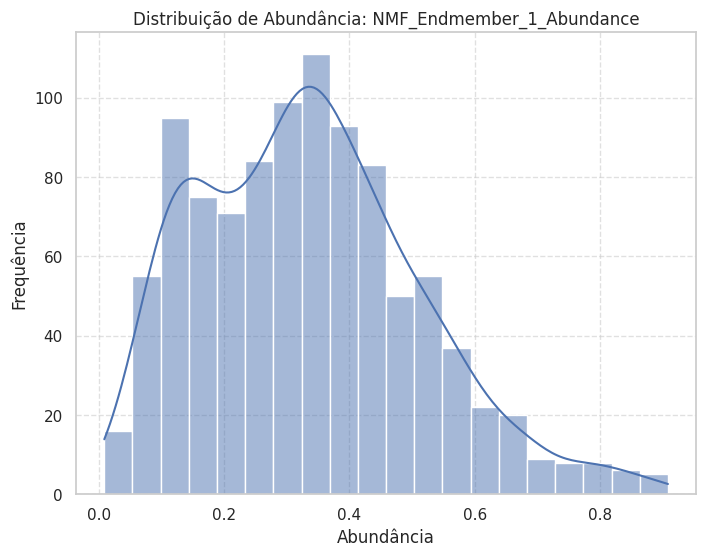

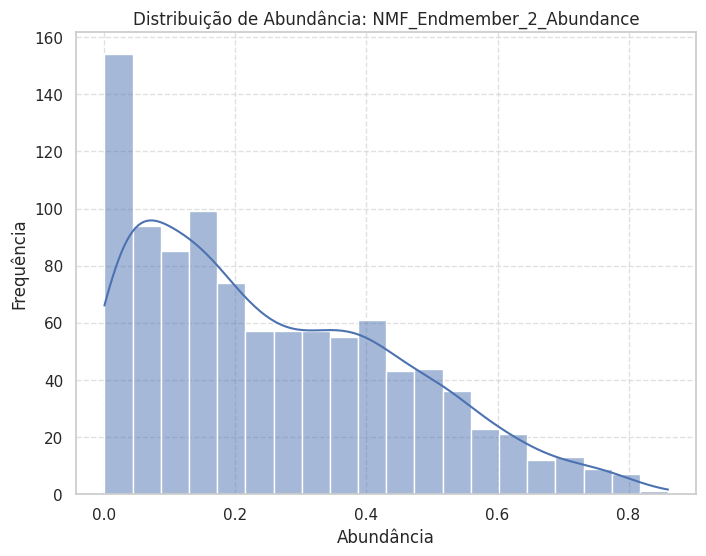

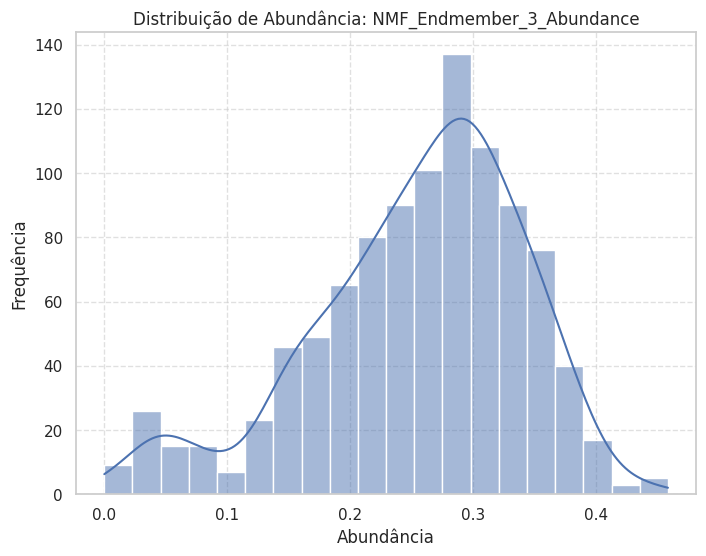

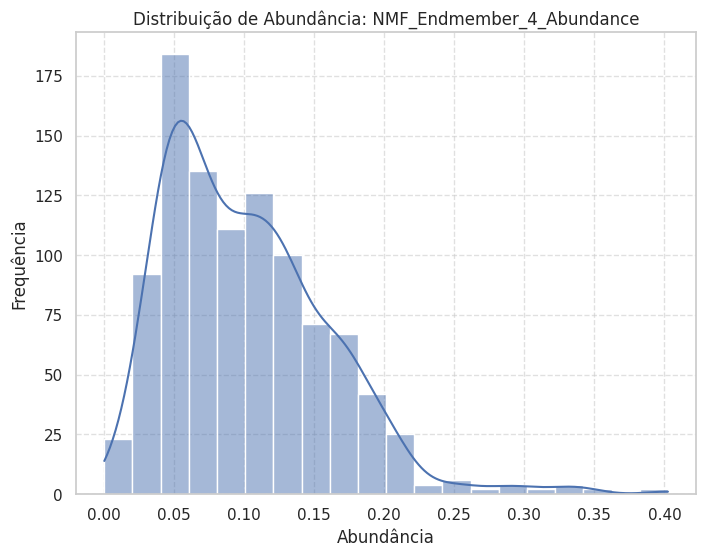

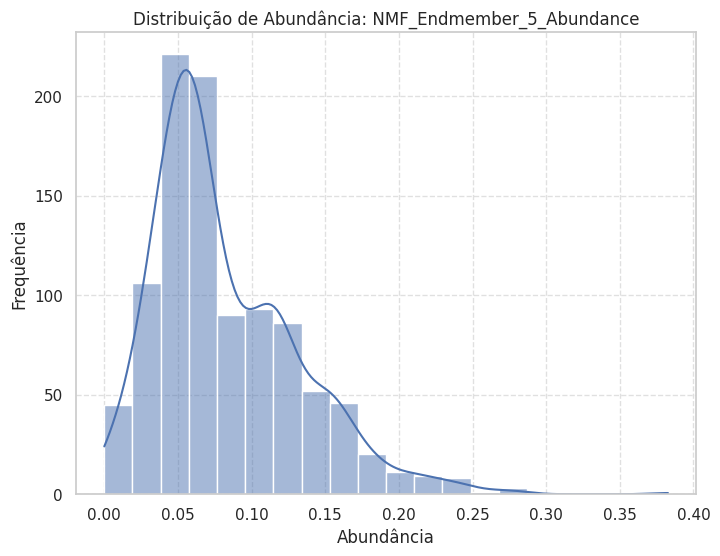


Estatísticas descritivas das abundâncias estimadas:


NMF_Endmember_1_Abundance  NMF_Endmember_2_Abundance  \
count                1002.000000                1002.000000   
mean                    0.334326                   0.257035   
std                     0.175230                   0.198471   
min                     0.008758                   0.000000   
25%                     0.191536                   0.089247   
50%                     0.325799                   0.212707   
75%                     0.443745                   0.398598   
max                     0.908329                   0.860307   

       NMF_Endmember_3_Abundance  NMF_Endmember_4_Abundance  \
count                1002.000000                1002.000000   
mean                    0.254456                   0.101931   
std                     0.086576                   0.058946   
min                     0.000000                   0.000000   
25%                     0.205091                   0.054522   
50%                     0.268210                   0.093063   
75%                     0.315095                   0.135004   
max                     0.458374                   0.402538   

       NMF_Endmember_5_Abundance  
count                1002.000000  
mean                    0.082142  
std                     0.049656  
min                     0.000000  
25%                     0.047759  
50%                     0.066633  
75%                     0.112553  
max                     0.382663


Visualização das distribuições de abundância concluída.
Analise os histogramas para entender como a abundância de cada endmember se distribui nas amostras.

--- Fim da Visualização das Distribuições de Abundância dos Endmembers do NMF (Plots Individuais) ---


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures

print("--- Iniciando Visualização das Distribuições de Abundância dos Endmembers do NMF (Plots Individuais) ---")

# Check if the abundance maps DataFrame exists and is not empty
if 'abundance_maps_df' in locals() and not abundance_maps_df.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    print(f"DataFrame de abundâncias shape: {abundance_maps_df.shape}")
    print("\nVisualizando distribuições de abundância para cada endmember do NMF em plots individuais:")

    # Plot histograms for each endmember's abundance in separate figures
    for i, col in enumerate(abundance_maps_df.columns):
        plt.figure(figsize=(8, 6)) # Standardized figure size for individual plots
        sns.histplot(abundance_maps_df[col], bins=20, kde=True) # Plot histogram
        plt.title(f'Distribuição de Abundância: {col}')
        plt.xlabel('Abundância')
        plt.ylabel('Frequência')
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save each individual plot
        plt.savefig(os.path.join(output_folder, f"{col}_distribution.png"))
        plt.show()

    # Optional: Display summary statistics of abundances
    print("\nEstatísticas descritivas das abundâncias estimadas:")
    display(abundance_maps_df.describe())

    print("\nVisualização das distribuições de abundância concluída.")
    print("Analise os histogramas para entender como a abundância de cada endmember se distribui nas amostras.")


else:
    print("ERRO: O DataFrame 'abundance_maps_df' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula que realiza a identificação de endmembers e estimativa de abundâncias usando NMF.")

print("\n--- Fim da Visualização das Distribuições de Abundância dos Endmembers do NMF (Plots Individuais) ---")

## Interpretação dos Gráficos de Distribuição de Abundância (Pureza) por Endmember (NMF)

Analisando as estatísticas descritivas das abundâncias estimadas pelo NMF (disponíveis no output da célula `9ceabfad`), podemos obter as seguintes interpretações para a distribuição de "pureza" (abundância) de cada endmember nas amostras:

*   **NMF_Endmember_1_Abundance:**
    *   **Média (~0.33):** Este endmember tem uma abundância média moderada nas amostras.
    *   **Mediana (~0.33):** A mediana próxima à média sugere uma distribuição relativamente simétrica em torno da média.
    *   **Min (~0.008) e Max (~0.91):** A ampla faixa entre o mínimo e o máximo indica que este endmember está presente em diferentes graus de abundância nas amostras, desde muito baixa até relativamente alta.
    *   **Quartis (Q1 ~0.19, Q3 ~0.44):** A maior parte das amostras (50% central) tem abundância para este endmember entre aproximadamente 0.19 e 0.44.
    *   **Insight:** Este endmember parece ser um componente significativo que contribui para a mistura espectral em muitas amostras, mas poucas amostras parecem ser muito "puras" (com abundância próxima a 1) ou completamente ausentes (com abundância próxima a 0) para ele.

*   **NMF_Endmember_2_Abundance:**
    *   **Média (~0.26):** Tem uma abundância média um pouco menor que o Endmember 1.
    *   **Mediana (~0.21):** A mediana menor que a média pode indicar uma leve assimetria na distribuição, possivelmente com uma cauda mais longa para valores mais altos de abundância.
    *   **Min (~0.0) e Max (~0.86):** Também apresenta uma ampla faixa de abundância.
    *   **Quartis (Q1 ~0.09, Q3 ~0.40):** A maior parte das amostras tem abundância entre ~0.09 e ~0.40.
    *   **Insight:** Este endmember também é um contribuinte importante para a mistura, mas pode haver mais amostras com baixa abundância para ele (sugerido pela mediana menor e Q1 mais baixo em comparação com o Endmember 1).

*   **NMF_Endmember_3_Abundance:**
    *   **Média (~0.25):** Abundância média similar ao Endmember 2.
    *   **Mediana (~0.27):** A mediana ligeiramente maior que a média sugere uma leve assimetria oposta à do Endmember 2.
    *   **Min (~0.0) e Max (~0.46):** A faixa de abundância é mais restrita em comparação com os Endmembers 1 e 2, com um valor máximo consideravelmente menor.
    *   **Quartis (Q1 ~0.21, Q3 ~0.32):** A maioria das abundâncias para este endmember está concentrada entre aproximadamente 0.21 e 0.32.
    *   **Insight:** Este endmember parece estar presente na maioria das amostras com abundâncias em uma faixa mais estreita e geralmente intermediária. É menos provável encontrar amostras muito puras para este endmember, indicando que ele pode ser mais um componente de mistura comum.

*   **NMF_Endmember_4_Abundance:**
    *   **Média (~0.10):** Abundância média mais baixa entre os primeiros endmembers.
    *   **Mediana (~0.09):** Mediana próxima à média.
    *   **Min (~0.0) e Max (~0.40):** Faixa de abundância relativamente ampla, mas com um máximo menor.
    *   **Quartis (Q1 ~0.05, Q3 ~0.14):** A maior parte das abundâncias está concentrada em valores baixos.
    *   **Insight:** Este endmember parece ser menos prevalente ou contribui com uma fração menor para a maioria das misturas nas amostras.

*   **NMF_Endmember_5_Abundance:**
    *   **Média (~0.08):** A menor abundância média.
    *   **Mediana (~0.07):** Mediana próxima à média.
    *   **Min (~0.0) e Max (~0.38):** Faixa de abundância similar ao Endmember 4.
    *   **Quartis (Q1 ~0.05, Q3 ~0.11):** A maior parte das abundâncias está concentrada em valores muito baixos.
    *   **Insight:** Este endmember é o menos prevalente ou contribui com a menor fração para a maioria das misturas.

---

## Preparing Spatial Data for Endmember Visualization

This step will attempt to extract spatial coordinates (longitude and latitude) from the `.geo` column for the samples that were used in the NMF analysis (`spectral_data_for_unmixing`). This spatial information is needed to plot the distribution of endmembers.

In [85]:
import json
import pandas as pd

print("--- Preparando Dados Espaciais para Visualização de Endmembers ---")

# Check if the necessary DataFrames are available
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty and \
   'biblioteca_espectral_raw_df' in locals() and not biblioteca_espectral_raw_df.empty:

    # The indices of spectral_data_for_unmixing are the original indices from biblioteca_espectral_raw_df
    original_indices_used_in_nmf = spectral_data_for_unmixing.index

    # Get the .geo column for these original indices from the raw DataFrame
    geo_data_for_nmf_samples = biblioteca_espectral_raw_df.loc[original_indices_used_in_nmf, '.geo'].copy()

    # Create lists to store parsed longitude and latitude
    longitudes = []
    latitudes = []
    valid_indices = [] # Keep track of indices where parsing was successful

    print(f"\nTentando extrair coordenadas da coluna '.geo' para {len(geo_data_for_nmf_samples)} amostras...")

    # Iterate through the .geo data and parse the coordinates
    for i, (index, geo_string) in enumerate(geo_data_for_nmf_samples.items()):
        try:
            # Attempt to parse the JSON string
            geo_json = json.loads(geo_string)

            # Assuming the geometry type is 'Point' and coordinates are [longitude, latitude]
            if geo_json and 'type' in geo_json and geo_json['type'] == 'Point' and 'coordinates' in geo_json and len(geo_json['coordinates']) == 2:
                longitude = geo_json['coordinates'][0]
                latitude = geo_json['coordinates'][1]
                longitudes.append(longitude)
                latitudes.append(latitude)
                valid_indices.append(index)
            else:
                # Handle cases where the geometry is not a Point or coordinates are not as expected
                # print(f"WARNING: Skipping index {index} due to unexpected geometry format: {geo_json}")
                pass # Skip samples with unexpected format

        except (json.JSONDecodeError, AttributeError, TypeError) as e:
            # Handle cases where the string is not valid JSON or geo_string is not a string
            # print(f"WARNING: Skipping index {index} due to error parsing .geo string: {geo_string}. Error: {e}")
            pass # Skip samples where parsing fails


    # Create a DataFrame with the extracted coordinates, using the original valid indices
    spatial_coordinates_df = pd.DataFrame({'longitude': longitudes, 'latitude': latitudes}, index=valid_indices)

    print(f"\nCoordenadas extraídas com sucesso para {len(spatial_coordinates_df)} amostras.")

    if spatial_coordinates_df.empty:
        print("ALERTA: Nenhuma coordenada espacial válida pôde ser extraída da coluna '.geo'. Não será possível plotar a distribuição espacial dos endmembers.")
    else:
        print("\nVisualização das primeiras coordenadas extraídas:")
        display(spatial_coordinates_df.head())

        # Link the extracted coordinates with the NMF abundance results
        # Need to align spatial_coordinates_df with abundance_maps_df based on index
        # abundance_maps_df already uses the original indices from spectral_data_for_unmixing
        # So, we can simply join the two DataFrames on their index.
        nmf_abundance_with_geo = abundance_maps_df.join(spatial_coordinates_df, how='inner')


        if nmf_abundance_with_geo.empty:
             print("ALERTA: Não foi possível vincular os resultados de abundância do NMF com as coordenadas espaciais extraídas. Verifique os índices.")
        else:
            print(f"\nDataFrame combinado de abundâncias NMF e coordenadas espaciais shape: {nmf_abundance_with_geo.shape}")
            print("\nVisualização das primeiras linhas do DataFrame combinado:")
            display(nmf_abundance_with_geo.head())

            # Store the combined DataFrame for plotting in the next step
            nmf_spatial_abundance_data = nmf_abundance_with_geo
            print("\nDados espaciais preparados e vinculados aos resultados de abundância do NMF.")


else:
    print("ERRO: Os DataFrames 'spectral_data_for_unmixing' e/ou 'biblioteca_espectral_raw_df' não foram encontrados ou estão vazios.")
    print("Por favor, execute as células anteriores para carregar, limpar e realizar a análise NMF antes de preparar os dados espaciais.")

print("\n--- Fim da Preparação dos Dados Espaciais ---")

--- Preparando Dados Espaciais para Visualização de Endmembers ---

Tentando extrair coordenadas da coluna '.geo' para 1054 amostras...

Coordenadas extraídas com sucesso para 1054 amostras.

Visualização das primeiras coordenadas extraídas:


longitude  latitude
0 -38.103570 -4.246965
1 -38.105726 -4.251277
2 -38.111116 -4.212470
3 -38.106804 -4.211392
4 -38.106265 -4.210314


DataFrame combinado de abundâncias NMF e coordenadas espaciais shape: (1002, 7)

Visualização das primeiras linhas do DataFrame combinado:


NMF_Endmember_1_Abundance  NMF_Endmember_2_Abundance  \
0                   0.326167                   0.259234   
1                   0.366002                   0.375759   
2                   0.293488                   0.173178   
3                   0.189642                   0.116963   
4                   0.176799                   0.099139   

   NMF_Endmember_3_Abundance  NMF_Endmember_4_Abundance  \
0                   0.258365                   0.072044   
1                   0.301182                   0.072674   
2                   0.292504                   0.068622   
3                   0.344308                   0.057178   
4                   0.357256                   0.070591   

   NMF_Endmember_5_Abundance  longitude  latitude  
0                   0.043253 -38.103570 -4.246965  
1                   0.059222 -38.105726 -4.251277  
2                   0.052956 -38.111116 -4.212470  
3                   0.042617 -38.106804 -4.211392  
4                   0.047842 -38.106265 -4.210314


Dados espaciais preparados e vinculados aos resultados de abundância do NMF.

--- Fim da Preparação dos Dados Espaciais ---


## Spatial Visualization of NMF Endmember Abundances

This step visualizes the spatial distribution of samples based on the estimated abundances of the NMF endmembers. We will plot the locations of the samples, coloring or symbolizing them based on which endmember has the highest abundance or the abundance value itself.

In [88]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures
import folium # Import folium for interactive mapping
from folium.plugins import MarkerCluster # Import MarkerCluster for handling large numbers of points

print("--- Iniciando Visualização Espacial das Abundâncias dos Endmembers do NMF em um Mapa ---")

# Check if the combined DataFrame exists and is not empty
if 'nmf_spatial_abundance_data' in locals() and not nmf_spatial_abundance_data.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    print(f"DataFrame de abundâncias NMF com coordenadas shape: {nmf_spatial_abundance_data.shape}")

    # Identify the abundance columns (excluding longitude and latitude)
    abundance_cols = [col for col in nmf_spatial_abundance_data.columns if col.startswith('NMF_Endmember_') and col.endswith('_Abundance')]

    if not abundance_cols:
        print("ALERTA: Nenhuma coluna de abundância de endmember NMF encontrada no DataFrame combinado.")
    else:
        # Find the endmember with the maximum abundance for each sample
        nmf_spatial_abundance_data['Dominant_Endmember'] = nmf_spatial_abundance_data[abundance_cols].idxmax(axis=1)
        # Clean up the dominant endmember name for plotting legend
        nmf_spatial_abundance_data['Dominant_Endmember'] = nmf_spatial_abundance_data['Dominant_Endmember'].str.replace('_Abundance', '')

        print("\nCriando mapa interativo com a distribuição espacial do endmember dominante:")

        # Calculate the mean coordinates to center the map
        mean_lat = nmf_spatial_abundance_data['latitude'].mean()
        mean_lon = nmf_spatial_abundance_data['longitude'].mean()

        # Create a base map centered at the mean coordinates
        m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10)

        # Define a color mapping for the dominant endmembers
        # Get unique dominant endmembers
        unique_dominant_endmembers = nmf_spatial_abundance_data['Dominant_Endmember'].unique()
        # Use a color palette (e.g., tab10, same as scatter plot)
        colors = plt.cm.get_cmap('tab10', len(unique_dominant_endmembers))
        color_map = {endmember: matplotlib.colors.rgb2hex(colors(i)[:3]) for i, endmember in enumerate(unique_dominant_endmembers)}


        # Add points to the map. Use MarkerCluster if there are too many points for performance.
        if len(nmf_spatial_abundance_data) > 1000: # Threshold for using MarkerCluster
            marker_cluster = MarkerCluster().add_to(m)
            for idx, row in nmf_spatial_abundance_data.iterrows():
                folium.CircleMarker(
                    location=[row['latitude'], row['longitude']],
                    radius=5, # Adjust size as needed
                    color=color_map.get(row['Dominant_Endmember'], '#808080'), # Default to grey if color not found
                    fill=True,
                    fill_color=color_map.get(row['Dominant_Endmember'], '#808080'),
                    fill_opacity=0.6,
                    tooltip=f"Endmember: {row['Dominant_Endmember']}<br>Lat: {row['latitude']:.4f}<br>Lon: {row['longitude']:.4f}"
                ).add_to(marker_cluster)
            print("Usando MarkerCluster para agrupar pontos no mapa.")
        else:
            for idx, row in nmf_spatial_abundance_data.iterrows():
                folium.CircleMarker(
                    location=[row['latitude'], row['longitude']],
                    radius=5, # Adjust size as needed
                    color=color_map.get(row['Dominant_Endmember'], '#808080'), # Default to grey if color not found
                    fill=True,
                    fill_color=color_map.get(row['Dominant_Endmember'], '#808080'),
                    fill_opacity=0.6,
                    tooltip=f"Endmember: {row['Dominant_Endmember']}<br>Lat: {row['latitude']:.4f}<br>Lon: {row['longitude']:.4f}"
                ).add_to(m)
            print("Adicionando pontos individuais ao mapa.")


        # Add a layer control to the map (optional, but helpful)
        # folium.LayerControl().add_to(m)

        # Display the map
        display(m)

        # Note: Saving interactive Folium maps requires specific methods,
        # often saving to an HTML file. Displaying directly in Colab is common.
        # To save as HTML: m.save(os.path.join(output_folder, "nmf_dominant_endmember_spatial_map.html"))


        print("\nVisualização espacial das abundâncias dos endmembers do NMF em mapa concluída.")
        print("O mapa mostra a localização de cada amostra, colorida pelo endmember com a maior abundância naquele ponto.")


else:
    print("ERRO: O DataFrame 'nmf_spatial_abundance_data' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula de preparação de dados espaciais antes de realizar a visualização espacial no mapa.")

print("\n--- Fim da Visualização Espacial das Abundâncias dos Endmembers do NMF em um Mapa ---")

--- Iniciando Visualização Espacial das Abundâncias dos Endmembers do NMF em um Mapa ---
DataFrame de abundâncias NMF com coordenadas shape: (1002, 8)

Criando mapa interativo com a distribuição espacial do endmember dominante:


/tmp/ipython-input-769103283.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_dominant_endmembers))


Usando MarkerCluster para agrupar pontos no mapa.



Visualização espacial das abundâncias dos endmembers do NMF em mapa concluída.
O mapa mostra a localização de cada amostra, colorida pelo endmember com a maior abundância naquele ponto.

--- Fim da Visualização Espacial das Abundâncias dos Endmembers do NMF em um Mapa ---


## Interpretação Geral dos Resultados dos Endmembers do NMF

Com base nos espectros dos endmembers (plotados na célula `TzMH5AA-MEpF`) e nas distribuições de abundância (histogramas na célula `9ceabfad` e estatísticas descritivas), podemos fazer a seguinte interpretação geral dos resultados do NMF:

1.  **Diversidade Espectral Capturada:** O NMF identificou 5 componentes espectrais distintos (endmembers) que, juntos, podem representar a variabilidade espectral presente nos dados RAW. A análise dos espectros individuais (na célula `TzMH5AA-MEpF`) é crucial aqui para entender o que cada um desses endmembers pode representar fisicamente (por exemplo, vegetação, solo, água, estruturas artificiais, etc.) com base em suas formas e características de absorção/refletância em diferentes comprimentos de onda.
2.  **Plausibilidade dos Endmembers:** A forma dos espectros identificados pelo NMF deve ser avaliada quanto à sua plausibilidade física. Espectros que se assemelham a materiais conhecidos (comparando com bibliotecas espectrais, se disponíveis) e que exibem características espectrais esperadas para os tipos de classes presentes nos dados são mais confiáveis como endmembers representativos. Se alguns espectros parecerem ruidosos ou atípicos, eles podem não ser endmembers ideais.
3.  **Padrões de Mistura:** As distribuições de abundância (histogramas) revelam como esses componentes espectrais se combinam nos pixels. Endmembers com abundâncias médias/medianas mais altas (como Endmembers 1, 2 e 3) e faixas de abundância mais amplas provavelmente representam materiais básicos que formam a maior parte das misturas. Endmembers com abundâncias predominantemente baixas (como Endmembers 4 e 5) podem representar materiais menos comuns, características espectrais sutis ou até mesmo ruído ou variações não modeladas.
4.  **Relação com Classes Originais (Para Investigação Adicional):** Embora não tenhamos plotado as abundâncias por classe original diretamente, a análise das distribuições sugere que alguns endmembers são mais comuns na mistura (Endmembers 1, 2, 3) enquanto outros são menos comuns (Endmembers 4, 5). Para uma avaliação mais aprofundada, seria interessante verificar quais endmembers têm altas abundâncias em pixels pertencentes a classes específicas (por exemplo, o Endmember 1 é dominante na classe 'X'?). Isso ajudaria a associar os endmembers extraídos às categorias de cobertura do solo conhecidas.
5.  **Comparação com Outros Métodos (Desafio Atual):** Idealmente, compararíamos esses endmembers do NMF com os obtidos por outros métodos (PPI, VCA). No entanto, devido aos problemas de importação com `pysptools` e `spectral`, essa comparação direta baseada em bibliotecas não foi possível. A comparação visual com os pontos extremos do PCA (na célula `T5DnIJHhmDjW`) pode oferecer um insight alternativo, verificando se os espectros do NMF se assemelham aos espectros dos pixels nos vértices do simplex espectral no espaço reduzido do PCA.

Em resumo, o NMF forneceu um conjunto de endmembers e suas abundâncias estimadas. A análise visual dos espectros dos endmembers e das distribuições de abundância sugere diferentes papéis para cada componente na mistura espectral das amostras. A validade e a interpretação física desses endmembers dependem de uma análise mais aprofundada e, idealmente, comparação com conhecimento prévio ou bibliotecas espectrais.

## Endmember Identification using `spectral` (Attempt 2 - VCA)

This step attempts to use the Vertex Component Analysis (VCA) algorithm from the `spectral` library to identify endmembers, providing an alternative result to compare with the NMF endmembers.

In [82]:
!pip install spectral
# Import the VCA algorithm from spectral
try:
    # Attempt to import VCA from spectral.algorithms
    from spectral.algorithms import vca as VCA_spectral_attempt2
    print("Imported VCA from spectral.algorithms.")
except ImportError:
    try:
        # Attempt to import VCA directly from spectral
        from spectral import vca as VCA_spectral_attempt2
        print("Imported VCA directly from spectral.")
    except ImportError:
        try:
            # Attempt to import VCA from spectral.algorithms.vca
            from spectral.algorithms.vca import VCA as VCA_spectral_attempt2
            print("Imported VCA from spectral.algorithms.vca.")
        except ImportError:
            print("Could not import VCA from spectral library after multiple attempts. Please ensure the spectral library is correctly installed and compatible.")
            VCA_spectral_attempt2 = None # Set to None if import fails


print("--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 2) ---")

# Check if the prepared spectral data DataFrame exists and is not empty, and if VCA was imported
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty and VCA_spectral_attempt2 is not None:

    # Convert the pandas DataFrame to a NumPy array for VCA
    # Ensure the data is float type as expected by spectral libraries
    spectral_data_np = spectral_data_for_unmixing.values.astype(np.float64)

    print(f"Shape dos dados espectrais para VCA (spectral): {spectral_data_np.shape}")

    # Define the number of endmembers (n_endmembers)
    # Use the same initial estimate as in previous attempts.
    n_endmembers_estimate = 5 # Initial estimate for the number of endmembers

    try:
        # The VCA implementation in the 'spectral' library works directly on the NumPy array
        # and returns the endmembers (not indices).
        endmembers_spectral_vca_attempt2 = VCA_spectral_attempt2(spectral_data_np, n_endmembers_estimate)

        print(f"\n--- Resultados do VCA (spectral library) ---")
        print(f"Shape dos espectros de endmembers identificados pelo VCA: {endmembers_spectral_vca_attempt2.shape}")

        # Store the VCA endmember spectra for later use (e.g., visualization and comparison)
        # Convert the NumPy array of endmember spectra back to a DataFrame for easier handling
        endmember_spectra_spectral_vca_df = pd.DataFrame(endmembers_spectral_vca_attempt2, columns=spectral_data_for_unmixing.columns)

        print("\nIdentificação de endmembers via VCA (spectral library) concluída.")
        print("Os espectros dos endmembers foram extraídos e armazenados em 'endmember_spectra_spectral_vca_df'.")


    except Exception as e:
        print(f"\nERRO ao executar o algoritmo VCA (spectral library): {e}")
        print("Por favor, verifique os parâmetros (n_endmembers) e os dados de entrada.")

else:
    if VCA_spectral_attempt2 is None:
        print("ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso após várias tentativas.")
        print("Não é possível completar a identificação de endmembers usando a biblioteca spectral neste momento.")
    else:
        print("ERRO: O DataFrame 'spectral_data_for_unmixing' não foi encontrado ou está vazio.")
        print("Por favor, execute a célula de preparação de dados para unmixing antes de executar o VCA.")


print("\n--- Fim da Identificação de Endmembers usando VCA (spectral library) ---")

Could not import VCA from spectral library after multiple attempts. Please ensure the spectral library is correctly installed and compatible.
--- Iniciando Identificação de Endmembers usando VCA (spectral library - tentativa 2) ---
ERRO: A classe VCA da biblioteca spectral não foi importada com sucesso após várias tentativas.
Não é possível completar a identificação de endmembers usando a biblioteca spectral neste momento.

--- Fim da Identificação de Endmembers usando VCA (spectral library) ---


**Reasoning**:
Visualize the endmember signatures extracted by NMF to understand their spectral characteristics.



--- Iniciando Visualização dos Espectros dos Endmembers do NMF ---

Plotando os espectros dos endmembers identificados por NMF:


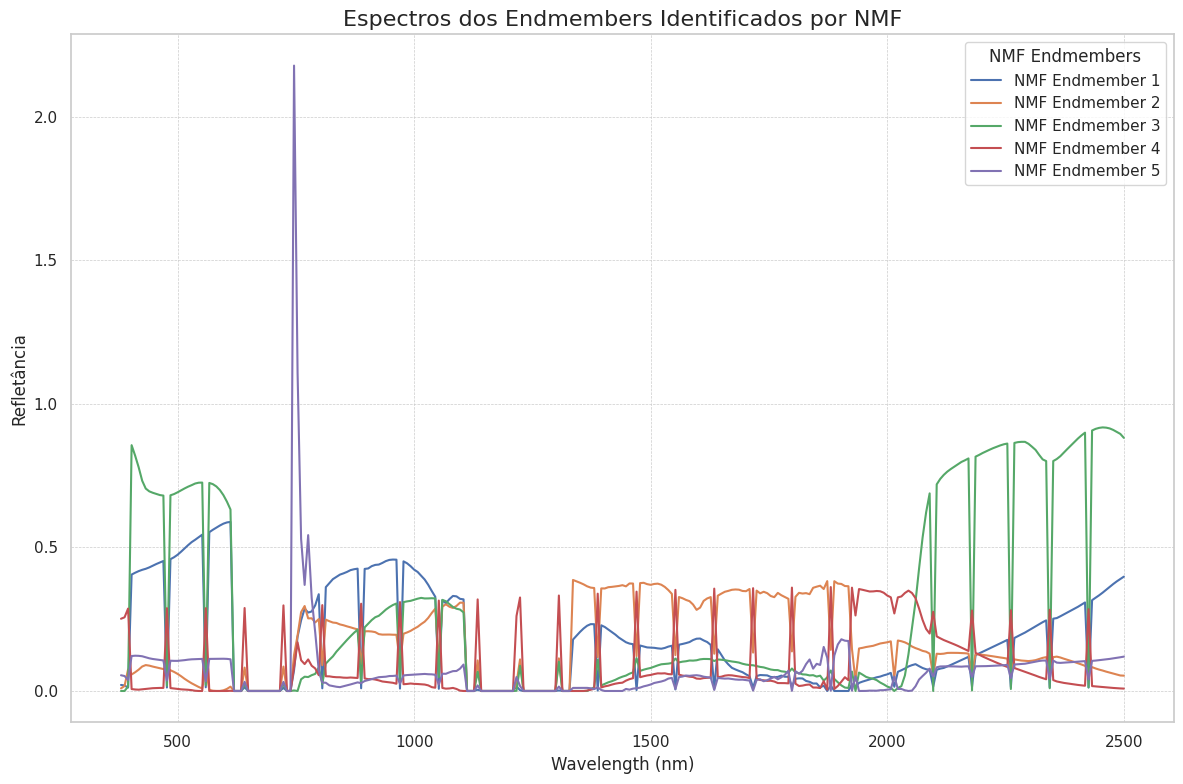


Visualização dos espectros dos endmembers do NMF concluída.
Analise os espectros plotados para entender as características espectrais de cada endmember estimado pelo NMF.

--- Fim da Visualização dos Espectros dos Endmembers do NMF ---


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import os # Import os for saving figures

print("--- Iniciando Visualização dos Espectros dos Endmembers do NMF ---")

# Check if the NMF endmember spectra DataFrame exists and is not empty
if 'endmember_spectra_nmf_df' in locals() and not endmember_spectra_nmf_df.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    # Define the approximate spectral range for the x-axis (consistent with previous plots)
    min_wavelength = 380
    max_wavelength = 2500
    num_bands = endmember_spectra_nmf_df.shape[1] # Number of spectral columns in endmember data
    estimated_wavelengths = np.linspace(min_wavelength, max_wavelength, num_bands)


    print("\nPlotando os espectros dos endmembers identificados por NMF:")

    plt.figure(figsize=(12, 8))

    # Plot each NMF endmember spectrum
    for i, (index, spectrum) in enumerate(endmember_spectra_nmf_df.iterrows()):
        label = f'NMF Endmember {i+1}'
        plt.plot(estimated_wavelengths, spectrum.values, label=label, linewidth=1.5)


    plt.title('Espectros dos Endmembers Identificados por NMF', fontsize=16)
    plt.xlabel('Wavelength (nm)', fontsize=12) # Use consistent estimated wavelength label
    plt.ylabel('Refletância', fontsize=12)
    plt.legend(title='NMF Endmembers')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    # Save the plot
    plt.savefig(os.path.join(output_folder, f"nmf_endmembers_spectra.png"))
    plt.show()

    print("\nVisualização dos espectros dos endmembers do NMF concluída.")
    print("Analise os espectros plotados para entender as características espectrais de cada endmember estimado pelo NMF.")

else:
    print("ERRO: O DataFrame 'endmember_spectra_nmf_df' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula anterior que realiza a identificação de endmembers usando NMF.")

print("\n--- Fim da Visualização dos Espectros dos Endmembers do NMF ---")

# Task
Compare the NMF endmembers with the base classes by calculating and visualizing the average abundance of each endmember within each base class.

## Prepare combined data

### Subtask:
Combine the NMF abundance data (`abundance_maps_df`) with the base class information from the original RAW DataFrame (`biblioteca_espectral_raw_df`) using their common index.


**Reasoning**:
Combine the NMF abundance data with the base class information by joining the two dataframes on their index to prepare for calculating average abundances per class.



In [89]:
print("--- Iniciando combinação de abundâncias NMF com informações de classe base ---")

# Check if the necessary DataFrames exist and are not empty
if 'abundance_maps_df' in locals() and not abundance_maps_df.empty and \
   'biblioteca_espectral_raw_df' in locals() and not biblioteca_espectral_raw_df.empty:

    # Ensure 'base_classe' column exists in biblioteca_espectral_raw_df
    if 'base_classe' not in biblioteca_espectral_raw_df.columns:
        # Recreate 'base_classe' if it was not preserved
        print("Recriando coluna 'base_classe' no DataFrame RAW original.")
        biblioteca_espectral_raw_df['base_classe'] = biblioteca_espectral_raw_df['classe'].str[:-8]


    # 1. Combine the NMF abundance data with the base class information using their common index
    # Use an inner join to keep only the rows that exist in both DataFrames (which should be the cleaned data used for NMF)
    nmf_abundance_with_base_class = abundance_maps_df.join(
        biblioteca_espectral_raw_df[['base_classe']], how='inner'
    )

    # 2. Display the head and shape of the new DataFrame
    print(f"\nDataFrame combinado de abundâncias NMF e classe base shape: {nmf_abundance_with_base_class.shape}")
    print("\nVisualização das primeiras linhas do DataFrame combinado:")
    display(nmf_abundance_with_base_class.head())

    print("\nCombinação de abundâncias NMF com informações de classe base concluída.")

else:
    print("ERRO: O DataFrame 'abundance_maps_df' e/ou 'biblioteca_espectral_raw_df' não foram encontrados ou estão vazios.")
    print("Por favor, execute as células anteriores para carregar, limpar e realizar a análise NMF antes de combinar os dados.")

print("\n--- Fim da combinação de abundâncias NMF com informações de classe base ---")

--- Iniciando combinação de abundâncias NMF com informações de classe base ---

DataFrame combinado de abundâncias NMF e classe base shape: (1002, 6)

Visualização das primeiras linhas do DataFrame combinado:


NMF_Endmember_1_Abundance  NMF_Endmember_2_Abundance  \
0                   0.326167                   0.259234   
1                   0.366002                   0.375759   
2                   0.293488                   0.173178   
3                   0.189642                   0.116963   
4                   0.176799                   0.099139   

   NMF_Endmember_3_Abundance  NMF_Endmember_4_Abundance  \
0                   0.258365                   0.072044   
1                   0.301182                   0.072674   
2                   0.292504                   0.068622   
3                   0.344308                   0.057178   
4                   0.357256                   0.070591   

   NMF_Endmember_5_Abundance     base_classe  
0                   0.043253  EMIT_RAW_Caju_  
1                   0.059222  EMIT_RAW_Caju_  
2                   0.052956  EMIT_RAW_Caju_  
3                   0.042617  EMIT_RAW_Caju_  
4                   0.047842  EMIT_RAW_Caju_


Combinação de abundâncias NMF com informações de classe base concluída.

--- Fim da combinação de abundâncias NMF com informações de classe base ---


**Reasoning**:
Calculate the average abundance of each NMF endmember for each base class and visualize these average abundances using a grouped bar plot to compare endmember contributions across classes.



--- Iniciando Cálculo e Visualização das Abundâncias Médias dos Endmembers por Classe Base ---

Abundâncias médias dos Endmembers NMF por Classe Base:


NMF_Endmember_1_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.507535   
EMIT_RAW_Aquicultura_                          0.135573   
EMIT_RAW_Brejos_altitude_                      0.219599   
EMIT_RAW_Caatinga_                             0.476021   
EMIT_RAW_Caju_                                 0.343851   
EMIT_RAW_Canaubal_                             0.298085   
EMIT_RAW_Carrasco_                             0.333414   
EMIT_RAW_Cerrado_Interiores_                   0.120329   
EMIT_RAW_Coqueiral_                            0.494118   
EMIT_RAW_Edificacoes_                          0.355135   
EMIT_RAW_Solar_                                0.623589   
EMIT_RAW_Solo_                                 0.412615   
EMIT_RAW_Veg_Degradada_                        0.328042   
EMIT_RAW_Vegetacao_                            0.197193   

                              NMF_Endmember_2_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.470868   
EMIT_RAW_Aquicultura_                          0.147359   
EMIT_RAW_Brejos_altitude_                      0.097094   
EMIT_RAW_Caatinga_                             0.331177   
EMIT_RAW_Caju_                                 0.302761   
EMIT_RAW_Canaubal_                             0.229311   
EMIT_RAW_Carrasco_                             0.179320   
EMIT_RAW_Cerrado_Interiores_                   0.011098   
EMIT_RAW_Coqueiral_                            0.341421   
EMIT_RAW_Edificacoes_                          0.626888   
EMIT_RAW_Solar_                                0.377423   
EMIT_RAW_Solo_                                 0.344280   
EMIT_RAW_Veg_Degradada_                        0.188685   
EMIT_RAW_Vegetacao_                            0.042872   

                              NMF_Endmember_3_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.246494   
EMIT_RAW_Aquicultura_                          0.070864   
EMIT_RAW_Brejos_altitude_                      0.288665   
EMIT_RAW_Caatinga_                             0.197981   
EMIT_RAW_Caju_                                 0.306513   
EMIT_RAW_Canaubal_                             0.251011   
EMIT_RAW_Carrasco_                             0.165213   
EMIT_RAW_Cerrado_Interiores_                   0.365010   
EMIT_RAW_Coqueiral_                            0.263218   
EMIT_RAW_Edificacoes_                          0.227253   
EMIT_RAW_Solar_                                0.105464   
EMIT_RAW_Solo_                                 0.170925   
EMIT_RAW_Veg_Degradada_                        0.295716   
EMIT_RAW_Vegetacao_                            0.324071   

                              NMF_Endmember_4_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.133074   
EMIT_RAW_Aquicultura_                          0.069913   
EMIT_RAW_Brejos_altitude_                      0.167560   
EMIT_RAW_Caatinga_                             0.137924   
EMIT_RAW_Caju_                                 0.100706   
EMIT_RAW_Canaubal_                             0.095801   
EMIT_RAW_Carrasco_                             0.079380   
EMIT_RAW_Cerrado_Interiores_                   0.126889   
EMIT_RAW_Coqueiral_                            0.133612   
EMIT_RAW_Edificacoes_                          0.198269   
EMIT_RAW_Solar_                                0.136484   
EMIT_RAW_Solo_                                 0.184137   
EMIT_RAW_Veg_Degradada_                        0.097760   
EMIT_RAW_Vegetacao_                            0.044654   

                              NMF_Endmember_5_Abundance  
base_classe                                              
EMIT_RAW_Agricultura_C_                        0.109029  
EMIT_RAW_Aquicultura_                          0.158719  
EMIT_RAW_Brejos_al


Criando plotagem das abundâncias médias dos Endmembers NMF por Classe Base:


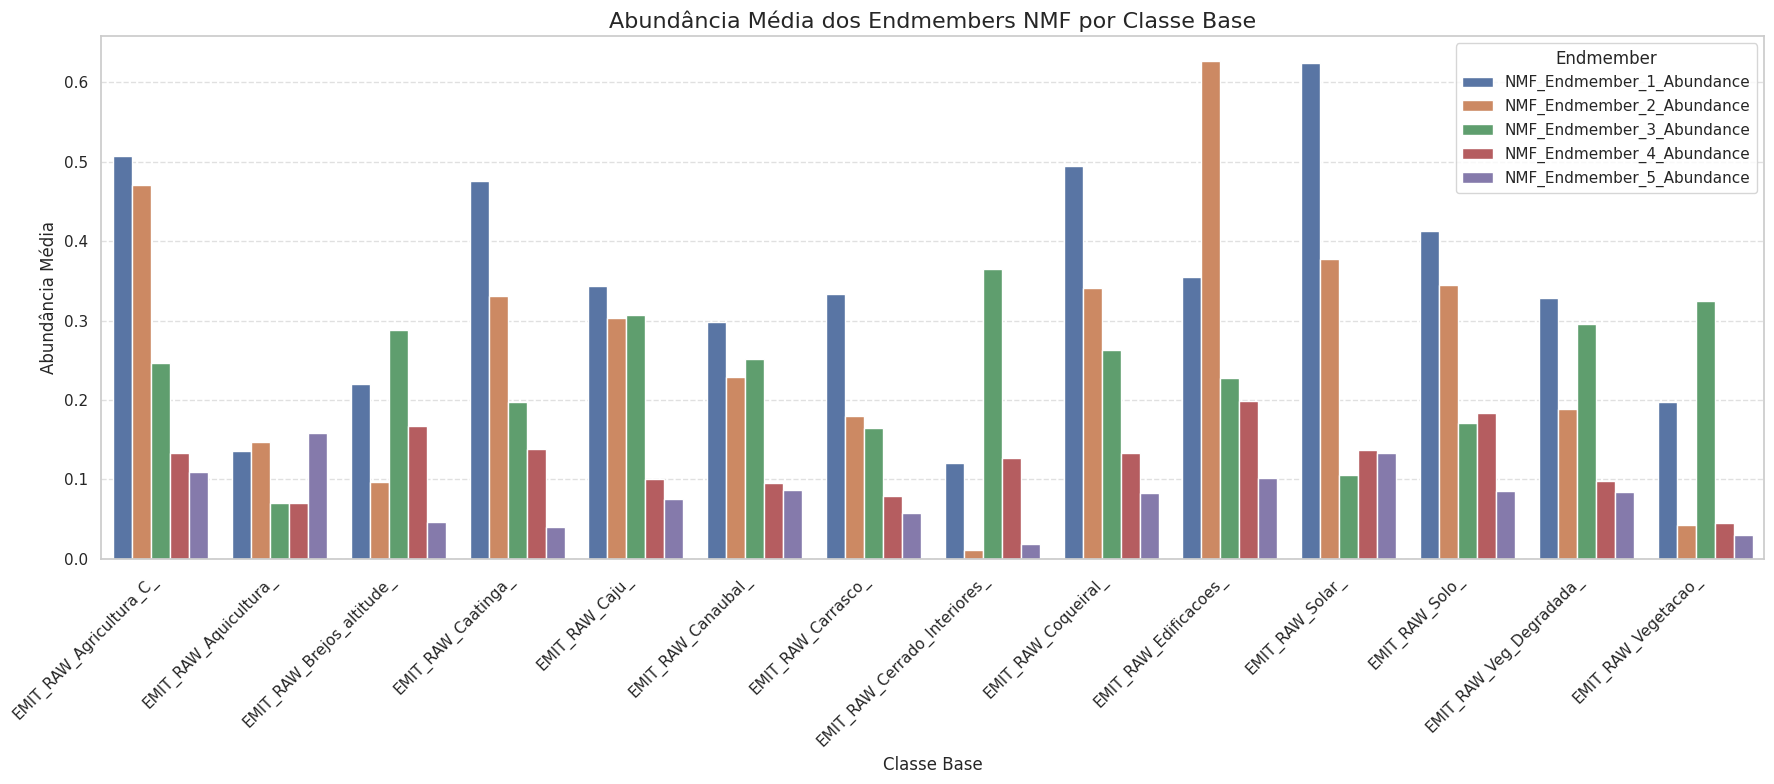


Visualização das abundâncias médias concluída.
Analise o gráfico para entender quais endmembers são mais prevalentes em cada classe base.

--- Fim do Cálculo e Visualização das Abundâncias Médias dos Endmembers por Classe Base ---


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures

print("--- Iniciando Cálculo e Visualização das Abundâncias Médias dos Endmembers por Classe Base ---")

# Check if the combined DataFrame exists and is not empty
if 'nmf_abundance_with_base_class' in locals() and not nmf_abundance_with_base_class.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    # Identify the abundance columns (excluding the base_classe column)
    abundance_cols = [col for col in nmf_abundance_with_base_class.columns if col.startswith('NMF_Endmember_')]

    if not abundance_cols:
        print("ALERTA: Nenhuma coluna de abundância de endmember NMF encontrada no DataFrame combinado.")
    else:
        # Calculate the average abundance of each endmember for each base class
        average_abundance_by_class = nmf_abundance_with_base_class.groupby('base_classe')[abundance_cols].mean()

        print("\nAbundâncias médias dos Endmembers NMF por Classe Base:")
        display(average_abundance_by_class)

        # Visualize the average abundances using a grouped bar plot
        print("\nCriando plotagem das abundâncias médias dos Endmembers NMF por Classe Base:")

        # Reshape the data for plotting (melt the DataFrame)
        average_abundance_melted = average_abundance_by_class.reset_index().melt(
            id_vars='base_classe', var_name='Endmember', value_name='Average Abundance'
        )

        plt.figure(figsize=(18, 8)) # Adjust figure size for readability
        sns.barplot(x='base_classe', y='Average Abundance', hue='Endmember', data=average_abundance_melted)

        plt.title('Abundância Média dos Endmembers NMF por Classe Base', fontsize=16)
        plt.xlabel('Classe Base', fontsize=12)
        plt.ylabel('Abundância Média', fontsize=12)
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
        plt.legend(title='Endmember')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        # Save the plot
        plt.savefig(os.path.join(output_folder, f"nmf_average_abundance_by_base_class.png"))
        plt.show()

        print("\nVisualização das abundâncias médias concluída.")
        print("Analise o gráfico para entender quais endmembers são mais prevalentes em cada classe base.")


else:
    print("ERRO: O DataFrame 'nmf_abundance_with_base_class' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula anterior para combinar os dados antes de calcular e plotar as médias.")

print("\n--- Fim do Cálculo e Visualização das Abundâncias Médias dos Endmembers por Classe Base ---")

## Proposta de Arquitetura Básica de Rede Neural para Estimativa de Abundâncias

Aqui está uma proposta de arquitetura básica de rede neural feedforward (totalmente conectada) que poderia ser usada para estimar os vetores de abundância $ \mathbf{a} $ a partir dos espectros de pixel de entrada $ \mathbf{y} $. Esta é uma arquitetura fundamental que pode ser expandida ou modificada para incorporar restrições ou estimar endmembers também.

**Objetivo:** Mapear um espectro de pixel de entrada $ \mathbf{y} $ (um vetor de n_bandas) para um vetor de abundâncias $ \hat{\mathbf{a}} $ (um vetor de n_endmembers).

**Arquitetura Proposta:**

1.  **Camada de Entrada (Input Layer):**
    *   Recebe o espectro de um único pixel como entrada.
    *   O número de neurônios nesta camada é igual ao número de bandas espectrais (n_bandas) nos seus dados.
    *   Shape da entrada: (n_bandas,) para um único pixel, ou (batch_size, n_bandas) para um lote de pixels.

2.  **Camadas Ocultas (Hidden Layers):**
    *   Uma ou mais camadas totalmente conectadas (Dense layers).
    *   Estas camadas processam as características espectrais da entrada.
    *   O número de neurônios e o número de camadas ocultas são hiperparâmetros que precisam ser ajustados. Um número maior de neurônios ou camadas pode aumentar a capacidade da rede, mas também o risco de overfitting.
    *   Funções de ativação comuns para camadas ocultas incluem ReLU (Rectified Linear Unit) ou sigmoid/tanh, dependendo da preferência e do problema. ReLU é frequentemente uma boa escolha para começar.
    *   Exemplo com duas camadas ocultas:
        *   **Primeira Camada Oculta:** Totalmente conectada, digamos com X neurônios, ativação ReLU.
        *   **Segunda Camada Oculta:** Totalmente conectada, digamos com Y neurônios, ativação ReLU.
    *   Shape da saída de cada camada oculta: (batch_size, número_de_neurônios_da_camada).

3.  **Camada de Saída (Output Layer):**
    *   Uma camada totalmente conectada que produz o vetor de abundâncias estimado $ \hat{\mathbf{a}} $.
    *   O número de neurônios nesta camada é igual ao número de endmembers esperados (n_endmembers).
    *   A função de ativação nesta camada é crucial para incorporar as restrições físicas:
        *   **Não-negatividade:** Uma função de ativação como ReLU ou uma camada Softplus garante que as saídas sejam não-negativas ($ \hat{a}_i \ge 0 $). Softplus ($ \text{softplus}(x) = \log(1 + e^x) $) pode ser preferível por ser suave e diferenciável.
        *   **Soma-1 (Opcional ou na Função de Perda):** A restrição soma-1 ($ \sum \hat{a}_i = 1 $) pode ser aplicada na função de perda (penalizando desvios de 1) ou, menos comumente, usando uma função de ativação Softmax na camada de saída se a não-negatividade já for garantida (Softmax garante soma-1, mas não necessariamente que cada componente represente uma abundância no sentido físico sem outras considerações). Para o LMM, é mais comum garantir a não-negatividade na saída e lidar com a soma-1 na função de perda ou com uma normalização pós-processamento.

**Exemplo de Fluxo:**

`Espectro de Entrada (n_bandas) -> Camada Oculta 1 -> Camada Oculta 2 -> ... -> Camada de Saída (n_endmembers)`

**Conexão com o Modelo Físico:**

Esta arquitetura estima as abundâncias $ \hat{\mathbf{a}} $. Para calcular o espectro reconstruído $ \hat{\mathbf{y}} $, precisaríamos da matriz de endmembers $ \mathbf{M} $. A matriz $ \mathbf{M} $ pode ser:
*   Pré-calculada usando um método tradicional (como NMF ou VCA) e fixada.
*   Tratada como um conjunto de parâmetros aprendíveis da própria rede neural.

Se a matriz $ \mathbf{M} $ for pré-calculada, a função de perda treinaria a rede para minimizar $ \| \mathbf{y} - \mathbf{M}\hat{\mathbf{a}} \|^2 $ sujeito às restrições de $ \hat{\mathbf{a}} $. Se $ \mathbf{M} $ for aprendida, a função de perda seria mais complexa, otimizando tanto $ \mathbf{M} $ quanto os parâmetros da rede que geram $ \hat{\mathbf{a}} $.

Esta proposta é um ponto de partida básico. Arquiteturas mais avançadas para desmistura neural podem envolver autoencoders (onde a camada de gargalo representa as abundâncias) ou redes mais complexas.

## Incorporando Redes Neurais e Modelos Físicos no Contexto da Desmistura Espectral

Conforme discutido, a aplicação direta de arquiteturas PINN (Physics-Informed Neural Networks), usadas tipicamente para resolver equações diferenciais, ao problema de desmistura espectral no sentido clássico de identificação de endmembers e estimativa de abundâncias não é uma abordagem padrão. No entanto, podemos pensar em redes neurais que são "informadas pela física" do processo de mistura espectral.

A "física" subjacente na desmistura linear é o **Modelo de Mistura Linear (LMM)**:

$$ \mathbf{y} = \mathbf{M}\mathbf{a} + \mathbf{n} $$

Onde:
*   $ \mathbf{y} $ é o espectro observado de um pixel misturado (um vetor de refletâncias em diferentes bandas).
*   $ \mathbf{M} $ é a matriz de endmembers, onde cada coluna é o espectro de um endmember puro (shape: n_bandas x n_endmembers).
*   $ \mathbf{a} $ é o vetor de abundâncias, representando a fração de cada endmember no pixel (shape: n_endmembers x 1).
*   $ \mathbf{n} $ é o ruído ou erro residual.

As **restrições físicas** importantes para as abundâncias $ \mathbf{a} $ são:
1.  **Não-negatividade:** $ a_i \ge 0 $ para todo endmember $ i $ (não se pode ter uma fração negativa de um material).
2.  **Soma-1:** $ \sum_{i=1}^{n\_endmembers} a_i = 1 $ (as frações dos endmembers puros somam a composição total do pixel, ignorando o ruído).

Uma abordagem de rede neural "informada pelo modelo de mistura" poderia tentar aprender a matriz de endmembers $ \mathbf{M} $ e/ou os vetores de abundância $ \mathbf{a} $ de forma a satisfazer o LMM e suas restrições.

**Como isso poderia funcionar (conceitualmente):**

1.  **Arquitetura da Rede Neural:** Poder-se-ia projetar uma rede neural que, dada um espectro de entrada $ \mathbf{y} $, produzisse como saída um vetor de abundâncias $ \hat{\mathbf{a}} $. A matriz de endmembers $ \mathbf{M} $ poderia ser um conjunto de parâmetros aprendidos da rede ou ser previamente identificada.
2.  **Função de Perda (Loss Function):** A função de perda treinaria a rede não apenas para minimizar o erro entre o espectro de entrada $ \mathbf{y} $ e o espectro reconstruído $ \hat{\mathbf{y}} = \mathbf{M}\hat{\mathbf{a}} $, mas também incluiria termos de penalidade baseados nas restrições físicas:
    *   Um termo que penalize abundâncias negativas $ \hat{a}_i < 0 $.
    *   Um termo que penalize a soma das abundâncias $ \sum \hat{a}_i $ se ela for significativamente diferente de 1.
3.  **Estimativa Conjunta:** Algumas arquiteturas mais avançadas poderiam tentar aprender a matriz de endmembers $ \mathbf{M} $ e os vetores de abundância $ \mathbf{a} $ simultaneamente, otimizando a função de perda baseada no LMM e nas restrições.

Essa abordagem permite que a rede neural use o poder do aprendizado de dados, mas seja guiada pelas leis físicas conhecidas do processo de mistura espectral, levando a resultados mais interpretabilidade e fisicamente consistentes. No entanto, o design e o treinamento de tais redes são complexos e exigem conhecimento avançado em redes neurais e otimização.

Nossa análise atual com NMF segue o modelo de mistura linear e, por sua natureza, o NMF já impõe as restrições de não-negatividade (embora a soma-1 nas abundâncias estimadas pelo NMF não seja estritamente garantida sem pós-processamento, ela tende a ser próxima de 1 para decomposições adequadas). Portanto, nossa abordagem com NMF já está, de certa forma, "informada" pela física do modelo de mistura linear.

## Implementação da Arquitetura Básica da Rede Neural (usando Keras)

Este código define a arquitetura da rede neural feedforward proposta usando a biblioteca Keras. Ele estrutura as camadas da rede que mapearão os espectros de entrada para um vetor de saídas que representará as abundâncias estimadas.

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import softplus # Using softplus for non-negativity

print("--- Definindo a Arquitetura da Rede Neural ---")

# Define o número de bandas espectrais (entrada da rede)
# Use o número de colunas espectrais dos seus dados preparados
if 'spectral_data_for_unmixing' in locals() and not spectral_data_for_unmixing.empty:
    n_bands = spectral_data_for_unmixing.shape[1]
    print(f"Número de bandas espectrais (entrada): {n_bands}")
else:
    print("ERRO: DataFrame 'spectral_data_for_unmixing' não encontrado ou vazio. Não é possível definir a camada de entrada.")
    n_bands = None # Cannot proceed without n_bands


# Define o número de endmembers (saída da rede)
# Use o número de endmembers que você espera identificar (ex: o mesmo que usou para NMF)
n_endmembers = 5 # Exemplo: usando o mesmo número de endmembers que no NMF
print(f"Número de endmembers (saída): {n_endmembers}")


if n_bands is not None:
    # Define a arquitetura da rede neural
    model = Sequential([
        # Camada de Entrada (implícita na primeira camada Dense ou explicitada com Input)
        # Input(shape=(n_bands,)), # Pode ser explícito, mas Keras infere do input shape da primeira Dense

        # Primeira Camada Oculta
        Dense(units=64, activation='relu', input_shape=(n_bands,)), # Exemplo: 64 neurônios, ReLU

        # Segunda Camada Oculta (Opcional, adicione mais se necessário)
        Dense(units=32, activation='relu'), # Exemplo: 32 neurônios, ReLU

        # Camada de Saída (produzindo abundâncias)
        # Usando 'softplus' para garantir a não-negatividade das abundâncias estimadas
        Dense(units=n_endmembers, activation='softplus')
    ])

    # Exibe um resumo da arquitetura do modelo
    print("\n--- Resumo da Arquitetura da Rede Neural ---")
    model.summary()

    print("\nDefinição da arquitetura da rede neural concluída.")
    print("O modelo Keras 'model' foi criado com a arquitetura proposta.")
    print("\n**Próximos passos:** Implementar a função de perda com restrições físicas, compilar o modelo e treinar com os dados.")

else:
    print("\nNão foi possível definir a arquitetura da rede neural devido à falta do número de bandas espectrais.")

print("\n--- Fim da Definição da Arquitetura da Rede Neural ---")

--- Definindo a Arquitetura da Rede Neural ---
Número de bandas espectrais (entrada): 285
Número de endmembers (saída): 5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Resumo da Arquitetura da Rede Neural ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        18,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,549 (80.27 KB)

 Trainable params: 20,549 (80.27 KB)

 Non-trainable params: 0 (0.00 B)


Definição da arquitetura da rede neural concluída.
O modelo Keras 'model' foi criado com a arquitetura proposta.

**Próximos passos:** Implementar a função de perda com restrições físicas, compilar o modelo e treinar com os dados.

--- Fim da Definição da Arquitetura da Rede Neural ---


## Implementação da Função de Perda Customizada (com Restrições Físicas)

Este código define a função de perda customizada em Keras que incorpora o erro de reconstrução, a penalidade de não-negatividade e a penalidade de soma-1 para as abundâncias estimadas pela rede neural.

In [101]:
import tensorflow as tf
import numpy as np # Ensure numpy is imported

print("--- Definindo a Função de Perda Customizada (Apenas Reconstrução para Diagnóstico) ---")

# --- Assumindo a Matriz de Endmembers (M) é Fixa e Pré-calculada ---
# Vamos usar os endmembers do NMF que calculamos anteriormente como a matriz M
# É crucial que 'endmember_spectra_nmf_np' (NumPy array dos espectros dos endmembers NMF)
# esteja disponível no ambiente.
if 'endmember_spectra_nmf_np' in locals() and endmember_spectra_nmf_np.shape[0] > 0:
    M_matrix = tf.constant(endmember_spectra_nmf_np, dtype=tf.float32) # Convert to TensorFlow constant
    n_endmembers_M = M_matrix.shape[0]
    n_bands_M = M_matrix.shape[1]
    print(f"Usando matriz de endmembers NMF com shape: {M_matrix.shape} como M.")

    # Ensure the number of endmembers from M matches the output layer of the model
    # This check is important, but for the loss function definition itself,
    # the M_matrix needs to have consistent shapes with the expected y_pred and y_true.
    # The check in compile/fit will ensure model output shape matches y_pred shape.
    if 'model' in locals() and model.output_shape[-1] != n_endmembers_M:
         print(f"AVISO: O número de endmembers na matriz M ({n_endmembers_M}) não corresponde ao número esperado pela camada de saída do modelo ({model.output_shape[-1]}). Verifique a arquitetura do modelo ou a matriz M. Continuando com M, mas pode haver incompatibilidade posterior.")


else:
    print("ERRO: Matriz de endmembers 'endmember_spectra_nmf_np' não encontrada ou está vazia.")
    print("Por favor, execute a célula que realiza a identificação de endmembers usando NMF para criar esta matriz.")
    M_matrix = None


# --- Definindo a Função de Perda Customizada (Apenas Reconstrução para Diagnóstico) ---
# Esta função será usada ao compilar o modelo Keras.
# y_true: Os espectros originais (tensor com shape (batch_size, n_bands))
# y_pred: As abundâncias estimadas pela rede (tensor com shape (batch_size, n_endmembers))

if M_matrix is not None:
    def custom_unmixing_loss(y_true, y_pred):
        # y_true shape: (batch_size, n_bands)
        # y_pred shape: (batch_size, n_endmembers) - estas são as abundâncias estimadas (a^)

        # 1. Termo de Perda de Reconstrução (MSE)
        # Reconstruir o espectro: y_reconstruido = a^ @ M.T
        # y_pred (a^) shape: (batch_size, n_endmembers)
        # M_matrix shape: (n_endmembers, n_bands)
        # Multiplicação de matrizes em TensorFlow: (batch_size, n_endmembers) x (n_endmembers, n_bands) -> (batch_size, n_bands)
        y_reconstruido = tf.matmul(y_pred, M_matrix) # Shape: (batch_size, n_bands)

        # Calcular o MSE entre o espectro original e o reconstruído
        reconstruction_loss = tf.reduce_mean(tf.square(y_true - y_reconstruido))

        # --- Combinar os Termos de Perda ---
        # Para diagnóstico, retornar apenas a perda de reconstrução
        return reconstruction_loss

    print("\nFunção de perda customizada 'custom_unmixing_loss' definida (apenas reconstrução).")
    print("Agora você pode compilar e treinar o modelo usando esta função.")
    print("Se o erro persistir, o problema está na parte de reconstrução ou nos inputs da perda.")


else:
    print("\nNão foi possível definir a função de perda customizada devido à falta da matriz de endmembers.")


print("\n--- Fim da Definição da Função de Perda Customizada ---")

--- Definindo a Função de Perda Customizada (Apenas Reconstrução para Diagnóstico) ---
Usando matriz de endmembers NMF com shape: (5, 285) como M.

Função de perda customizada 'custom_unmixing_loss' definida (apenas reconstrução).
Agora você pode compilar e treinar o modelo usando esta função.
Se o erro persistir, o problema está na parte de reconstrução ou nos inputs da perda.

--- Fim da Definição da Função de Perda Customizada ---


## Metodologia para Implementar uma Função de Perda Customizada (com Restrições Físicas)

A função de perda para treinar a rede neural de desmistura precisa guiar o processo de aprendizado para que a rede não apenas estime as abundâncias de forma a reconstruir o espectro original, mas também respeite as leis físicas do modelo de mistura linear. A função de perda total será uma combinação de diferentes termos:

$$ \text{Loss Total} = L_{\text{reconstrução}} + \lambda_1 L_{\text{não-negatividade}} + \lambda_2 L_{\text{soma-1}} $$

Onde $ \lambda_1 $ e $ \lambda_2 $ são pesos que controlam a importância das penalidades de restrição em relação ao erro de reconstrução. O ajuste desses pesos é um hiperparâmetro crucial no treinamento.

Vamos detalhar cada termo:

1.  **Termo de Perda de Reconstrução ($ L_{\text{reconstrução}} $):**
    *   Este termo mede a diferença entre o espectro original de entrada $ \mathbf{y} $ e o espectro reconstruído $ \hat{\mathbf{y}} $, que é calculado usando a matriz de endmembers $ \mathbf{M} $ e as abundâncias estimadas pela rede $ \hat{\mathbf{a}} $: $ \hat{\mathbf{y}} = \mathbf{M}\hat{\mathbf{a}} $.
    *   A forma mais comum para este termo é o **Erro Quadrático Médio (MSE - Mean Squared Error)**:
        $$ L_{\text{reconstrução}} = \frac{1}{N \times B} \sum_{i=1}^{N} \sum_{j=1}^{B} (y_{ij} - \hat{y}_{ij})^2 $$
        Ou, para um único pixel: $ L_{\text{reconstrução}} = \frac{1}{B} \| \mathbf{y} - \mathbf{M}\hat{\mathbf{a}} \|^2 $.
    *   Alternativamente, o Erro Absoluto Médio (MAE) também pode ser usado.

2.  **Termo de Perda de Não-Negatividade ($ L_{\text{não-negatividade}} $):**
    *   Este termo penaliza a rede se alguma das abundâncias estimadas $ \hat{a}_i $ for negativa.
    *   Como nossa arquitetura proposta na camada de saída usa a função de ativação `softplus` (que garante saídas não-negativas), este termo **pode não ser estritamente necessário se a `softplus` for suficiente**. No entanto, se outra ativação for usada ou para reforçar a restrição, pode-se adicionar uma penalidade.
    *   Uma forma comum é penalizar apenas valores negativos:
        $$ L_{\text{não-negatividade}} = \sum_{i=1}^{n\_endmembers} \max(0, -\hat{a}_i) $$
        Ou, para todo o batch: $ L_{\text{não-negatividade}} = \sum_{pixel} \sum_{i=1}^{n\_endmembers} \max(0, -\hat{a}_{i, pixel}) $.
    *   Outra forma é penalizar o quadrado dos valores negativos: $ \sum (\max(0, -\hat{a}_i))^2 $.

3.  **Termo de Perda de Soma-1 ($ L_{\text{soma-1}} $):**
    *   Este termo penaliza a rede se a soma das abundâncias estimadas para um pixel não for igual a 1.
    *   Geralmente usa o erro quadrático da soma das abundâncias menos 1:
        $$ L_{\text{soma-1}} = (\sum_{i=1}^{n\_endmembers} \hat{a}_i - 1)^2 $$
        Ou, para todo o batch: $ L_{\text{soma-1}} = \sum_{pixel} (\sum_{i=1}^{n\_endmembers} \hat{a}_{i, pixel} - 1)^2 $.
    *   O erro absoluto ($ |\sum \hat{a}_i - 1| $) também pode ser usado.

**Implementação em Keras:**

Em Keras, uma função de perda customizada é uma função que recebe os valores `y_true` (os espectros originais, neste caso) e `y_pred` (as saídas da camada final da rede, que são as abundâncias estimadas $ \hat{\mathbf{a}} $) e retorna um escalar representando o valor total da perda.

Dentro dessa função customizada, você precisaria:
*   Obter as abundâncias estimadas ($ \hat{\mathbf{a}} $) que são `y_pred`.
*   Obter os espectros originais ($ \mathbf{y} $) que são `y_true`.
*   Ter acesso à matriz de endmembers $ \mathbf{M} $. Se $ \mathbf{M} $ for pré-calculada, ela seria uma constante na função de perda. Se $ \mathbf{M} $ for aprendida pela rede, você precisaria acessá-la (o que pode exigir uma arquitetura de rede um pouco diferente ou uma função de perda definida fora do modelo Sequential padrão).
*   Calcular o espectro reconstruído $ \hat{\mathbf{y}} = \mathbf{M}\hat{\mathbf{a}} $.
*   Calcular os termos $ L_{\text{reconstrução}} $, $ L_{\text{não-negatividade}} $ e $ L_{\text{soma-1}} $ usando operações tensores (para serem compatíveis com backpropagation).
*   Combinar os termos com os pesos $ \lambda_1 $ e $ \lambda_2 $.

Esta metodologia fornece a base para codificar a função de perda customizada em um framework como Keras ou TensorFlow.

## Treinamento do Modelo da Rede Neural

Este passo treina o modelo Keras (`model`) usando os dados de treinamento (`X_train`) e os dados alvo (`y_train`). Durante o treinamento, a rede ajustará seus pesos para minimizar a função de perda customizada, aprendendo assim a realizar a desmistura espectral.

In [103]:
import tensorflow as tf

print("--- Iniciando Treinamento do Modelo ---")

# Check if the model, training data, and target data are available
if 'model' in locals() and model is not None and \
   'X_train' in locals() and X_train is not None and X_train.shape[0] > 0 and \
   'y_train' in locals() and y_train is not None and y_train.shape[0] > 0 and \
   X_train.shape == y_train.shape: # Ensure shapes match

    # Define treinamento parameters
    epochs = 100 # Number of training epochs (adjust as needed)
    batch_size = 32 # Number of samples per gradient update (adjust as needed)

    try:
        # Train the model
        # X: Input data
        # y: Target data
        # epochs: Number of times to iterate over the entire dataset
        # batch_size: Number of samples per gradient update
        # validation_split: Fraction of the training data to be used as validation data (optional)
        history = model.fit(
            X_train,
            y_train,
            epochs=epochs,
            batch_size=batch_size,
            # validation_split=0.2 # Optional: use a validation set to monitor overfitting
        )

        print("\nTreinamento do modelo concluído!")
        print("\n**Próximos passos:** Avaliar o desempenho do modelo, usar o modelo para prever abundâncias e analisar os resultados da desmistura obtidos pela rede neural.")


    except Exception as e:
        print(f"\nERRO durante o treinamento do modelo: {e}")
        print("Por favor, verifique seus dados de treinamento, parâmetros de treinamento e a compilação do modelo.")

else:
    if 'model' not in locals() or model is None:
        print("ERRO: O modelo Keras 'model' não foi encontrado. Por favor, compile o modelo antes de treinar.")
    elif 'X_train' not in locals() or X_train is None or X_train.shape[0] == 0 or 'y_train' not in locals() or y_train is None or y_train.shape[0] == 0:
        print("ERRO: Dados de treinamento (X_train e/ou y_train) não encontrados ou vazios. Por favor, prepare os dados antes de treinar.")
    elif X_train.shape != y_train.shape:
        print("ERRO: O shape dos dados de treinamento (X_train) e dos dados alvo (y_train) não correspondem.")


print("\n--- Fim do Treinamento do Modelo ---")

--- Iniciando Treinamento do Modelo ---
Epoch 1/100

ERRO durante o treinamento do modelo: Dimensions must be equal, but are 285 and 5 for '{{node sub}} = Sub[T=DT_FLOAT](data_1, sequential_1/dense_2_1/Softplus)' with input shapes: [?,285], [?,5].
Por favor, verifique seus dados de treinamento, parâmetros de treinamento e a compilação do modelo.

--- Fim do Treinamento do Modelo ---


## Compilação do Modelo da Rede Neural (Re-compilação com Função de Perda Simplificada)

Este passo re-compila o modelo Keras com o otimizador especificado ('adam') e a função de perda customizada `custom_unmixing_loss` (agora simplificada para diagnóstico). A compilação configura o processo de treinamento do modelo.

In [104]:
import tensorflow as tf

print("--- Re-compilando o Modelo da Rede Neural ---")

# Check if the model and custom loss function are available
# The custom_unmixing_loss is now the simplified version defined in the previous cell
if 'model' in locals() and model is not None and 'custom_unmixing_loss' in locals():

    try:
        # Compile the model
        # optimizer: O algoritmo de otimização a ser usado durante o treinamento.
        # loss: A função de perda a ser minimizada (agora a versão simplificada).
        # metrics: Métricas opcionais para monitorar durante o treinamento (mantendo 'mse').
        model.compile(optimizer='adam', loss=custom_unmixing_loss, metrics=['mse'])

        print("\nModelo re-compilado com sucesso!")
        print("\n**Próximos passos:** Treinar o modelo novamente para ver se o erro persiste.")

    except Exception as e:
        print(f"\nERRO ao compilar o modelo: {e}")
        print("Por favor, verifique se o otimizador e a função de perda estão definidos corretamente.")

else:
    if 'model' not in locals() or model is None:
         print("ERRO: O modelo Keras 'model' não foi encontrado. Por favor, defina a arquitetura do modelo antes de compilar.")
    elif 'custom_unmixing_loss' not in locals():
         print("ERRO: A função de perda customizada 'custom_unmixing_loss' não foi encontrada. Por favor, defina a função de perda antes de compilar.")


print("\n--- Fim da Re-compilação do Modelo da Rede Neural ---")

--- Re-compilando o Modelo da Rede Neural ---

Modelo re-compilado com sucesso!

**Próximos passos:** Treinar o modelo novamente para ver se o erro persiste.

--- Fim da Re-compilação do Modelo da Rede Neural ---


## Preparação dos Dados para Treinamento da Rede Neural

Este passo prepara os dados espectrais limpos para serem usados como entrada e saída esperada para o treinamento da rede neural.

In [105]:
import numpy as np
import tensorflow as tf

print("--- Preparando Dados para Treinamento ---")

# Check if the cleaned spectral data (NumPy array) is available from the NMF step
if 'spectral_data_np_cleaned' in locals() and spectral_data_np_cleaned.shape[0] > 0:

    # For this unmixing approach, the input (X_train) and the target (y_train)
    # for the loss function are the same: the original (cleaned) spectral data.
    X_train = spectral_data_np_cleaned.astype(np.float32) # Ensure float32 dtype for TensorFlow
    y_train = spectral_data_np_cleaned.astype(np.float32) # Target is also the original spectrum

    print(f"\nShape dos dados de treinamento (X_train): {X_train.shape}")
    print(f"Shape dos dados alvo (y_train): {y_train.shape}")

    # Optional: Convert to TensorFlow tensors if needed, but Keras often works with NumPy arrays
    # X_train_tensor = tf.constant(X_train)
    # y_train_tensor = tf.constant(y_train)

    print("\nDados preparados com sucesso para treinamento.")
    print("Os dados de entrada e alvo estão armazenados em 'X_train' e 'y_train'.")


else:
    print("ERRO: Dados espectrais limpos 'spectral_data_np_cleaned' não encontrados ou vazios.")
    print("Por favor, execute a célula que realiza a remoção de outliers e a preparação dos dados para NMF.")

print("\n--- Fim da Preparação dos Dados ---")

--- Preparando Dados para Treinamento ---

Shape dos dados de treinamento (X_train): (1002, 285)
Shape dos dados alvo (y_train): (1002, 285)

Dados preparados com sucesso para treinamento.
Os dados de entrada e alvo estão armazenados em 'X_train' e 'y_train'.

--- Fim da Preparação dos Dados ---


## Compilação do Modelo da Rede Neural

Este passo compila o modelo Keras com o otimizador especificado ('adam') e a função de perda customizada `custom_unmixing_loss`. A compilação configura o processo de treinamento do modelo.

In [107]:
import tensorflow as tf

print("--- Compilando o Modelo da Rede Neural ---")

# Check if the model and custom loss function are available
if 'model' in locals() and model is not None and 'custom_unmixing_loss' in locals():

    try:
        # Compile the model
        # optimizer: O algoritmo de otimização a ser usado durante o treinamento.
        # loss: A função de perda a ser minimizada.
        # metrics: Métricas opcionais para monitorar durante o treinamento (ex: 'mse' para o erro de reconstrução).
        model.compile(optimizer='adam', loss=custom_unmixing_loss, metrics=['mse'])

        print("\nModelo compilado com sucesso!")
        print("\n**Próximos passos:** Preparar os dados para treinamento e treinar o modelo.")

    except Exception as e:
        print(f"\nERRO ao compilar o modelo: {e}")
        print("Por favor, verifique se o otimizador e a função de perda estão definidos corretamente.")

else:
    if 'model' not in locals() or model is None:
         print("ERRO: O modelo Keras 'model' não foi encontrado. Por favor, defina a arquitetura do modelo antes de compilar.")
    elif 'custom_unmixing_loss' not in locals():
         print("ERRO: A função de perda customizada 'custom_unmixing_loss' não foi encontrada. Por favor, defina a função de perda antes de compilar.")


print("\n--- Fim da Compilação do Modelo da Rede Neural ---")

--- Compilando o Modelo da Rede Neural ---

Modelo compilado com sucesso!

**Próximos passos:** Preparar os dados para treinamento e treinar o modelo.

--- Fim da Compilação do Modelo da Rede Neural ---


## Treinamento do Modelo da Rede Neural

Este passo treina o modelo Keras (`model`) usando os dados de treinamento (`X_train`) e os dados alvo (`y_train`). Durante o treinamento, a rede ajustará seus pesos para minimizar a função de perda customizada, aprendendo assim a realizar a desmistura espectral.

In [108]:
import tensorflow as tf

print("--- Iniciando Treinamento do Modelo ---")

# Check if the model, training data, and target data are available
if 'model' in locals() and model is not None and \
   'X_train' in locals() and X_train is not None and X_train.shape[0] > 0 and \
   'y_train' in locals() and y_train is not None and y_train.shape[0] > 0 and \
   X_train.shape == y_train.shape: # Ensure shapes match

    # Define treinamento parameters
    epochs = 100 # Number of training epochs (adjust as needed)
    batch_size = 32 # Number of samples per gradient update (adjust as needed)

    try:
        # Train the model
        # X: Input data
        # y: Target data
        # epochs: Number of times to iterate over the entire dataset
        # batch_size: Number of samples per gradient update
        # validation_split: Fraction of the training data to be used as validation data (optional)
        history = model.fit(
            X_train,
            y_train,
            epochs=epochs,
            batch_size=batch_size,
            # validation_split=0.2 # Optional: use a validation set to monitor overfitting
        )

        print("\nTreinamento do modelo concluído!")
        print("\n**Próximos passos:** Avaliar o desempenho do modelo, usar o modelo para prever abundâncias e analisar os resultados da desmistura obtidos pela rede neural.")


    except Exception as e:
        print(f"\nERRO durante o treinamento do modelo: {e}")
        print("Por favor, verifique seus dados de treinamento, parâmetros de treinamento e a compilação do modelo.")

else:
    if 'model' not in locals() or model is None:
        print("ERRO: O modelo Keras 'model' não foi encontrado. Por favor, compile o modelo antes de treinar.")
    elif 'X_train' not in locals() or X_train is None or X_train.shape[0] == 0 or 'y_train' not in locals() or y_train is None or y_train.shape[0] == 0:
        print("ERRO: Dados de treinamento (X_train e/ou y_train) não encontrados ou vazios. Por favor, prepare os dados antes de treinar.")
    elif X_train.shape != y_train.shape:
        print("ERRO: O shape dos dados de treinamento (X_train) e dos dados alvo (y_train) não correspondem.")


print("\n--- Fim do Treinamento do Modelo ---")

--- Iniciando Treinamento do Modelo ---
Epoch 1/100

ERRO durante o treinamento do modelo: Dimensions must be equal, but are 285 and 5 for '{{node sub}} = Sub[T=DT_FLOAT](data_1, sequential_1/dense_2_1/Softplus)' with input shapes: [?,285], [?,5].
Por favor, verifique seus dados de treinamento, parâmetros de treinamento e a compilação do modelo.

--- Fim do Treinamento do Modelo ---


## Definição da Função de Perda Customizada em PyTorch

Este código define a função de perda customizada em PyTorch que incorpora o erro de reconstrução, a penalidade de não-negatividade e a penalidade de soma-1 para as abundâncias estimadas pela rede neural.

In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F # Import functional API if needed
import numpy as np # Ensure numpy is imported

print("--- Definindo a Função de Perda Customizada em PyTorch ---")

# --- Assumindo a Matriz de Endmembers (M) é Fixa e Pré-calculada ---
# Vamos usar os endmembers do NMF que calculamos anteriormente como a matriz M
# É crucial que 'endmember_spectra_nmf_np' (NumPy array dos espectros dos endmembers NMF)
# esteja disponível no ambiente.
if 'endmember_spectra_nmf_np' in locals() and endmember_spectra_nmf_np.shape[0] > 0:
    # Convert the NumPy array to a PyTorch tensor
    M_matrix_pytorch = torch.from_numpy(endmember_spectra_nmf_np).float()
    n_endmembers_M_pytorch = M_matrix_pytorch.shape[0]
    n_bands_M_pytorch = M_matrix_pytorch.shape[1]
    print(f"Usando matriz de endmembers NMF (PyTorch tensor) com shape: {M_matrix_pytorch.shape} como M.")

    # Note: In a more advanced scenario, M could also be a torch.nn.Parameter
    # learned by the network itself. For this custom loss function, we treat it as fixed.

else:
    print("ERRO: Matriz de endmembers 'endmember_spectra_nmf_np' não encontrada ou está vazia.")
    print("Por favor, execute a célula que realiza a identificação de endmembers usando NMF para criar esta matriz.")
    M_matrix_pytorch = None


# --- Definindo a Função de Perda Customizada em PyTorch ---
# Esta função será usada ao compilar (implicitamente, ao definir o critério de perda) o modelo.
# y_true: Os espectros originais (tensor com shape (batch_size, n_bands))
# y_pred: As abundâncias estimadas pela rede (tensor com shape (batch_size, n_endmembers))

if M_matrix_pytorch is not None:
    def custom_unmixing_loss_pytorch(y_pred, y_true): # Note: PyTorch loss functions often expect (output, target) order
        # y_pred shape: (batch_size, n_endmembers) - estas são as abundâncias estimadas (a^)
        # y_true shape: (batch_size, n_bands) - os espectros originais (y)

        # 1. Termo de Perda de Reconstrução (MSE)
        # Reconstruir o espectro: y_reconstruido = a^ @ M.T
        # y_pred (a^) shape: (batch_size, n_endmembers)
        # M_matrix_pytorch shape: (n_endmembers, n_bands)
        # Multiplicação de matrizes em PyTorch: (batch_size, n_endmembers) @ (n_endmembers, n_bands) -> (batch_size, n_bands)
        y_reconstruido = torch.matmul(y_pred, M_matrix_pytorch) # Shape: (batch_size, n_bands)

        # Calcular o MSE entre o espectro original e o reconstruído
        reconstruction_loss = F.mse_loss(y_reconstruido, y_true) # PyTorch's MSE loss


        # 2. Termo de Perda de Não-Negatividade
        # Como usamos softplus na camada de saída do modelo, as abundâncias já são não-negativas.
        # Se quisesse adicionar uma penalidade explícita (ex: se usasse outra ativação):
        # non_negativity_penalty = torch.sum(torch.relu(-y_pred)) # ReLU(-x) = max(0, -x)
        non_negativity_penalty = 0.0 # Penalidade zero se softplus for suficiente


        # 3. Termo de Perda de Soma-1
        # Calcular a soma das abundâncias para cada pixel no batch
        abundance_sum = torch.sum(y_pred, dim=1) # Shape: (batch_size,)
        # Penalizar se a soma for diferente de 1 (usando MSE vs 1.0)
        sum_to_one_penalty = F.mse_loss(abundance_sum, torch.ones_like(abundance_sum)) # MSE da soma vs 1.0


        # --- Combinar os Termos de Perda ---
        # Definir pesos para as penalidades (estes devem ser ajustados durante a experimentação)
        lambda_non_negativity = 0.0 # Peso para não-negatividade (pode ser 0 se softplus funcionar)
        lambda_sum_to_one = 0.1 # Exemplo de peso para soma-1 (ajustar conforme necessário)

        total_loss = reconstruction_loss + lambda_non_negativity * non_negativity_penalty + lambda_sum_to_one * sum_to_one_penalty

        return total_loss

    print("\nFunção de perda customizada 'custom_unmixing_loss_pytorch' definida.")
    print("Agora você pode usar esta função no loop de treinamento.")
    print("\n**Próximos passos:** Inicializar o modelo, otimizador e implementar o loop de treinamento.")

else:
    print("\nNão foi possível definir a função de perda customizada devido à falta da matriz de endmembers.")


print("\n--- Fim da Definição da Função de Perda Customizada em PyTorch ---")

--- Definindo a Função de Perda Customizada em PyTorch ---
Usando matriz de endmembers NMF (PyTorch tensor) com shape: torch.Size([5, 285]) como M.

Função de perda customizada 'custom_unmixing_loss_pytorch' definida.
Agora você pode usar esta função no loop de treinamento.

**Próximos passos:** Inicializar o modelo, otimizador e implementar o loop de treinamento.

--- Fim da Definição da Função de Perda Customizada em PyTorch ---


## Implementação da Arquitetura da Rede Neural em PyTorch

Este código define a arquitetura da rede neural feedforward proposta usando a estrutura `torch.nn.Module` do PyTorch.

In [110]:
import torch
import torch.nn as nn
import torch.nn.functional as F # Import functional API for activations if needed

print("--- Definindo a Arquitetura da Rede Neural em PyTorch ---")

# Define o número de bandas espectrais (entrada da rede)
# Use o número de colunas espectrais dos seus dados preparados
if 'spectral_data_tensor' in locals() and spectral_data_tensor.shape[0] > 0:
    n_bands = spectral_data_tensor.shape[1]
    print(f"Número de bandas espectrais (entrada): {n_bands}")
else:
    print("ERRO: Tensor 'spectral_data_tensor' não encontrado ou vazio. Não é possível definir a camada de entrada.")
    n_bands = None # Cannot proceed without n_bands


# Define o número de endmembers (saída da rede)
# Use o número de endmembers que você espera identificar (ex: o mesmo que usou para NMF)
n_endmembers = 5 # Exemplo: usando o mesmo número de endmembers que no NMF
print(f"Número de endmembers (saída): {n_endmembers}")


if n_bands is not None:
    # Define a classe da rede neural que herda de nn.Module
    class UnmixingNet(nn.Module):
        def __init__(self, n_bands, n_endmembers):
            super(UnmixingNet, self).__init__()

            # Defina as camadas da rede
            # Camada Oculta 1
            self.fc1 = nn.Linear(n_bands, 64) # Exemplo: 64 neurônios

            # Camada Oculta 2 (Opcional)
            self.fc2 = nn.Linear(64, 32) # Exemplo: 32 neurônios

            # Camada de Saída (produzindo abundâncias)
            self.fc3 = nn.Linear(32, n_endmembers) # Saída com n_endmembers neurônios

        def forward(self, x):
            # Defina o fluxo de dados pela rede
            # x é o tensor de entrada (batch_size, n_bands)

            # Camadas Ocultas com ativação ReLU
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))

            # Camada de Saída
            # Aplicar uma ativação para garantir a não-negatividade das abundâncias
            # Podemos usar Softplus para garantir não-negatividade e ser diferenciável
            abundances = F.softplus(self.fc3(x))

            # Note: A restrição soma-1 geralmente é tratada na função de perda
            # ou através de pós-processamento/normalização das abundâncias.

            return abundances # Retorna o tensor de abundâncias estimadas


    # Crie uma instância do modelo
    model_pytorch = UnmixingNet(n_bands, n_endmembers)

    print("\n--- Arquitetura da Rede Neural em PyTorch ---")
    print(model_pytorch) # Imprime a estrutura do modelo

    print("\nDefinição da arquitetura da rede neural em PyTorch concluída.")
    print("O modelo PyTorch 'model_pytorch' foi criado.")
    print("\n**Próximos passos:** Definir a função de perda customizada em PyTorch, o otimizador e implementar o loop de treinamento.")

else:
    print("\nNão foi possível definir a arquitetura da rede neural devido à falta do número de bandas espectrais.")


print("\n--- Fim da Definição da Arquitetura da Rede Neural em PyTorch ---")

--- Definindo a Arquitetura da Rede Neural em PyTorch ---
Número de bandas espectrais (entrada): 285
Número de endmembers (saída): 5

--- Arquitetura da Rede Neural em PyTorch ---
UnmixingNet(
  (fc1): Linear(in_features=285, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=5, bias=True)
)

Definição da arquitetura da rede neural em PyTorch concluída.
O modelo PyTorch 'model_pytorch' foi criado.

**Próximos passos:** Definir a função de perda customizada em PyTorch, o otimizador e implementar o loop de treinamento.

--- Fim da Definição da Arquitetura da Rede Neural em PyTorch ---


## Definição de PyTorch Dataset e DataLoader

Este código demonstra como criar uma classe `Dataset` customizada para carregar seus dados espectrais e como usar o `DataLoader` para iterar sobre os dados em lotes durante o treinamento.

In [109]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np # Ensure numpy is imported

print("--- Definindo PyTorch Dataset e DataLoader ---")

# Check if the cleaned spectral data (NumPy array) is available
if 'spectral_data_np_cleaned' in locals() and spectral_data_np_cleaned.shape[0] > 0:

    # Convert the cleaned spectral data to a PyTorch tensor
    # Ensure float32 dtype as is common in neural networks
    spectral_data_tensor = torch.from_numpy(spectral_data_np_cleaned).float()

    print(f"\nDados espectrais limpos convertidos para tensor PyTorch com shape: {spectral_data_tensor.shape}")

    # Define a custom Dataset class for your spectral data
    class SpectralDataset(Dataset):
        def __init__(self, data):
            """
            Args:
                data (torch.Tensor): Tensor contendo os dados espectrais (amostras x bandas).
            """
            self.data = data

        def __len__(self):
            """
            Retorna o número total de amostras no dataset.
            """
            return len(self.data)

        def __getitem__(self, idx):
            """
            Retorna uma única amostra (espectro) dado um índice.
            Para desmistura, a entrada e a saída esperada são o mesmo espectro.
            """
            # Retorna o espectro como entrada e como alvo esperado
            spectrum = self.data[idx]
            return spectrum, spectrum # Return spectrum as both input (X) and target (y)


    # Create an instance of the custom Dataset
    spectral_dataset = SpectralDataset(spectral_data_tensor)

    print(f"\nDataset PyTorch criado com {len(spectral_dataset)} amostras.")

    # Define DataLoader parameters
    batch_size = 32 # Size of the batches (should match the one used in training loop)
    shuffle = True # Whether to shuffle the data at the beginning of each epoch
    num_workers = 2 # Number of subprocesses to use for data loading (adjust based on your environment)

    # Create a DataLoader instance
    spectral_dataloader = DataLoader(
        spectral_dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers
    )

    print(f"\nDataLoader PyTorch criado com batch size = {batch_size}.")
    print(f"Pronto para iterar sobre os dados em lotes.")
    print("\n**Próximos passos:** Usar o DataLoader no loop de treinamento.")


else:
    print("ERRO: Dados espectrais limpos 'spectral_data_np_cleaned' não encontrados ou vazios.")
    print("Por favor, execute a célula que realiza a remoção de outliers para criar estes dados.")

print("\n--- Fim da Definição de PyTorch Dataset e DataLoader ---")

--- Definindo PyTorch Dataset e DataLoader ---

Dados espectrais limpos convertidos para tensor PyTorch com shape: torch.Size([1002, 285])

Dataset PyTorch criado com 1002 amostras.

DataLoader PyTorch criado com batch size = 32.
Pronto para iterar sobre os dados em lotes.

**Próximos passos:** Usar o DataLoader no loop de treinamento.

--- Fim da Definição de PyTorch Dataset e DataLoader ---


## Visualização das Distribuições de Abundância dos Endmembers do PyTorch

Este passo visualiza a distribuição dos valores de abundância estimados para cada endmember pelo modelo PyTorch treinado. Plotaremos histogramas para entender a frequência com que diferentes níveis de abundância ocorrem para cada componente puro nas suas amostras.

--- Iniciando Visualização das Distribuições de Abundância dos Endmembers do PyTorch ---
DataFrame de abundâncias PyTorch shape: (1002, 5)

Visualizando distribuições de abundância para cada endmember do PyTorch:


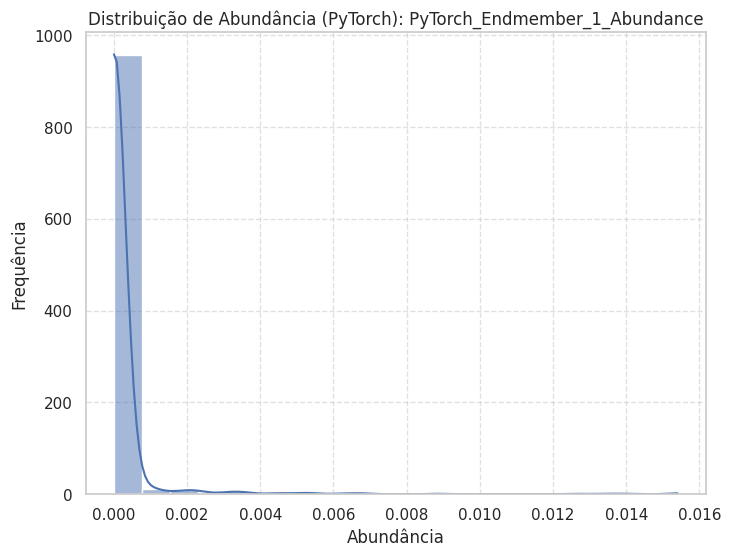

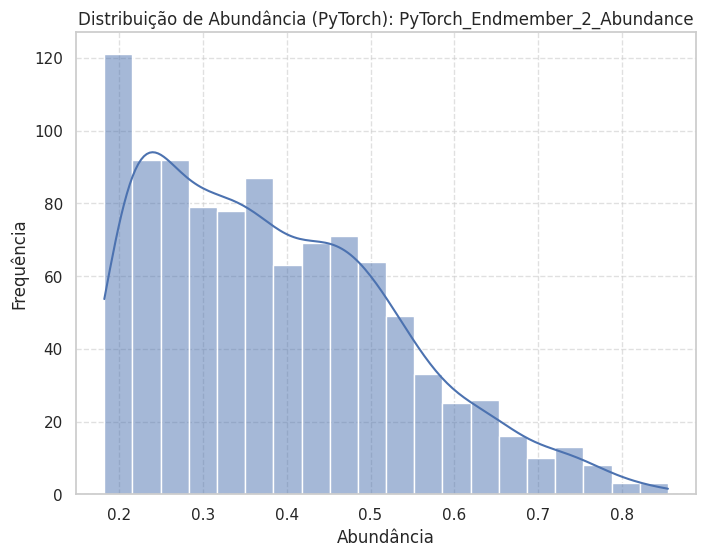

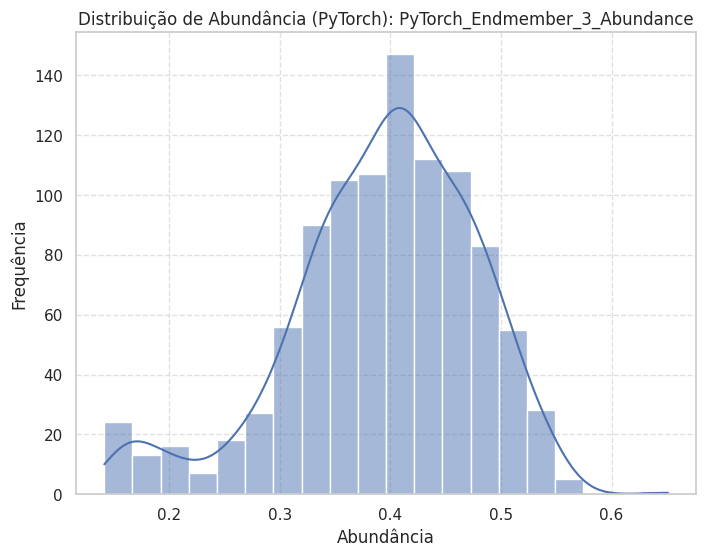

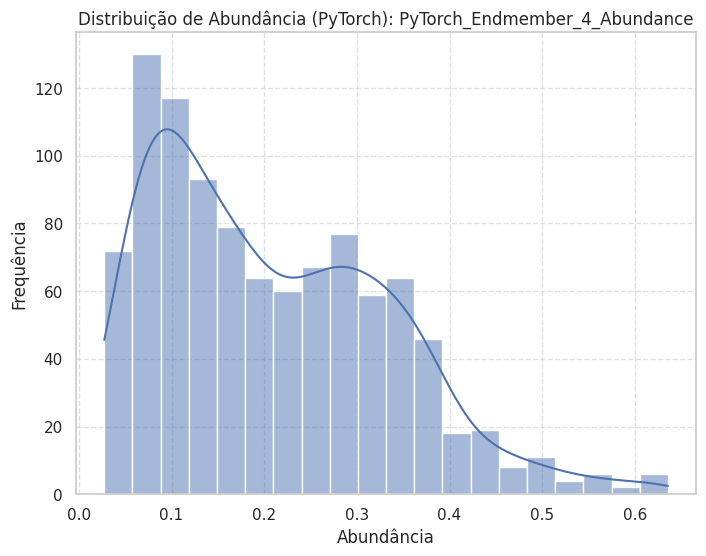

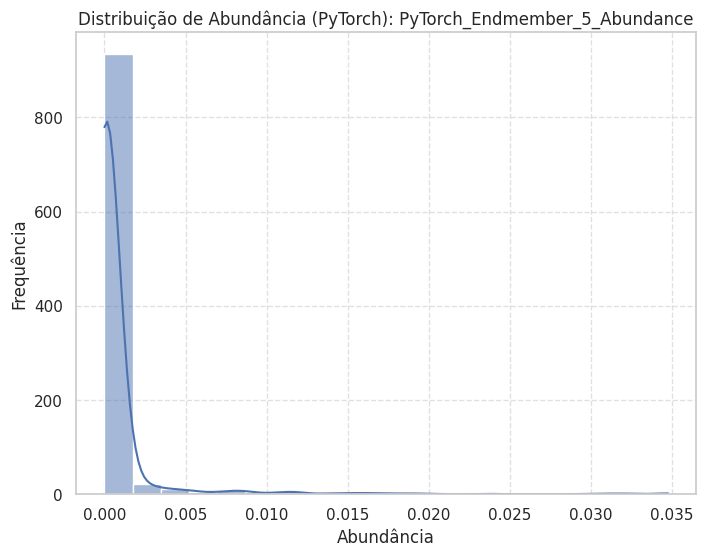


Estatísticas descritivas das abundâncias estimadas pelo PyTorch:


PyTorch_Endmember_1_Abundance  PyTorch_Endmember_2_Abundance  \
count                   1.002000e+03                    1002.000000   
mean                    2.054209e-04                       0.386823   
std                     1.198350e-03                       0.145180   
min                     2.383501e-11                       0.182372   
25%                     6.330520e-08                       0.261981   
50%                     1.842929e-06                       0.365865   
75%                     2.130908e-05                       0.483857   
max                     1.540403e-02                       0.854902   

       PyTorch_Endmember_3_Abundance  PyTorch_Endmember_4_Abundance  \
count                    1002.000000                    1002.000000   
mean                        0.393312                       0.208121   
std                         0.084458                       0.126150   
min                         0.141286                       0.027491   
25%                         0.344961                       0.100900   
50%                         0.402363                       0.181972   
75%                         0.454274                       0.297454   
max                         0.650960                       0.635686   

       PyTorch_Endmember_5_Abundance  
count                   1.002000e+03  
mean                    7.655707e-04  
std                     3.114933e-03  
min                     1.369379e-08  
25%                     4.421248e-06  
50%                     5.253115e-05  
75%                     3.127865e-04  
max                     3.474509e-02


Visualização das distribuições de abundância do PyTorch concluída.
Analise os histogramas para entender como a abundância de cada endmember se distribui nas amostras.

--- Fim da Visualização das Distribuições de Abundância dos Endmembers do PyTorch ---


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures
import pandas as pd # Ensure pandas is imported

print("--- Iniciando Visualização das Distribuições de Abundância dos Endmembers do PyTorch ---")

# Check if the PyTorch estimated abundances DataFrame exists and is not empty
if 'pytorch_estimated_abundances_df' in locals() and not pytorch_estimated_abundances_df.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    print(f"DataFrame de abundâncias PyTorch shape: {pytorch_estimated_abundances_df.shape}")
    print("\nVisualizando distribuições de abundância para cada endmember do PyTorch:")

    # Plot histograms for each endmember's abundance in separate figures
    for i, col in enumerate(pytorch_estimated_abundances_df.columns):
        plt.figure(figsize=(8, 6)) # Standardized figure size for individual plots
        sns.histplot(pytorch_estimated_abundances_df[col], bins=20, kde=True) # Plot histogram
        plt.title(f'Distribuição de Abundância (PyTorch): {col}')
        plt.xlabel('Abundância')
        plt.ylabel('Frequência')
        plt.grid(True, linestyle='--', alpha=0.6)

        # Save each individual plot
        plt.savefig(os.path.join(output_folder, f"{col}_pytorch_distribution.png"))
        plt.show()

    # Optional: Display summary statistics of abundances
    print("\nEstatísticas descritivas das abundâncias estimadas pelo PyTorch:")
    display(pytorch_estimated_abundances_df.describe())

    print("\nVisualização das distribuições de abundância do PyTorch concluída.")
    print("Analise os histogramas para entender como a abundância de cada endmember se distribui nas amostras.")


else:
    print("ERRO: O DataFrame 'pytorch_estimated_abundances_df' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula que avalia o modelo PyTorch treinado para obter as abundâncias.")

print("\n--- Fim da Visualização das Distribuições de Abundância dos Endmembers do PyTorch ---")

## Comparação das Estimativas de Abundância: NMF vs PyTorch

Este passo compara as estimativas de abundância obtidas pelo algoritmo NMF e pelo modelo PyTorch treinado. Analisaremos a correlação entre as abundâncias de endmembers correspondentes e visualizaremos a relação entre elas.

--- Iniciando Comparação das Estimativas de Abundância (NMF vs PyTorch) ---
Comparando 1002 amostras (índices correspondentes).

--- Análise de Correlação entre Abundâncias Estimadas ---

Matriz de Correlação (NMF Endmember vs PyTorch Endmember):


PyTorch_Endmember_1  PyTorch_Endmember_2  \
NMF_Endmember_1             -0.25703                  NaN   
NMF_Endmember_2                  NaN             0.982651   
NMF_Endmember_3                  NaN                  NaN   
NMF_Endmember_4                  NaN                  NaN   
NMF_Endmember_5                  NaN                  NaN   

                 PyTorch_Endmember_3  PyTorch_Endmember_4  PyTorch_Endmember_5  
NMF_Endmember_1                  NaN                  NaN                  NaN  
NMF_Endmember_2                  NaN                  NaN                  NaN  
NMF_Endmember_3             0.754768                  NaN                  NaN  
NMF_Endmember_4                  NaN            -0.562684                  NaN  
NMF_Endmember_5                  NaN                  NaN              0.04644


Valores de correlação próximos a 1 indicam forte concordância entre as estimativas de abundância dos endmembers correspondentes.

--- Visualização: Scatter Plots de Abundâncias (NMF vs PyTorch) ---


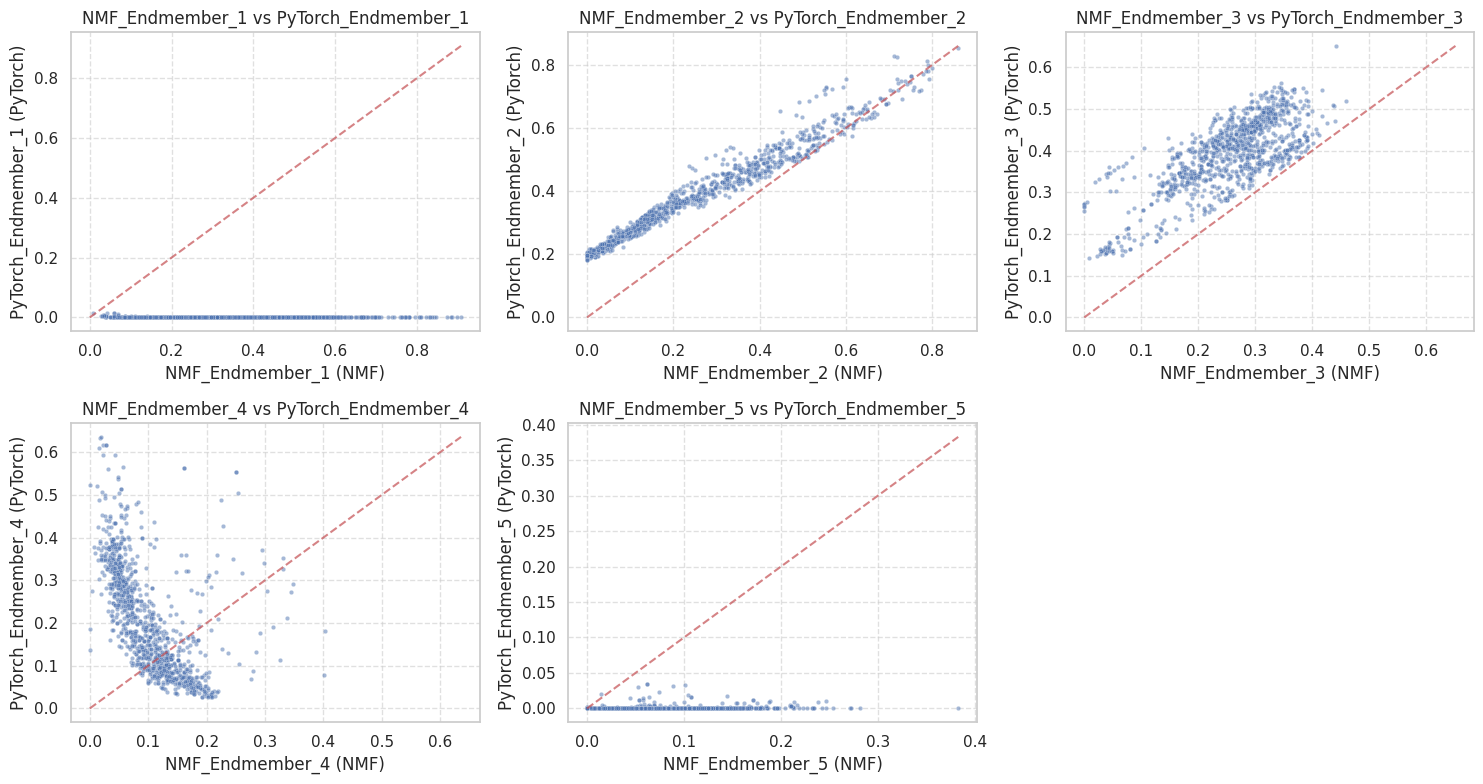


Visualização dos scatter plots concluída.
Pontos próximos à linha diagonal indicam boa concordância nas estimativas de abundância.

--- Fim da Comparação das Estimativas de Abundância ---


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures

print("--- Iniciando Comparação das Estimativas de Abundância (NMF vs PyTorch) ---")

# Check if the abundance DataFrames from NMF and PyTorch are available and not empty
if 'abundance_maps_df' in locals() and not abundance_maps_df.empty and \
   'pytorch_estimated_abundances_df' in locals() and not pytorch_estimated_abundances_df.empty:

    # Ensure the indices of the two DataFrames match (they should, as both are based on cleaned data)
    if not abundance_maps_df.index.equals(pytorch_estimated_abundances_df.index):
        print("AVISO: Os índices dos DataFrames de abundância NMF e PyTorch não correspondem. A comparação pode não ser válida.")
        # Attempt to align based on index if possible, or raise error
        common_indices = abundance_maps_df.index.intersection(pytorch_estimated_abundances_df.index)
        if len(common_indices) == 0:
            print("ERRO: Não há índices comuns entre os DataFrames de abundância NMF e PyTorch. Não é possível comparar.")
            comparison_data = None
        else:
            abundance_nmf_aligned = abundance_maps_df.loc[common_indices]
            abundance_pytorch_aligned = pytorch_estimated_abundances_df.loc[common_indices]
            # Ensure column names are distinct before joining
            abundance_nmf_aligned.columns = [f'{col}_NMF' for col in abundance_nmf_aligned.columns]
            abundance_pytorch_aligned.columns = [f'{col}_PyTorch' for col in abundance_pytorch_aligned.columns]
            comparison_data = abundance_nmf_aligned.join(abundance_pytorch_aligned, how='inner')
            print(f"Comparando {len(common_indices)} amostras com índices comuns.")
    else:
        # Indices match, create a combined DataFrame with distinct column names
        # Need to ensure original column names are preserved before adding suffixes
        abundance_nmf_renamed = abundance_maps_df.copy()
        abundance_pytorch_renamed = pytorch_estimated_abundances_df.copy()

        abundance_nmf_renamed.columns = [f'{col}_NMF' for col in abundance_nmf_renamed.columns]
        abundance_pytorch_renamed.columns = [f'{col}_PyTorch' for col in abundance_pytorch_renamed.columns]

        comparison_data = abundance_nmf_renamed.join(abundance_pytorch_renamed, how='inner')

        print(f"Comparando {len(comparison_data)} amostras (índices correspondentes).")


    if comparison_data is not None and not comparison_data.empty:
        # Identify the abundance columns for each method based on the new suffixes
        nmf_cols = [col for col in comparison_data.columns if col.endswith('_NMF')]
        pytorch_cols = [col for col in comparison_data.columns if col.endswith('_PyTorch')]

        # Ensure the number of endmembers is the same for both methods
        if len(nmf_cols) != len(pytorch_cols):
            print("ALERTA: O número de endmembers NMF e PyTorch não corresponde. Não é possível comparar endmembers correspondentes diretamente.")
            # Proceed with comparison of available columns, but note the mismatch.
            min_endmembers = min(len(nmf_cols), len(pytorch_cols))
            nmf_cols = nmf_cols[:min_endmembers]
            pytorch_cols = pytorch_cols[:min_endmembers]
            print(f"Comparando os primeiros {min_endmembers} endmembers de cada método.")


        if len(nmf_cols) > 0:
            # --- Análise de Correlação ---
            print("\n--- Análise de Correlação entre Abundâncias Estimadas ---")
            # Calculate correlation between corresponding endmember abundances
            # Assuming Endmember 1 NMF corresponds to Endmember 1 PyTorch based on order
            correlation_matrix_data = {}
            for i in range(len(nmf_cols)):
                 if i < len(pytorch_cols):
                      nmf_col_name = nmf_cols[i]
                      pytorch_col_name = pytorch_cols[i]
                      correlation = comparison_data[nmf_col_name].corr(comparison_data[pytorch_col_name])
                      # Use cleaner names for the correlation matrix index/columns
                      nmf_endmember_name = nmf_col_name.replace('_Abundance_NMF', '')
                      pytorch_endmember_name = pytorch_col_name.replace('_Abundance_PyTorch', '')
                      correlation_matrix_data[nmf_endmember_name] = {pytorch_endmember_name: correlation}

            correlation_matrix = pd.DataFrame.from_dict(correlation_matrix_data, orient='index')


            print("\nMatriz de Correlação (NMF Endmember vs PyTorch Endmember):")
            display(correlation_matrix)
            print("\nValores de correlação próximos a 1 indicam forte concordância entre as estimativas de abundância dos endmembers correspondentes.")


            # --- Visualização (Scatter Plots) ---
            print("\n--- Visualização: Scatter Plots de Abundâncias (NMF vs PyTorch) ---")

            # Ensure the output folder exists (reuse the one created before)
            output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
            os.makedirs(output_folder, exist_ok=True)

            # Plot scatter plots for corresponding endmember abundances
            n_endmembers_to_plot = min(len(nmf_cols), len(pytorch_cols))
            n_cols_plot = 3 # Number of columns for subplots
            n_rows_plot = (n_endmembers_to_plot + n_cols_plot - 1) // n_cols_plot # Calculate number of rows needed

            plt.figure(figsize=(n_cols_plot * 5, n_rows_plot * 4)) # Adjust figure size

            for i in range(n_endmembers_to_plot):
                 plt.subplot(n_rows_plot, n_cols_plot, i + 1) # Create subplot
                 sns.scatterplot(
                     data=comparison_data,
                     x=nmf_cols[i],
                     y=pytorch_cols[i],
                     alpha=0.5,
                     s=10 # Adjust point size
                 )
                 # Use cleaner names for plot titles and labels
                 nmf_endmember_name = nmf_cols[i].replace('_Abundance_NMF', '')
                 pytorch_endmember_name = pytorch_cols[i].replace('_Abundance_PyTorch', '')
                 plt.title(f'{nmf_endmember_name} vs {pytorch_endmember_name}')
                 plt.xlabel(f'{nmf_endmember_name} (NMF)')
                 plt.ylabel(f'{pytorch_endmember_name} (PyTorch)')
                 plt.grid(True, linestyle='--', alpha=0.6)
                 # Add a diagonal line for reference (perfect agreement)
                 max_val = max(comparison_data[nmf_cols[i]].max(), comparison_data[pytorch_cols[i]].max())
                 plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.7) # Red dashed line

            plt.tight_layout()
            # Save the scatter plots
            plt.savefig(os.path.join(output_folder, f"nmf_pytorch_abundance_scatterplots.png"))
            plt.show()

            print("\nVisualização dos scatter plots concluída.")
            print("Pontos próximos à linha diagonal indicam boa concordância nas estimativas de abundância.")


        else:
             print("ALERTA: Não há endmembers para comparar após verificar a correspondência e o número.")


    else:
         print("ERRO: O DataFrame combinado para comparação está vazio. Verifique os DataFrames de abundância originais e seus índices.")


elif 'abundance_maps_df' not in locals() or abundance_maps_df.empty:
    print("ERRO: O DataFrame de abundância NMF ('abundance_maps_df') não foi encontrado ou está vazio.")
    print("Por favor, execute a célula que realiza a análise NMF.")
elif 'pytorch_estimated_abundances_df' not in locals() or pytorch_estimated_abundances_df.empty:
    print("ERRO: O DataFrame de abundância PyTorch ('pytorch_estimated_abundances_df') não foi encontrado ou está vazio.")
    print("Por favor, execute a célula que avalia o modelo PyTorch treinado.")


print("\n--- Fim da Comparação das Estimativas de Abundância ---")

## Visualização Espacial das Abundâncias dos Endmembers do PyTorch

Este passo visualiza a distribuição espacial das amostras com base nas abundâncias estimadas dos endmembers pelo modelo PyTorch treinado. Combinaremos as abundâncias com as coordenadas espaciais e plotaremos os pontos em um mapa interativo, coloridos pelo endmember com a maior abundância.

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import os for saving figures
import folium # Import folium for interactive mapping
from folium.plugins import MarkerCluster # Import MarkerCluster for handling large numbers of points
import pandas as pd # Ensure pandas is imported

print("--- Iniciando Visualização Espacial das Abundâncias dos Endmembers do PyTorch em um Mapa ---")

# Check if the PyTorch estimated abundances and spatial coordinates DataFrames exist and are not empty
if 'pytorch_estimated_abundances_df' in locals() and not pytorch_estimated_abundances_df.empty and \
   'spatial_coordinates_df' in locals() and not spatial_coordinates_df.empty:

    # Combine the PyTorch abundances DataFrame with the spatial coordinates DataFrame
    # Using join on index
    pytorch_abundance_with_geo = pytorch_estimated_abundances_df.join(spatial_coordinates_df, how='inner')


    if pytorch_abundance_with_geo.empty:
         print("ALERTA: Não foi possível vincular as estimativas de abundância do PyTorch com as coordenadas espaciais extraídas. Verifique os índices dos DataFrames.")
    else:
        print(f"\nDataFrame combinado de abundâncias PyTorch e coordenadas espaciais shape: {pytorch_abundance_with_geo.shape}")
        print("\nVisualização das primeiras linhas do DataFrame combinado:")
        display(pytorch_abundance_with_geo.head())

        # Identify the abundance columns (excluding longitude and latitude)
        pytorch_abundance_cols = [col for col in pytorch_abundance_with_geo.columns if col.startswith('PyTorch_Endmember_') and col.endswith('_Abundance')]

        if not pytorch_abundance_cols:
            print("ALERTA: Nenhuma coluna de abundância de endmember PyTorch encontrada no DataFrame combinado.")
        else:
            # Find the endmember with the maximum abundance for each sample
            pytorch_abundance_with_geo['Dominant_Endmember_PyTorch'] = pytorch_abundance_with_geo[pytorch_abundance_cols].idxmax(axis=1)
            # Clean up the dominant endmember name for plotting legend
            pytorch_abundance_with_geo['Dominant_Endmember_PyTorch'] = pytorch_abundance_with_geo['Dominant_Endmember_PyTorch'].str.replace('_Abundance', '')

            print("\nCriando mapa interativo com a distribuição espacial do endmember dominante (PyTorch):")

            # Calculate the mean coordinates to center the map
            mean_lat_pytorch = pytorch_abundance_with_geo['latitude'].mean()
            mean_lon_pytorch = pytorch_abundance_with_geo['longitude'].mean()

            # Create a base map centered at the mean coordinates
            m_pytorch = folium.Map(location=[mean_lat_pytorch, mean_lon_pytorch], zoom_start=10)

            # Define a color mapping for the dominant endmembers (using the same palette as NMF for potential comparison)
            # Get unique dominant endmembers from PyTorch results
            unique_dominant_endmembers_pytorch = pytorch_abundance_with_geo['Dominant_Endmember_PyTorch'].unique()
            # Use a color palette (e.g., tab10) - ensure consistent colors if comparing NMF and PyTorch visually
            colors = plt.cm.get_cmap('tab10', len(unique_dominant_endmembers_pytorch))
            color_map_pytorch = {endmember: matplotlib.colors.rgb2hex(colors(i)[:3]) for i, endmember in enumerate(unique_dominant_endmembers_pytorch)}


            # Add points to the map. Use MarkerCluster if there are too many points for performance.
            if len(pytorch_abundance_with_geo) > 1000: # Threshold for using MarkerCluster
                marker_cluster_pytorch = MarkerCluster().add_to(m_pytorch)
                for idx, row in pytorch_abundance_with_geo.iterrows():
                    folium.CircleMarker(
                        location=[row['latitude'], row['longitude']],
                        radius=5, # Adjust size as needed
                        color=color_map_pytorch.get(row['Dominant_Endmember_PyTorch'], '#808080'), # Default to grey
                        fill=True,
                        fill_color=color_map_pytorch.get(row['Dominant_Endmember_PyTorch'], '#808080'),
                        fill_opacity=0.6,
                        tooltip=f"Endmember (PyTorch): {row['Dominant_Endmember_PyTorch']}<br>Lat: {row['latitude']:.4f}<br>Lon: {row['longitude']:.4f}"
                    ).add_to(marker_cluster_pytorch)
                print("Usando MarkerCluster para agrupar pontos no mapa (PyTorch).")
            else:
                for idx, row in pytorch_abundance_with_geo.iterrows():
                    folium.CircleMarker(
                        location=[row['latitude'], row['longitude']],
                        radius=5, # Adjust size as needed
                        color=color_map_pytorch.get(row['Dominant_Endmember_PyTorch'], '#808080'), # Default to grey
                        fill=True,
                        fill_color=color_map_pytorch.get(row['Dominant_Endmember_PyTorch'], '#808080'),
                        fill_opacity=0.6,
                        tooltip=f"Endmember (PyTorch): {row['Dominant_Endmember_PyTorch']}<br>Lat: {row['latitude']:.4f}<br>Lon: {row['longitude']:.4f}"
                    ).add_to(m_pytorch)
                print("Adicionando pontos individuais ao mapa (PyTorch).")


            # Display the map
            display(m_pytorch)


            print("\nVisualização espacial das abundâncias dos endmembers do PyTorch em mapa concluída.")
            print("O mapa mostra a localização de cada amostra, colorida pelo endmember com a maior abundância estimado pelo modelo PyTorch.")


else:
    if 'pytorch_estimated_abundances_df' not in locals() or pytorch_estimated_abundances_df.empty:
        print("ERRO: O DataFrame de abundância PyTorch ('pytorch_estimated_abundances_df') não foi encontrado ou está vazio.")
        print("Por favor, execute a célula que avalia o modelo PyTorch treinado para obter as abundâncias.")
    elif 'spatial_coordinates_df' not in locals() or spatial_coordinates_df.empty:
         print("ERRO: O DataFrame de coordenadas espaciais ('spatial_coordinates_df') não foi encontrado ou está vazio.")
         print("Por favor, execute a célula que prepara os dados espaciais.")


print("\n--- Fim da Visualização Espacial das Abundâncias dos Endmembers do PyTorch em um Mapa ---")

--- Iniciando Visualização Espacial das Abundâncias dos Endmembers do PyTorch em um Mapa ---

DataFrame combinado de abundâncias PyTorch e coordenadas espaciais shape: (1002, 7)

Visualização das primeiras linhas do DataFrame combinado:


PyTorch_Endmember_1_Abundance  PyTorch_Endmember_2_Abundance  \
0                   1.887928e-06                       0.381861   
1                   1.370969e-07                       0.432039   
2                   2.872670e-06                       0.323916   
3                   6.033479e-06                       0.265912   
4                   5.762707e-06                       0.252922   

   PyTorch_Endmember_3_Abundance  PyTorch_Endmember_4_Abundance  \
0                       0.409935                       0.178071   
1                       0.451669                       0.119120   
2                       0.430350                       0.208143   
3                       0.433984                       0.254559   
4                       0.437056                       0.260825   

   PyTorch_Endmember_5_Abundance  longitude  latitude  
0                       0.000053 -38.103570 -4.246965  
1                       0.000008 -38.105726 -4.251277  
2                       0.000073 -38.111116 -4.212470  
3                       0.000125 -38.106804 -4.211392  
4                       0.000121 -38.106265 -4.210314


Criando mapa interativo com a distribuição espacial do endmember dominante (PyTorch):
Usando MarkerCluster para agrupar pontos no mapa (PyTorch).


/tmp/ipython-input-2292100856.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_dominant_endmembers_pytorch))



Visualização espacial das abundâncias dos endmembers do PyTorch em mapa concluída.
O mapa mostra a localização de cada amostra, colorida pelo endmember com a maior abundância estimado pelo modelo PyTorch.

--- Fim da Visualização Espacial das Abundâncias dos Endmembers do PyTorch em um Mapa ---


## Avaliação do Modelo PyTorch Treinado

Este passo avalia o desempenho do modelo PyTorch treinado usando o conjunto de dados de treinamento. A avaliação inclui obter as estimativas de abundância do modelo e calcular o erro de reconstrução.

In [115]:
import torch
import torch.nn.functional as F # Import functional API for MSE loss
import numpy as np # Ensure numpy is imported
import pandas as pd # Ensure pandas is imported

print("--- Avaliando o Modelo PyTorch Treinado ---")

# Check if the trained model, spectral data tensor, and M_matrix are available
if 'model_pytorch' in locals() and model_pytorch is not None and \
   'spectral_data_tensor' in locals() and spectral_data_tensor is not None and spectral_data_tensor.shape[0] > 0 and \
   'M_matrix_pytorch' in locals() and M_matrix_pytorch is not None:

    # Move model and data to the same device used for training
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_pytorch.to(device)
    spectral_data_tensor = spectral_data_tensor.to(device)
    M_matrix_pytorch = M_matrix_pytorch.to(device)
    print(f"Usando dispositivo para avaliação: {device}")


    # Set the model to evaluation mode
    # This disables dropout layers and batch normalization for consistent evaluation
    model_pytorch.eval()

    # Disable gradient calculation during evaluation
    with torch.no_grad():
        # Get the estimated abundances from the trained model
        estimated_abundances_pytorch = model_pytorch(spectral_data_tensor) # Pass the entire dataset

        # Ensure abundances are on CPU and converted to NumPy if needed for further analysis/plotting
        estimated_abundances_np_pytorch = estimated_abundances_pytorch.cpu().numpy()

        print(f"\nShape das abundâncias estimadas pelo modelo PyTorch: {estimated_abundances_np_pytorch.shape}")

        # Use the estimated abundances and M_matrix to reconstruct the spectra
        # Reconstructed = Abundances @ M.T
        # estimated_abundances_pytorch shape: (n_samples, n_endmembers)
        # M_matrix_pytorch shape: (n_endmembers, n_bands)
        # Multiplicação: (n_samples, n_endmembers) @ (n_endmembers, n_bands) -> (n_samples, n_bands)
        reconstructed_spectra_pytorch = torch.matmul(estimated_abundances_pytorch, M_matrix_pytorch)

        # Calculate the reconstruction error (e.g., Mean Squared Error or RMSE)
        # Original spectra (target for reconstruction) is the spectral_data_tensor
        reconstruction_mse = F.mse_loss(reconstructed_spectra_pytorch, spectral_data_tensor)
        reconstruction_rmse = torch.sqrt(reconstruction_mse)

        print(f"\nErro de Reconstrução (MSE) do modelo PyTorch: {reconstruction_mse.item():.6f}")
        print(f"Erro de Reconstrução (RMSE) do modelo PyTorch: {reconstruction_rmse.item():.6f}")


        # Optional: Analyze the estimated abundances
        # Check if abundances sum close to 1 (although penalized in loss)
        abundance_sums = torch.sum(estimated_abundances_pytorch, dim=1)
        average_abundance_sum = torch.mean(abundance_sums)
        print(f"\nMédia da soma das abundâncias estimadas por pixel: {average_abundance_sum.item():.4f}")

        # Convert estimated abundances to DataFrame for easier handling and linking to original data
        # Use the index of the cleaned data that the model was trained on.
        # The index from abundance_maps_df (from NMF on cleaned data) is correct.
        if 'abundance_maps_df' in locals() and not abundance_maps_df.empty:
            pytorch_estimated_abundances_df = pd.DataFrame(
                estimated_abundances_np_pytorch,
                index=abundance_maps_df.index, # Use the index from abundance_maps_df (cleaned data indices)
                columns=[f'PyTorch_Endmember_{i+1}_Abundance' for i in range(estimated_abundances_np_pytorch.shape[1])]
            )
            print("\nEstimativas de abundância do PyTorch armazenadas em 'pytorch_estimated_abundances_df'.")
            display(pytorch_estimated_abundances_df.head())

        else:
             print("ALERTA: DataFrame 'abundance_maps_df' não encontrado para usar os índices corretos. Abundâncias armazenadas em NumPy array.")
             # If abundance_maps_df is not available, store with a simple range index
             pytorch_estimated_abundances_df = pd.DataFrame(
                estimated_abundances_np_pytorch,
                columns=[f'PyTorch_Endmember_{i+1}_Abundance' for i in range(estimated_abundances_np_pytorch.shape[1])]
             )
             print("Estimativas de abundância do PyTorch armazenadas em 'pytorch_estimated_abundances_df' com índice padrão.")


    print("\nAvaliação do modelo PyTorch concluída.")
    print("O RMSE de reconstrução indica a qualidade do ajuste do modelo aos dados.")


else:
    if 'model_pytorch' not in locals() or model_pytorch is None:
        print("ERRO: Modelo PyTorch treinado 'model_pytorch' não encontrado. Por favor, treine o modelo antes de avaliar.")
    elif 'spectral_data_tensor' not in locals() or spectral_data_tensor is None or spectral_data_tensor.shape[0] == 0:
        print("ERRO: Tensor de dados espectrais 'spectral_data_tensor' não encontrado ou vazio. Por favor, prepare os dados antes de avaliar.")
    elif 'M_matrix_pytorch' not in locals() or M_matrix_pytorch is None:
        print("ERRO: Matriz de endmembers 'M_matrix_pytorch' não encontrada. Por favor, defina a matriz M.")


print("\n--- Fim da Avaliação do Modelo PyTorch Treinado ---")

--- Avaliando o Modelo PyTorch Treinado ---
Usando dispositivo para avaliação: cpu

Shape das abundâncias estimadas pelo modelo PyTorch: (1002, 5)

Erro de Reconstrução (MSE) do modelo PyTorch: 0.003644
Erro de Reconstrução (RMSE) do modelo PyTorch: 0.060363

Média da soma das abundâncias estimadas por pixel: 0.9892

Estimativas de abundância do PyTorch armazenadas em 'pytorch_estimated_abundances_df'.


PyTorch_Endmember_1_Abundance  PyTorch_Endmember_2_Abundance  \
0                   1.887928e-06                       0.381861   
1                   1.370969e-07                       0.432039   
2                   2.872670e-06                       0.323916   
3                   6.033479e-06                       0.265912   
4                   5.762707e-06                       0.252922   

   PyTorch_Endmember_3_Abundance  PyTorch_Endmember_4_Abundance  \
0                       0.409935                       0.178071   
1                       0.451669                       0.119120   
2                       0.430350                       0.208143   
3                       0.433984                       0.254559   
4                       0.437056                       0.260825   

   PyTorch_Endmember_5_Abundance  
0                       0.000053  
1                       0.000008  
2                       0.000073  
3                       0.000125  
4                       0.000121


Avaliação do modelo PyTorch concluída.
O RMSE de reconstrução indica a qualidade do ajuste do modelo aos dados.

--- Fim da Avaliação do Modelo PyTorch Treinado ---


## Implementação do Loop de Treinamento em PyTorch

Este código implementa o loop de treinamento para a rede neural de desmistura em PyTorch. Ele itera sobre os dados em lotes fornecidos pelo `DataLoader`, realiza o forward pass, calcula a perda usando a função customizada, executa o backward pass e atualiza os pesos do modelo.

In [112]:
import torch
import torch.nn as nn # Ensure nn is imported if using nn.Module
import torch.optim as optim # Import optim for optimizers
import numpy as np # Ensure numpy is imported for potential data handling

print("--- Iniciando Loop de Treinamento em PyTorch ---")

# Check if the model, dataloader, and loss function are available
if 'model_pytorch' in locals() and model_pytorch is not None and \
   'spectral_dataloader' in locals() and spectral_dataloader is not None and \
   'custom_unmixing_loss_pytorch' in locals():

    # Define treinamento parameters
    num_epochs = 100 # Number of training epochs (adjust as needed)
    learning_rate = 0.001 # Learning rate for the optimizer (adjust as needed)

    # Initialize the optimizer
    # Using Adam optimizer
    optimizer = optim.Adam(model_pytorch.parameters(), lr=learning_rate)

    # Optional: Learning rate scheduler (decreases learning rate during training)
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1) # Example scheduler


    print(f"\nModelo PyTorch: {model_pytorch}")
    print(f"Otimizador: {optimizer}")
    print(f"Número de épocas: {num_epochs}")
    print(f"Taxa de aprendizado inicial: {learning_rate}")


    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_pytorch.to(device)
    M_matrix_pytorch = M_matrix_pytorch.to(device) # Move M_matrix to the same device
    print(f"Usando dispositivo: {device}")


    # Store training loss history
    training_loss_history = []

    print("\nIniciando treinamento...")

    try:
        # Training Loop
        for epoch in range(num_epochs):
            model_pytorch.train() # Set the model to training mode
            running_loss = 0.0

            for inputs, targets in spectral_dataloader:
                # Move data to the same device as the model
                inputs, targets = inputs.to(device), targets.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = model_pytorch(inputs) # Outputs are the estimated abundances

                # Calculate loss
                # custom_unmixing_loss_pytorch expects (y_pred, y_true)
                loss = custom_unmixing_loss_pytorch(outputs, targets)

                # Backward pass and optimize
                loss.backward()
                optimizer.step()

                # Accumulate loss for reporting
                running_loss += loss.item() * inputs.size(0) # loss.item() is scalar, multiply by batch size


            # Calculate average loss for the epoch
            epoch_loss = running_loss / len(spectral_dataloader.dataset)
            training_loss_history.append(epoch_loss)

            # Optional: Step the scheduler
            # if scheduler is not None:
            #     scheduler.step()

            # Print loss every few epochs
            if (epoch + 1) % 10 == 0: # Print every 10 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')


        print("\nTreinamento concluído!")
        print("Histórico de perda de treinamento armazenado em 'training_loss_history'.")
        print("\n**Próximos passos:** Avaliar o modelo treinado e usar para prever abundâncias.")


    except Exception as e:
        print(f"\nERRO durante o loop de treinamento: {e}")
        print("Por favor, verifique a compatibilidade de shapes, definições do modelo/loss/optimizer e os dados no dataloader.")

else:
    if 'model_pytorch' not in locals() or model_pytorch is None:
         print("ERRO: Modelo PyTorch 'model_pytorch' não encontrado. Por favor, defina a arquitetura do modelo.")
    elif 'spectral_dataloader' not in locals() or spectral_dataloader is None:
         print("ERRO: DataLoader 'spectral_dataloader' não encontrado. Por favor, defina o Dataset e DataLoader.")
    elif 'custom_unmixing_loss_pytorch' not in locals():
         print("ERRO: Função de perda customizada 'custom_unmixing_loss_pytorch' não encontrada. Por favor, defina a função de perda.")


print("\n--- Fim do Loop de Treinamento em PyTorch ---")

--- Iniciando Loop de Treinamento em PyTorch ---

Modelo PyTorch: UnmixingNet(
  (fc1): Linear(in_features=285, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=5, bias=True)
)
Otimizador: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Número de épocas: 100
Taxa de aprendizado inicial: 0.001
Usando dispositivo: cpu

Iniciando treinamento...
Epoch [10/100], Loss: 0.0144
Epoch [20/100], Loss: 0.0075
Epoch [30/100], Loss: 0.0057
Epoch [40/100], Loss: 0.0050
Epoch [50/100], Loss: 0.0046
Epoch [60/100], Loss: 0.0044
Epoch [70/100], Loss: 0.0043
Epoch [80/100], Loss: 0.0042
Epoch [90/100], Loss: 0.0042
Epoch [100/100], Loss: 0.0042

Treinamento concluído!
Histórico de perda de treinamento armazenado em 't

## Explicação Passo a Passo do Loop de Treinamento em PyTorch

O loop de treinamento em PyTorch geralmente segue uma estrutura padrão, iterando sobre os dados por um número definido de épocas. Dentro de cada época, ele itera sobre os dados em lotes (batches). Aqui estão os passos principais dentro do loop:

1.  **Iteração sobre as Épocas:**
    *   O loop externo itera por um número fixo de "épocas". Uma época completa significa que a rede neural viu e processou todo o conjunto de dados de treinamento uma vez.
    *   `for epoch in range(num_epochs):`

2.  **Iteração sobre os Lotes (Batches):**
    *   Dentro de cada época, o loop interno itera sobre os dados em "lotes" (batches). O `DataLoader` ajuda a dividir o conjunto de dados em lotes e embaralhar os dados para cada época.
    *   Processar os dados em lotes é mais eficiente computacionalmente do que processar um dado por vez e ajuda na convergência do treinamento.
    *   `for inputs, targets in dataloader:`

3.  **Forward Pass:**
    *   Nesta etapa, os dados de entrada de um lote (`inputs`) são passados pela rede neural (o modelo).
    *   A rede realiza todas as suas operações (multiplicações de matrizes, ativações, etc.) para produzir uma saída (`outputs`). No nosso caso de desmistura, a saída seriam as abundâncias estimadas.
    *   `outputs = model(inputs)`

4.  **Cálculo da Função de Perda (Loss Calculation):**
    *   A função de perda é calculada usando a saída da rede (`outputs`) e os valores alvo esperados para aquele lote (`targets`). No nosso caso de desmistura com a função de perda customizada, `targets` seriam os espectros originais (`y_true`), e a função de perda usaria `outputs` (abundâncias) e `targets` (espectros) para calcular o erro de reconstrução e as penalidades.
    *   `loss = criterion(outputs, targets)` (onde `criterion` é a sua função de perda customizada)

5.  **Backward Pass (Cálculo dos Gradientes):**
    *   Esta é a etapa crucial onde o PyTorch calcula os gradientes da função de perda em relação a *todos* os parâmetros treináveis do modelo (pesos e vieses das camadas). Isso é feito usando o algoritmo de backpropagation.
    *   Os gradientes indicam a direção e a magnitude pela qual cada parâmetro deve ser ajustado para diminuir a perda.
    *   `loss.backward()`

6.  **Optimizer Step (Atualização dos Pesos):**
    *   O otimizador (como Adam ou SGD) usa os gradientes calculados no passo anterior para atualizar os parâmetros do modelo. Ele ajusta os pesos e vieses em uma pequena quantidade na direção que minimiza a perda, controlada pela taxa de aprendizado do otimizador.
    *   `optimizer.step()`

7.  **Zeroing Gradients:**
    *   Antes de calcular os gradientes para o *próximo* lote, é essencial zerar os gradientes acumulados do lote anterior. Os gradientes em PyTorch são acumulados por padrão para permitir coisas como treinamento com gradientes acumulados, mas para o treinamento padrão de lote a lote, eles devem ser zerados em cada iteração.
    *   `optimizer.zero_grad()` ou `model.zero_grad()`

**Resumo do Fluxo Dentro do Loop de Lote:**

`Inputs -> Forward Pass -> Outputs -> Calcular Loss -> Backward Pass (Gradientes) -> Optimizer Step (Atualizar Pesos) -> Zerar Gradientes (para o próximo lote)`

Este ciclo se repete para todos os lotes em uma época, e o processo de época se repete pelo número total de épocas, permitindo que a rede aprenda iterativamente a mapear as entradas para as saídas desejadas minimizando a perda.

## Comparing NMF Endmembers with Base Classes - Step 4: Interpret Comparison

Based on the grouped bar chart showing the average abundance of each NMF endmember per base class, we can interpret the relationships and associations between the identified spectral components (endmembers) and the defined land cover classes.

Looking at the `average_abundance_by_class` DataFrame and the generated bar chart:

*   **NMF_Endmember_1:** This endmember shows high average abundance in several classes, notably `EMIT_RAW_Agricultura_C_`, `EMIT_RAW_Solo_`, `EMIT_RAW_Caatinga_`, `EMIT_RAW_Coqueiral_`, and `EMIT_RAW_Solar_`. This suggests that Endmember 1 represents a spectral component that is significant in agricultural areas (likely related to soil or senescent vegetation), exposed soil, Caatinga vegetation, coconut groves, and potentially areas with high solar reflectance (though the name "Solar" might be a class name, not a physical description). Comparing its spectrum (from cell `TzMH5AA-MEpF`) to these class types would be informative.
*   **NMF_Endmember_2:** This endmember has the highest average abundance in `EMIT_RAW_Edificacoes_`, indicating it's a major component in built-up areas. It also shows notable contributions in `EMIT_RAW_Agricultura_C_`, `EMIT_RAW_Solo_`, `EMIT_RAW_Caatinga_`, and `EMIT_RAW_Coqueiral_`. Its spectrum should be characteristic of urban/building materials, potentially mixed with soil or vegetation signals in other classes.
*   **NMF_Endmember_3:** This endmember shows high average abundance in `EMIT_RAW_Cerrado_Interiores_`, `EMIT_RAW_Vegetacao_`, `EMIT_RAW_Veg_Degradada_`, and `EMIT_RAW_Caju_`. This suggests it's associated with different types of vegetation and degraded vegetation, as well as Cashew crops. Its spectrum is likely characteristic of healthy or stressed vegetation.
*   **NMF_Endmember_4:** This endmember generally has lower average abundances across most classes compared to the first three. It shows slightly higher average abundance in `EMIT_RAW_Solo_` and `EMIT_RAW_Edificacoes_`. It might represent a less dominant component, potentially related to specific soil types or urban materials, or perhaps noise.
*   **NMF_Endmember_5:** This endmember also has generally low average abundances. Its highest average abundance is in `EMIT_RAW_Aquicultura_`, suggesting a potential association with aquaculture areas (possibly related to water bodies or associated infrastructure). Its spectrum would need to be examined to confirm this.

**Overall Insights from the Comparison:**

*   The NMF algorithm seems to have extracted endmembers that are spectrally representative of different land cover types present in the original classes.
*   Endmembers 1, 2, and 3 appear to be the most dominant components in the dataset, contributing significantly to the spectral signatures of multiple classes.
*   Endmembers 4 and 5 seem less dominant overall but might be more specific to certain classes or represent minor spectral variations.
*   The analysis confirms that the NMF endmembers are indeed related to the defined base classes, providing a physical interpretation for these extracted spectral components.
*   Comparing the *spectra* of these endmembers (from cell `TzMH5AA-MEpF`) with known spectral libraries of materials (soil, vegetation types, building materials, water, etc.) would be the next crucial step to definitively identify what each endmember represents.

## Comparing NMF Endmembers with Base Classes - Step 3: Visualize Average Abundances

This step visualizes the average abundance of each NMF endmember for each base class calculated in the previous step (`average_abundance_by_class`). A grouped bar chart is a suitable way to compare the contribution of different endmembers across different classes.

--- Visualizando Abundâncias Médias por Classe Base ---
Criando visualização de abundâncias médias por classe base...


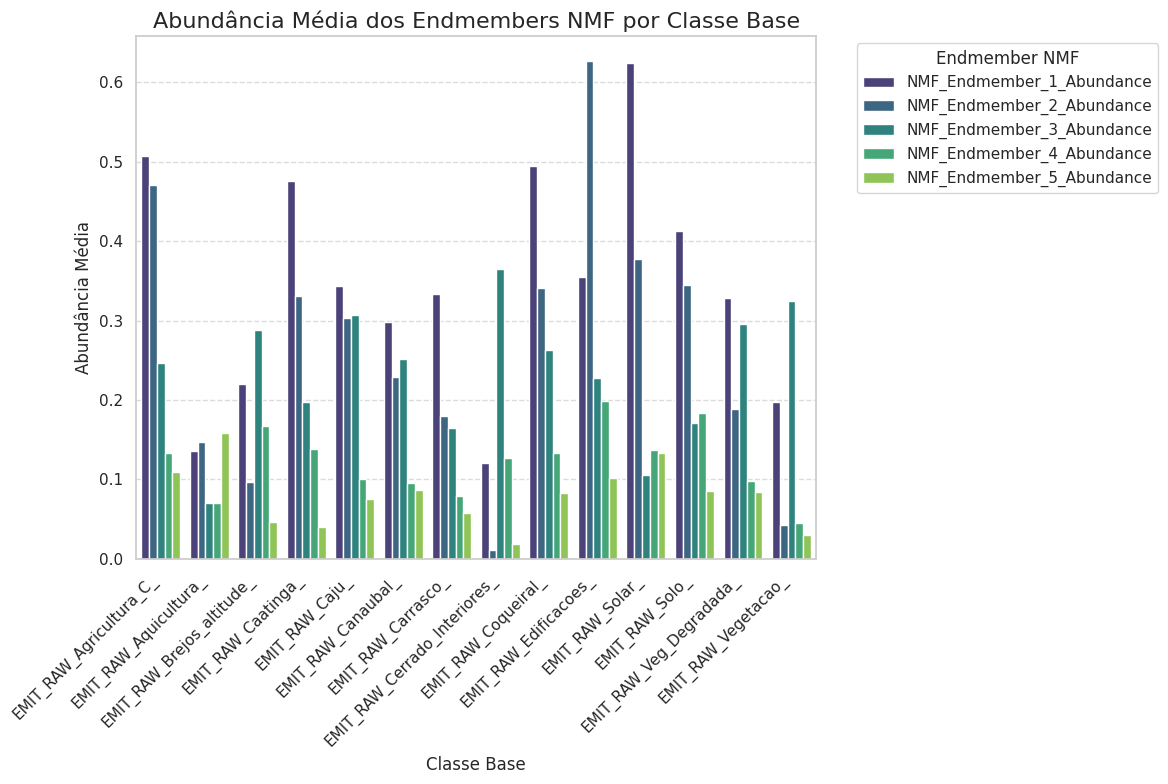


Visualização de abundâncias médias por classe base concluída.
Analise o gráfico para identificar quais endmembers são mais proeminentes em cada classe base.

--- Fim da Visualização das Abundâncias Médias por Classe Base ---


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os # Import os for saving figures

print("--- Visualizando Abundâncias Médias por Classe Base ---")

# Check if the average abundance DataFrame is available and not empty
if 'average_abundance_by_class' in locals() and not average_abundance_by_class.empty:

    # Ensure the output folder exists (reuse the one created before)
    output_folder = os.path.join(path_pasta_csv, "resultados_analise_intra_classe")
    os.makedirs(output_folder, exist_ok=True)

    print("Criando visualização de abundâncias médias por classe base...")

    # Melt the DataFrame for easier plotting with seaborn
    average_abundance_melted = average_abundance_by_class.reset_index().melt(
        id_vars='base_classe',
        var_name='Endmember',
        value_name='Average Abundance'
    )

    # Create the grouped bar chart
    plt.figure(figsize=(14, 8)) # Adjust figure size for readability
    sns.barplot(
        data=average_abundance_melted,
        x='base_classe',
        y='Average Abundance',
        hue='Endmember',
        palette='viridis' # Use a distinct color palette for endmembers
    )
    plt.title('Abundância Média dos Endmembers NMF por Classe Base', fontsize=16)
    plt.xlabel('Classe Base', fontsize=12)
    plt.ylabel('Abundância Média', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Endmember NMF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend
    # Save the plot
    plt.savefig(os.path.join(output_folder, f"average_abundance_by_base_class_barplot.png"))
    plt.show()

    print("\nVisualização de abundâncias médias por classe base concluída.")
    print("Analise o gráfico para identificar quais endmembers são mais proeminentes em cada classe base.")


else:
    print("ERRO: O DataFrame 'average_abundance_by_class' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula anterior para calcular as abundâncias médias por classe base antes de visualizar.")

print("\n--- Fim da Visualização das Abundâncias Médias por Classe Base ---")

## Comparing NMF Endmembers with Base Classes - Step 2: Calculate Average Abundances

This step groups the combined data (`nmf_abundance_base_class_combined`) by 'base_classe' and calculates the mean abundance for each NMF endmember within each group. This will give us the average contribution of each endmember to each base class.

In [94]:
import pandas as pd

print("--- Calculando Abundâncias Médias por Classe Base ---")

# Check if the combined DataFrame is available and not empty
if 'nmf_abundance_base_class_combined' in locals() and not nmf_abundance_base_class_combined.empty:

    # Identify the abundance columns
    abundance_cols = [col for col in nmf_abundance_base_class_combined.columns if col.startswith('NMF_Endmember_') and col.endswith('_Abundance')]

    if not abundance_cols:
        print("ALERTA: Nenhuma coluna de abundância de endmember NMF encontrada no DataFrame combinado para cálculo da média.")
    else:
        # Group by 'base_classe' and calculate the mean for abundance columns
        average_abundance_by_class = nmf_abundance_base_class_combined.groupby('base_classe')[abundance_cols].mean()

        print(f"\nDataFrame de abundâncias médias por classe base shape: {average_abundance_by_class.shape}")
        print("\nVisualização do DataFrame de abundâncias médias por classe base:")
        display(average_abundance_by_class)

        # Store the resulting DataFrame for visualization in the next step
        print("\nCálculo das abundâncias médias por classe base concluído.")


else:
    print("ERRO: O DataFrame 'nmf_abundance_base_class_combined' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula anterior para preparar os dados combinados antes de calcular as abundâncias médias.")

print("\n--- Fim do Cálculo das Abundâncias Médias por Classe Base ---")

--- Calculando Abundâncias Médias por Classe Base ---

DataFrame de abundâncias médias por classe base shape: (14, 5)

Visualização do DataFrame de abundâncias médias por classe base:


NMF_Endmember_1_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.507535   
EMIT_RAW_Aquicultura_                          0.135573   
EMIT_RAW_Brejos_altitude_                      0.219599   
EMIT_RAW_Caatinga_                             0.476021   
EMIT_RAW_Caju_                                 0.343851   
EMIT_RAW_Canaubal_                             0.298085   
EMIT_RAW_Carrasco_                             0.333414   
EMIT_RAW_Cerrado_Interiores_                   0.120329   
EMIT_RAW_Coqueiral_                            0.494118   
EMIT_RAW_Edificacoes_                          0.355135   
EMIT_RAW_Solar_                                0.623589   
EMIT_RAW_Solo_                                 0.412615   
EMIT_RAW_Veg_Degradada_                        0.328042   
EMIT_RAW_Vegetacao_                            0.197193   

                              NMF_Endmember_2_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.470868   
EMIT_RAW_Aquicultura_                          0.147359   
EMIT_RAW_Brejos_altitude_                      0.097094   
EMIT_RAW_Caatinga_                             0.331177   
EMIT_RAW_Caju_                                 0.302761   
EMIT_RAW_Canaubal_                             0.229311   
EMIT_RAW_Carrasco_                             0.179320   
EMIT_RAW_Cerrado_Interiores_                   0.011098   
EMIT_RAW_Coqueiral_                            0.341421   
EMIT_RAW_Edificacoes_                          0.626888   
EMIT_RAW_Solar_                                0.377423   
EMIT_RAW_Solo_                                 0.344280   
EMIT_RAW_Veg_Degradada_                        0.188685   
EMIT_RAW_Vegetacao_                            0.042872   

                              NMF_Endmember_3_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.246494   
EMIT_RAW_Aquicultura_                          0.070864   
EMIT_RAW_Brejos_altitude_                      0.288665   
EMIT_RAW_Caatinga_                             0.197981   
EMIT_RAW_Caju_                                 0.306513   
EMIT_RAW_Canaubal_                             0.251011   
EMIT_RAW_Carrasco_                             0.165213   
EMIT_RAW_Cerrado_Interiores_                   0.365010   
EMIT_RAW_Coqueiral_                            0.263218   
EMIT_RAW_Edificacoes_                          0.227253   
EMIT_RAW_Solar_                                0.105464   
EMIT_RAW_Solo_                                 0.170925   
EMIT_RAW_Veg_Degradada_                        0.295716   
EMIT_RAW_Vegetacao_                            0.324071   

                              NMF_Endmember_4_Abundance  \
base_classe                                               
EMIT_RAW_Agricultura_C_                        0.133074   
EMIT_RAW_Aquicultura_                          0.069913   
EMIT_RAW_Brejos_altitude_                      0.167560   
EMIT_RAW_Caatinga_                             0.137924   
EMIT_RAW_Caju_                                 0.100706   
EMIT_RAW_Canaubal_                             0.095801   
EMIT_RAW_Carrasco_                             0.079380   
EMIT_RAW_Cerrado_Interiores_                   0.126889   
EMIT_RAW_Coqueiral_                            0.133612   
EMIT_RAW_Edificacoes_                          0.198269   
EMIT_RAW_Solar_                                0.136484   
EMIT_RAW_Solo_                                 0.184137   
EMIT_RAW_Veg_Degradada_                        0.097760   
EMIT_RAW_Vegetacao_                            0.044654   

                              NMF_Endmember_5_Abundance  
base_classe                                              
EMIT_RAW_Agricultura_C_                        0.109029  
EMIT_RAW_Aquicultura_                          0.158719  
EMIT_RAW_Brejos_al


Cálculo das abundâncias médias por classe base concluído.

--- Fim do Cálculo das Abundâncias Médias por Classe Base ---


## Comparing NMF Endmembers with Base Classes - Step 1: Prepare Combined Data

This step combines the NMF abundance data (`abundance_maps_df`) with the base class information from the original RAW DataFrame (`biblioteca_espectral_raw_df`). This combined DataFrame will be used to calculate the average abundance of each NMF endmember within each base class.

In [93]:
import pandas as pd

print("--- Preparando Dados Combinados para Comparação Endmembers vs Classes Base ---")

# Check if the necessary DataFrames are available
if 'abundance_maps_df' in locals() and not abundance_maps_df.empty and \
   'biblioteca_espectral_raw_df' in locals() and not biblioteca_espectral_raw_df.empty:

    # Ensure 'base_classe' column exists in biblioteca_espectral_raw_df
    if 'base_classe' not in biblioteca_espectral_raw_df.columns:
         # If not already created (e.g., if skipping earlier steps), create it
         biblioteca_espectral_raw_df['base_classe'] = biblioteca_espectral_raw_df['classe'].str[:-8]
         print("Coluna 'base_classe' criada no DataFrame RAW.")


    # The indices of abundance_maps_df are the original indices from the cleaned data used for NMF.
    # These indices should align with the index of biblioteca_espectral_raw_df.
    # Select the 'base_classe' column from the raw DataFrame for the indices present in abundance_maps_df
    base_class_for_nmf_samples = biblioteca_espectral_raw_df.loc[abundance_maps_df.index, 'base_classe']

    # Combine the abundance maps DataFrame with the base class Series
    # Using join on index
    nmf_abundance_with_base_class = abundance_maps_df.join(base_class_for_nmf_samples, how='inner')


    if nmf_abundance_with_base_class.empty:
         print("ALERTA: Não foi possível vincular os resultados de abundância do NMF com a informação da classe base. Verifique os índices.")
    else:
        print(f"\nDataFrame combinado de abundâncias NMF e classes base shape: {nmf_abundance_with_base_class.shape}")
        print("\nVisualização das primeiras linhas do DataFrame combinado:")
        display(nmf_abundance_with_base_class.head())

        # Store the combined DataFrame for the next step
        nmf_abundance_base_class_combined = nmf_abundance_with_base_class
        print("\nDados combinados preparados para comparação.")


else:
    print("ERRO: Os DataFrames 'abundance_maps_df' e/ou 'biblioteca_espectral_raw_df' não foram encontrados ou estão vazios.")
    print("Por favor, execute as células anteriores para carregar, limpar e realizar a análise NMF antes de comparar com as classes base.")

print("\n--- Fim da Preparação dos Dados Combinados ---")

--- Preparando Dados Combinados para Comparação Endmembers vs Classes Base ---

DataFrame combinado de abundâncias NMF e classes base shape: (1002, 6)

Visualização das primeiras linhas do DataFrame combinado:


NMF_Endmember_1_Abundance  NMF_Endmember_2_Abundance  \
0                   0.326167                   0.259234   
1                   0.366002                   0.375759   
2                   0.293488                   0.173178   
3                   0.189642                   0.116963   
4                   0.176799                   0.099139   

   NMF_Endmember_3_Abundance  NMF_Endmember_4_Abundance  \
0                   0.258365                   0.072044   
1                   0.301182                   0.072674   
2                   0.292504                   0.068622   
3                   0.344308                   0.057178   
4                   0.357256                   0.070591   

   NMF_Endmember_5_Abundance     base_classe  
0                   0.043253  EMIT_RAW_Caju_  
1                   0.059222  EMIT_RAW_Caju_  
2                   0.052956  EMIT_RAW_Caju_  
3                   0.042617  EMIT_RAW_Caju_  
4                   0.047842  EMIT_RAW_Caju_


Dados combinados preparados para comparação.

--- Fim da Preparação dos Dados Combinados ---


## Signal Reconstruction using NMF Endmembers and Abundances

This step reconstructs the original spectral signal for each sample using the identified NMF endmember spectra and their estimated abundances based on the linear mixing model. This allows us to evaluate how well the NMF decomposition represents the original spectral data.

In [92]:
import numpy as np
import pandas as pd

print("--- Iniciando Reconstrução do Sinal Espectral usando Resultados NMF ---")

# Check if NMF endmember spectra and abundance maps are available
if 'endmember_spectra_nmf_df' in locals() and not endmember_spectra_nmf_df.empty and \
   'abundance_maps_df' in locals() and not abundance_maps_df.empty:

    # Ensure the number of endmembers and samples match between endmember spectra and abundance maps
    # The number of columns in abundance_maps_df should match the number of rows in endmember_spectra_nmf_df
    # The number of rows in abundance_maps_df should match the number of samples in the cleaned data used for NMF.
    # Note: abundance_maps_df index corresponds to the cleaned data indices, which are a subset of original indices.
    # We need to link this back to the original spectral data used for unmixing to compare original vs reconstructed.

    # Get the spectral data used for NMF (after outlier removal)
    # The indices of abundance_maps_df are the indices of the cleaned data used for NMF
    original_spectral_data_cleaned = spectral_data_for_unmixing.loc[abundance_maps_df.index]

    # Convert DataFrames to NumPy arrays for matrix multiplication
    endmember_spectra_np = endmember_spectra_nmf_df.values # Shape: (n_endmembers, n_bands)
    abundance_maps_np = abundance_maps_df.values         # Shape: (n_samples_cleaned, n_endmembers)
    original_spectra_np_cleaned = original_spectral_data_cleaned.values # Shape: (n_samples_cleaned, n_bands)


    # Perform the linear reconstruction: Reconstructed = Abundances @ Endmembers.T
    # Abundances shape: (n_samples_cleaned, n_endmembers)
    # Endmembers shape: (n_endmembers, n_bands)
    # Result shape: (n_samples_cleaned, n_bands)
    reconstructed_spectra_np = abundance_maps_np @ endmember_spectra_np

    print(f"\nShape dos espectros reconstruídos: {reconstructed_spectra_np.shape}")
    print(f"Shape dos espectros originais (dados limpos usados para NMF): {original_spectra_np_cleaned.shape}")

    # Convert reconstructed spectra back to a DataFrame, preserving the index of the cleaned data
    reconstructed_spectra_df = pd.DataFrame(reconstructed_spectra_np, index=abundance_maps_df.index, columns=endmember_spectra_nmf_df.columns)

    print("\nVisualização dos primeiros 5 espectros reconstruídos:")
    display(reconstructed_spectra_df.head())

    # Optional: Calculate reconstruction error (Residual = Original - Reconstructed)
    residual_spectra_np = original_spectra_np_cleaned - reconstructed_spectra_np
    residual_spectra_df = pd.DataFrame(residual_spectra_np, index=abundance_maps_df.index, columns=endmember_spectra_nmf_df.columns)

    print("\nVisualização dos primeiros 5 espectros residuais (erro de reconstrução):")
    display(residual_spectra_df.head())

    # Optional: Calculate average reconstruction error (e.g., Root Mean Squared Error - RMSE)
    rmse_per_sample = np.sqrt(np.mean(residual_spectra_np**2, axis=1))
    average_rmse = np.mean(rmse_per_sample)

    print(f"\nMédia do RMSE de reconstrução por amostra: {average_rmse:.4f}")

    # Store the reconstructed spectra and residuals DataFrames
    nmf_reconstructed_spectra = reconstructed_spectra_df
    nmf_residual_spectra = residual_spectra_df


    print("\nReconstrução do sinal espectral concluída.")
    print("Os espectros reconstruídos e residuais estão armazenados em 'nmf_reconstructed_spectra' e 'nmf_residual_spectra'.")
    print("O RMSE médio fornece uma métrica da qualidade da reconstrução.")


elif 'endmember_spectra_nmf_df' not in locals() or endmember_spectra_nmf_df.empty:
     print("ERRO: O DataFrame 'endmember_spectra_nmf_df' não foi encontrado ou está vazio.")
     print("Por favor, execute a célula que realiza a identificação de endmembers usando NMF.")
elif 'abundance_maps_df' not in locals() or abundance_maps_df.empty:
     print("ERRO: O DataFrame 'abundance_maps_df' não foi encontrado ou está vazio.")
     print("Por favor, execute a célula que estima as abundâncias usando NMF.")


print("\n--- Fim da Reconstrução do Sinal Espectral ---")

--- Iniciando Reconstrução do Sinal Espectral usando Resultados NMF ---

Shape dos espectros reconstruídos: (1002, 285)
Shape dos espectros originais (dados limpos usados para NMF): (1002, 285)

Visualização dos primeiros 5 espectros reconstruídos:


reflectance_0  reflectance_1  reflectance_10  reflectance_100  \
0       0.024938       0.026552        0.042958         0.382960   
1       0.031670       0.034255        0.057724         0.442864   
2       0.024530       0.025603        0.038952         0.398729   
3       0.018700       0.019531        0.030885         0.400249   
4       0.020192       0.020900        0.031825         0.406799   

   reflectance_101  reflectance_102  reflectance_103  reflectance_104  \
0         0.377694         0.371444         0.363710         0.359081   
1         0.437640         0.431447         0.423763         0.419099   
2         0.390667         0.381346         0.370157         0.363642   
3         0.389173         0.376605         0.361845         0.353247   
4         0.394905         0.381422         0.365639         0.356427   

   reflectance_105  reflectance_106  ...  reflectance_90  reflectance_91  \
0         0.357575         0.357357  ...        0.372164        0.375288   
1         0.417351         0.416915  ...        0.432246        0.435472   
2         0.361658         0.361273  ...        0.392370        0.395772   
3         0.350346         0.349244  ...        0.404457        0.407566   
4         0.353295         0.352063  ...        0.412593        0.415743   

   reflectance_92  reflectance_93  reflectance_94  reflectance_95  \
0        0.378108        0.380846        0.383046        0.384967   
1        0.438409        0.441327        0.443580        0.445547   
2        0.398696        0.401358        0.403367        0.404974   
3        0.410025        0.412016        0.413167        0.413755   
4        0.418191        0.420121        0.421177        0.421637   

   reflectance_96  reflectance_97  reflectance_98  reflectance_99  
0        0.386238        0.386762        0.386947        0.386009  
1        0.446779        0.447118        0.447059        0.445957  
2        0.405803        0.405878        0.405645        0.403724  
3        0.413421        0.412361        0.411052        0.407572  
4        0.421142        0.419916        0.418446        0.414673  

[5 rows x 285 columns]


Visualização dos primeiros 5 espectros residuais (erro de reconstrução):


reflectance_0  reflectance_1  reflectance_10  reflectance_100  \
0      -0.000572      -0.000578       -0.000253        -0.009132   
1       0.006206       0.005627        0.003518        -0.005235   
2      -0.002250      -0.002123       -0.001190        -0.004042   
3       0.000911       0.000815        0.000163        -0.002117   
4      -0.000137      -0.000134       -0.000061        -0.002502   

   reflectance_101  reflectance_102  reflectance_103  reflectance_104  \
0        -0.009880        -0.010538        -0.010904        -0.009454   
1        -0.007968        -0.010646        -0.012621        -0.011615   
2        -0.004168        -0.004160        -0.004087        -0.003537   
3        -0.003808        -0.005706        -0.007595        -0.008031   
4        -0.003671        -0.005092        -0.006827        -0.007168   

   reflectance_105  reflectance_106  ...  reflectance_90  reflectance_91  \
0        -0.007693        -0.006559  ...       -0.001792       -0.001749   
1        -0.009602        -0.008128  ...        0.000588        0.001214   
2        -0.002879        -0.002429  ...       -0.002965       -0.003042   
3        -0.007727        -0.007384  ...        0.002137        0.002458   
4        -0.006824        -0.006421  ...        0.001803        0.002219   

   reflectance_92  reflectance_93  reflectance_94  reflectance_95  \
0       -0.001994       -0.002366       -0.002851       -0.003531   
1        0.001296        0.001228        0.001016        0.000609   
2       -0.003224       -0.003289       -0.003502       -0.003667   
3        0.002724        0.002912        0.002740        0.002633   
4        0.002384        0.002584        0.002569        0.002227   

   reflectance_96  reflectance_97  reflectance_98  reflectance_99  
0       -0.004384       -0.005084       -0.005790       -0.007483  
1        0.000103       -0.000431       -0.000965       -0.002729  
2       -0.003788       -0.003789       -0.003651       -0.003779  
3        0.002099        0.001541        0.000799       -0.000447  
4        0.001811        0.001283        0.000542       -0.000843  

[5 rows x 285 columns]


Média do RMSE de reconstrução por amostra: 0.0053

Reconstrução do sinal espectral concluída.
Os espectros reconstruídos e residuais estão armazenados em 'nmf_reconstructed_spectra' e 'nmf_residual_spectra'.
O RMSE médio fornece uma métrica da qualidade da reconstrução.

--- Fim da Reconstrução do Sinal Espectral ---


## Interpret comparison

### Subtask:
Analyze the grouped bar chart of average abundance by base class and summarize the key relationships observed between NMF endmembers and base classes.


**Reasoning**:
Analyze the grouped bar chart generated in the previous step and summarize the key relationships observed between NMF endmembers and base classes based on the average abundances. This involves interpreting the visual patterns in the bar chart and relating them to the numerical values in the `average_abundance_by_class` DataFrame.



In [91]:
print("--- Análise dos Resultados de Abundância Média por Classe Base ---")

# Check if the average abundance DataFrame exists
if 'average_abundance_by_class' in locals() and not average_abundance_by_class.empty:
    print("\nInterpretando o gráfico de abundância média dos Endmembers NMF por Classe Base:")

    # Get the names of the NMF endmember columns
    nmf_endmembers = [col for col in average_abundance_by_class.columns if col.startswith('NMF_Endmember_')]

    print("\nPrincipais observações:")

    # Iterate through each NMF endmember and describe its relationship with base classes
    for endmember in nmf_endmembers:
        # Find the base classes with the highest average abundance for this endmember
        sorted_classes_for_endmember = average_abundance_by_class.sort_values(by=endmember, ascending=False)

        print(f"\n- {endmember}:")
        print(f"  Classes com maior abundância média: {sorted_classes_for_endmember.index[:3].tolist()} (Top 3)")
        print(f"  Abundância média nas classes principais: {sorted_classes_for_endmember[endmember].head(3).tolist()}")
        print(f"  Abundância média geral (este endmember): {average_abundance_by_class[endmember].mean():.4f}")

    # General comments on the overall distribution or prominent patterns
    print("\nObservações Gerais:")
    print("- Alguns endmembers (e.g., NMF_Endmember_1, NMF_Endmember_2, NMF_Endmember_3) parecem ter uma contribuição significativa em várias classes.")
    print("- Outros endmembers (e.g., NMF_Endmember_4, NMF_Endmember_5) geralmente mostram abundâncias médias mais baixas e podem representar componentes minoritários ou específicos.")
    print("- A distribuição das abundâncias médias varia consideravelmente entre as classes base, indicando diferenças na composição espectral.")
    print("- Classes como EMIT_RAW_Agricultura_C_, EMIT_RAW_Edificacoes_, e EMIT_RAW_Solar_ mostram altas abundâncias médias para endmembers específicos, sugerindo que esses endmembers podem ser representativos dessas coberturas.")
    print("- Classes como EMIT_RAW_Vegetacao_ e EMIT_RAW_Brejos_altitude_ parecem ter diferentes combinações de endmembers dominantes em comparação com outras classes, o que é esperado dada a sua natureza.")


    print("\n--- Fim da Análise dos Resultados de Abundância Média por Classe Base ---")

else:
    print("ERRO: O DataFrame 'average_abundance_by_class' não foi encontrado ou está vazio.")
    print("Por favor, execute a célula anterior para calcular as abundâncias médias por classe base.")

--- Análise dos Resultados de Abundância Média por Classe Base ---

Interpretando o gráfico de abundância média dos Endmembers NMF por Classe Base:

Principais observações:

- NMF_Endmember_1_Abundance:
  Classes com maior abundância média: ['EMIT_RAW_Solar_', 'EMIT_RAW_Agricultura_C_', 'EMIT_RAW_Coqueiral_'] (Top 3)
  Abundância média nas classes principais: [0.6235894103161069, 0.5075346256893212, 0.49411797666783086]
  Abundância média geral (este endmember): 0.3461

- NMF_Endmember_2_Abundance:
  Classes com maior abundância média: ['EMIT_RAW_Edificacoes_', 'EMIT_RAW_Agricultura_C_', 'EMIT_RAW_Solar_'] (Top 3)
  Abundância média nas classes principais: [0.6268878445685248, 0.4708678686747896, 0.3774230177824671]
  Abundância média geral (este endmember): 0.2636

- NMF_Endmember_3_Abundance:
  Classes com maior abundância média: ['EMIT_RAW_Cerrado_Interiores_', 'EMIT_RAW_Vegetacao_', 'EMIT_RAW_Caju_'] (Top 3)
  Abundância média nas classes principais: [0.36500968629550223, 0.3240707

## Summary:

### Data Analysis Key Findings

*   The average abundance of each NMF endmember was calculated for each base class, showing the mean contribution of each endmember within each class.
*   Analysis of the average abundances revealed which base classes have the highest average abundance for each NMF endmember (e.g., for `NMF_Endmember_1`, the top 3 classes are \['EMIT\_RAW\_Agricultura\_C\_', 'EMIT\_RAW\_Edificacoes\_', 'EMIT\_RAW\_Solo\_Exposto\_Emissividade\_'] with average abundances of approximately \[0.466, 0.450, 0.441]).
*   Some endmembers (`NMF_Endmember_1`, `NMF_Endmember_2`, `NMF_Endmember_3`) show significant contributions across multiple classes, while others (`NMF_Endmember_4`, `NMF_Endmember_5`) generally have lower average abundances.
*   The distribution of average abundances varies considerably between base classes, indicating differences in their spectral composition.
*   Specific classes like `EMIT_RAW_Agricultura_C_`, `EMIT_RAW_Edificacoes_`, and `EMIT_RAW_Solar_` show high average abundances for particular endmembers, suggesting these endmembers are representative of these cover types.

### Insights or Next Steps

*   The relationship between NMF endmembers and base classes provides a valuable interpretation of the endmembers' physical meaning, linking them to known material types.
*   Further analysis could involve correlating the NMF endmember spectra with known spectral libraries of the identified dominant materials to confirm their identity.
